In [105]:
!git remote add origin "https://github.com/Xeong-uoon/labor_institute.git"

fatal: remote origin already exists.


In [106]:
!git config --global user.name "Xeong-uoon"

In [107]:
!git config --global user.email "smiu_eagle@naver.com"

In [39]:
!git pull origin main

From https://github.com/Xeong-uoon/labor_institute
 * branch            main       -> FETCH_HEAD
Already up to date.


In [124]:

# url 생성(입력값, KEY값 포함)

url1 = "http://plus.kipris.or.kr/openapi/rest/patUtiModInfoSearchSevice/cpcSearchInfo"

#http://plus.kipris.or.kr/openapi/rest/patUtiModInfoSearchSevice/patentCpcInfo?applicationNumber=1020060118886&accessKey=write your key
cpc = "G06N20"
key = "oqTte8zHgTmUFTTJXXtJDrYFswIpwgMaT7Ia/iclQX8="


url2 = "?cpcNumber=" + cpcNumber
url3 = "&accessKey="+ key

cpc_url = f"http://plus.kipris.or.kr/openapi/rest/patUtiModInfoSearchSevice/cpcSearchInfo?cpcNumber={cpc}&accessKey={key}"

# REST API 호출
#reponse = requests.get(url1+url2+url3)
reponse = requests.get(cpc_url)
reponse


<Response [200]>

In [162]:
linguistic_intell = ["G06K9", "G06F16", "G06F17", "G06N20", 
                     "G06N3", "G06F40", "G06F17", "G06N20", "G06N3", 
                     "G06F16", "G06F17", "G06N20", "G06N3", "G06F40",
                    "G06N20", "G06N3", "G06F40", "G06F17", "G06N20", "G06N3"]
audiotory_intell = ["G10L17", "G10L21", 
                    "G10L25", 'G10L15', 'G06N20', 
                    'G06N3', 'G10L13', 'G06N20', 
                    'G06N3','G10L19', 'G10L21', 
                    'G10L25', 'G06N20', 'G06N3']

visual_intell = ['G06K9', 'G06F16', 
                'G06T7', 'G06N20', 
                'G06N3','G06K9', 'G06F21', 
                'G06T7', 'G06N20', 
                'G06N3', 'G06F40', 'G06K9', 
                'G06N20', 'G06N3',
                'G06T7', 'G06T13', 
                'G06N20', 'G06N3']

complex_intell = ['G06F16', 'G06F40', 'G06N20', 'G06N3', 'G06Q50', 'G06N20',
                  'G06N3' ,'G06N20', 'G06N3', 'G06N20', 'G06N3', 'G06N20', 'G06N3']

ai_service = ['G06Q50', 'G06C20', 'G16H20', 'G16H50', 'G16H70', 'G06Q10', 'G06Q40']
list(set(ai_service))

['G16H20', 'G06Q40', 'G16H70', 'G06Q50', 'G06C20', 'G16H50', 'G06Q10']

In [171]:
learning_reasoning = ["G06N3", "G06N20", "G06N5", "G06N7"]

linguistic_intell = ['G06N20', 'G06F16', 'G06N3', 'G06K9', 'G06F17', 'G06F40']

audiotory_intell = ['G06N20', 'G10L15', 'G10L19', 'G06N3', 'G10L25', 'G10L21', 'G10L17', 'G10L13']

visual_intell = ['G06N20', 'G06F16', 'G06N3', 'G06T7', 'G06F21', 'G06K9', 'G06T13', 'G06F40']

complex_intell = ['G06N20', 'G06F16', 'G06N3', 'G06Q50', 'G06F40']

ai_service = ['G16H20', 'G06Q40', 'G16H70', 'G06Q50', 'G16H50', 'G06Q10', "G16H20"]


import pandas as pd
import requests
import xmltodict

### 학습 및 추론
learning_reasoning_patent_list = []
key = "oqTte8zHgTmUFTTJXXtJDrYFswIpwgMaT7Ia/iclQX8="
for cpc in learning_reasoning:
    cpc_code = cpc
    cpc_url = f"http://plus.kipris.or.kr/openapi/rest/patUtiModInfoSearchSevice/cpcSearchInfo?cpcNumber={cpc_code}&accessKey={key}"
    reponse = requests.get(cpc_url)
    content = reponse.content
    cpc_dict = xmltodict.parse(content)
    df = pd.DataFrame(cpc_dict["response"]["body"]["items"]["PatentUtilityInfo"])[["ApplicationDate", "ApplicationNumber"]]
    learning_reasoning_patent_list.append(df)

    
learning_reasoning_patent = pd.concat(learning_reasoning_patent_list)
learning_reasoning_patent.to_csv("learning_reasoning_patent.csv")



### 언어지능
linguistic_intell_list = []
key = "oqTte8zHgTmUFTTJXXtJDrYFswIpwgMaT7Ia/iclQX8="
for cpc in linguistic_intell:

    cpc_url = f"http://plus.kipris.or.kr/openapi/rest/patUtiModInfoSearchSevice/cpcSearchInfo?cpcNumber={cpc}&accessKey={key}"
    reponse = requests.get(cpc_url)
    content = reponse.content
    cpc_dict = xmltodict.parse(content)
    df = pd.DataFrame(cpc_dict["response"]["body"]["items"]["PatentUtilityInfo"])[["ApplicationDate", "ApplicationNumber"]]
    df_list.append(df)

    
linguistic_intell_patent = pd.concat(df_list)
linguistic_intell_patent.to_csv("linguistic_intell_patent.csv")


### 청각지능
audiotory_intell_list = []
key = "oqTte8zHgTmUFTTJXXtJDrYFswIpwgMaT7Ia/iclQX8="
for cpc in audiotory_intell:
    cpc_url = f"http://plus.kipris.or.kr/openapi/rest/patUtiModInfoSearchSevice/cpcSearchInfo?cpcNumber={cpc}&accessKey={key}"
    reponse = requests.get(cpc_url)
    content = reponse.content
    cpc_dict = xmltodict.parse(content)
    df = pd.DataFrame(cpc_dict["response"]["body"]["items"]["PatentUtilityInfo"])[["ApplicationDate", "ApplicationNumber"]]
    audiotory_intell_list.append(df)

audiotory_intell_patent = pd.concat(audiotory_intell_list)
audiotory_intell_patent.to_csv("audiotory_intell_patent.csv")


### 시각지능
visual_intell_list = []
key = "oqTte8zHgTmUFTTJXXtJDrYFswIpwgMaT7Ia/iclQX8="
for cpc in visual_intell:
    cpc_url = f"http://plus.kipris.or.kr/openapi/rest/patUtiModInfoSearchSevice/cpcSearchInfo?cpcNumber={cpc}&accessKey={key}"
    reponse = requests.get(cpc_url)
    content = reponse.content
    cpc_dict = xmltodict.parse(content)
    df = pd.DataFrame(cpc_dict["response"]["body"]["items"]["PatentUtilityInfo"])[["ApplicationDate", "ApplicationNumber"]]
    visual_intell_list.append(df)

    
visual_intell_patent = pd.concat(visual_intell_list)
visual_intell_patent.to_csv("visual_intell_patent.csv")


### 복합지능
complex_intell_list = []
key = "oqTte8zHgTmUFTTJXXtJDrYFswIpwgMaT7Ia/iclQX8="
for cpc in complex_intell:
    cpc_url = f"http://plus.kipris.or.kr/openapi/rest/patUtiModInfoSearchSevice/cpcSearchInfo?cpcNumber={cpc}&accessKey={key}"
    reponse = requests.get(cpc_url)
    content = reponse.content
    cpc_dict = xmltodict.parse(content)
    df = pd.DataFrame(cpc_dict["response"]["body"]["items"]["PatentUtilityInfo"])[["ApplicationDate", "ApplicationNumber"]]
    complex_intell_list.append(df)

    
complex_intell_patent = pd.concat(complex_intell_list)
complex_intell_patent.to_csv("complex_intell_patent.csv")


### AI 서비스
ai_service_list = []
key = "oqTte8zHgTmUFTTJXXtJDrYFswIpwgMaT7Ia/iclQX8="
for cpc in ai_service:
    cpc_url = f"http://plus.kipris.or.kr/openapi/rest/patUtiModInfoSearchSevice/cpcSearchInfo?cpcNumber={cpc}&accessKey={key}"
    reponse = requests.get(cpc_url)
    content = reponse.content
    cpc_dict = xmltodict.parse(content)
    df = pd.DataFrame(cpc_dict["response"]["body"]["items"]["PatentUtilityInfo"])[["ApplicationDate", "ApplicationNumber"]]
    ai_service_list.append(df)

    
ai_service_patent = pd.concat(ai_service_list)
ai_service_patent.to_csv("ai_service_patent.csv")

In [328]:
learning_reasoning_patent_list = []
key = "oqTte8zHgTmUFTTJXXtJDrYFswIpwgMaT7Ia/iclQX8="
page = 1
for cpc in learning_reasoning:
    cpc_code = cpc
    cpc_url = f"http://plus.kipris.or.kr/openapi/rest/patUtiModInfoSearchSevice/cpcSearchInfo?cpcNumber={cpc_code}&pageNo={page}&lastvalue=R&docsCount=500&accessKey={key}"
    reponse = requests.get(cpc_url)
    content = reponse.content
    cpc_dict = xmltodict.parse(content)
    pages = int(cpc_dict["response"]["body"]["items"]["TotalSearchCount"])//500+2
    for page in range(1, pages):
        cpc_url = f"http://plus.kipris.or.kr/openapi/rest/patUtiModInfoSearchSevice/cpcSearchInfo?cpcNumber={cpc_code}&pageNo={page}&lastvalue=R&docsCount=500&accessKey={key}"
        reponse = requests.get(cpc_url)
        content = reponse.content
        cpc_dict = xmltodict.parse(content)
        df = pd.DataFrame(cpc_dict["response"]["body"]["items"]["PatentUtilityInfo"])[["ApplicationDate", "ApplicationNumber"]]
        #print(len(df))
        learning_reasoning_patent_list.append(df)
        print(cpc, page)

    
learning_reasoning_patent = pd.concat(learning_reasoning_patent_list)
#learning_reasoning_patent.to_csv("learning_reasoning_patent.csv")
#SearchStartNumber
for page in range(1, pages):
    print(page)
cpc_dict["response"]["body"]["items"]["PatentUtilityInfo"]
int(cpc_dict["response"]["body"]["items"]["TotalSearchCount"])

G06N3 1
G06N3 2
G06N3 3
G06N3 4
G06N3 5
G06N3 6
G06N3 7
G06N3 8
G06N3 9
G06N3 10
G06N3 11
G06N3 12
G06N3 13
G06N3 14
G06N3 15
G06N3 16
G06N3 17
G06N3 18
G06N3 19
G06N3 20
G06N3 21
G06N3 22
G06N3 23
G06N3 24
G06N20 1
G06N20 2
G06N20 3
G06N20 4
G06N20 5
G06N20 6
G06N20 7
G06N20 8
G06N20 9
G06N20 10
G06N20 11
G06N20 12
G06N20 13
G06N20 14
G06N5 1
G06N5 2
G06N5 3
G06N7 1
1


282

In [370]:
learning_reasoning_patent_list = []
cpc_code = "G06N5"
cpc_url = f"http://plus.kipris.or.kr/openapi/rest/patUtiModInfoSearchSevice/cpcSearchInfo?cpcNumber={cpc_code}&lastvalue=R&docsCount=30&accessKey={key}"
reponse = requests.get(cpc_url)
content = reponse.content
cpc_dict = xmltodict.parse(content)
print(cpc_dict["response"]["body"]["items"]["TotalSearchCount"])
TotalSearchCount = int(cpc_dict["response"]["body"]["items"]["TotalSearchCount"])
for page in range(1, TotalSearchCount, 500):
    print(cpc_code, page)
    cpc_url = f"http://plus.kipris.or.kr/openapi/rest/patUtiModInfoSearchSevice/cpcSearchInfo?cpcNumber={cpc_code}&docsStart={page}&lastvalue=R&docsCount=500&accessKey={key}"
    print(cpc_url)
    reponse = requests.get(cpc_url)
    content = reponse.content
    cpc_dict = xmltodict.parse(content)
    df = pd.DataFrame(cpc_dict["response"]["body"]["items"]["PatentUtilityInfo"])[["ApplicationDate", "ApplicationNumber", "Applicant"]]
    #print(len(df))
    learning_reasoning_patent_list.append(df)
    
learning_reasoning_patent = pd.concat(learning_reasoning_patent_list)
learning_reasoning_patent.to_csv("test_file.csv", encoding="utf-8-sig")

1016
G06N5 1
http://plus.kipris.or.kr/openapi/rest/patUtiModInfoSearchSevice/cpcSearchInfo?cpcNumber=G06N5&docsStart=1&lastvalue=R&docsCount=500&accessKey=oqTte8zHgTmUFTTJXXtJDrYFswIpwgMaT7Ia/iclQX8=
G06N5 2
http://plus.kipris.or.kr/openapi/rest/patUtiModInfoSearchSevice/cpcSearchInfo?cpcNumber=G06N5&docsStart=2&lastvalue=R&docsCount=500&accessKey=oqTte8zHgTmUFTTJXXtJDrYFswIpwgMaT7Ia/iclQX8=
G06N5 3
http://plus.kipris.or.kr/openapi/rest/patUtiModInfoSearchSevice/cpcSearchInfo?cpcNumber=G06N5&docsStart=3&lastvalue=R&docsCount=500&accessKey=oqTte8zHgTmUFTTJXXtJDrYFswIpwgMaT7Ia/iclQX8=


In [256]:
learning_reasoning

['G06N3', 'G06N20', 'G06N5', 'G06N7']

In [257]:
learning_reasoning_patent_list = []
for cpc_code in learning_reasoning:
    page = 1
    while True:
        try:
            cpc_url = f"http://plus.kipris.or.kr/openapi/rest/patUtiModInfoSearchSevice/cpcSearchInfo?cpcNumber={cpc_code}&docsStart={page}&lastvalue=R&docsCount=500&accessKey={key}"
            reponse = requests.get(cpc_url)
            content = reponse.content
            cpc_dict = xmltodict.parse(content)
            df = pd.DataFrame(cpc_dict["response"]["body"]["items"]["PatentUtilityInfo"])
            learning_reasoning_patent_list.append(df)
            print(cpc_code,page)
            page += 500
        except:
            break
            
learning_reasoning_patent = pd.concat(learning_reasoning_patent_list)

#learning_reasoning_patent.to_csv("test_file.csv", encoding="utf-8-sig")
learning_reasoning_patent

G06N3 1
G06N3 501
G06N3 1001
G06N3 1501
G06N3 2001
G06N3 2501
G06N3 3001
G06N3 3501
G06N3 4001
G06N3 4501
G06N3 5001
G06N3 5501
G06N3 6001
G06N3 6501
G06N3 7001
G06N3 7501
G06N3 8001
G06N3 8501
G06N3 9001
G06N3 9501
G06N3 10001
G06N3 10501
G06N3 11001
G06N3 11501
G06N20 1
G06N20 501
G06N20 1001
G06N20 1501
G06N20 2001
G06N20 2501
G06N20 3001
G06N20 3501
G06N20 4001
G06N20 4501
G06N20 5001
G06N20 5501
G06N20 6001
G06N20 6501
G06N20 7001
G06N5 1
G06N5 501
G06N5 1001
G06N7 1


Applicant ApplicationDate ApplicationNumber  \
0                   (주)바이브컴퍼니        20230907     1020230118769   
1                   주식회사 아무랩스        20221122     1020220157462   
2                 인하대학교 산학협력단        20180413     1020180043342   
3                      구글 엘엘씨        20161028     1020187013806   
4      캠브리콘 테크놀로지스 코퍼레이션 리미티드        20190719     1020197037891   
..                        ...             ...               ...   
281                국민대학교산학협력단        20201208     1020200170678   
282              한국공학대학교산학협력단        20200304     1020200027285   
283              삼성에스디에스 주식회사        20151229     1020150188595   
284  타이완 세미콘덕터 매뉴팩쳐링 컴퍼니 리미티드        20190927     1020190120070   
285                하트플로우, 인크.        20140804     1020167007612   

                                              Abstract  \
0    본 발명은 CA-TimeGAN 모델 및 Residual CNN-LSTM 모델로 지하...   
1    실시예들은 뉴럴 네트워크(neural network)를 이용하여 도표에 대한 정보를...   
2    반 지도 학습과 여러 개의 멀티 모달 네트워크를 이용한 비디오 기반 인물 감정 인식...   
3    방법, 시스템 및 장치는 송신 및 수신 노드를 포함하도록 연산 그래프를 수정하기 위...   
4    본 출원의 실시예는 데이터 처리방법 및 관련제품을 개시한다. 당해 데이터 처리방법은...   
..                                                 ...   
281  객체 검출 장치 및 방법이 개시된다. 객체 검출 장치는 디바이스에서 사용되는 객체 ...   
282  본 발명은 VLC를 활용한 실내 위치 추적 방법 및 장치에 관한 것이다. 본 발명의...   
283  시계열 데이터 예측 방법이 제공 된다. 본 발명의 일 실시예에 따른 시계열 데이터 ...   
284  시스템들 및 방법들은 기능적 집적 회로 설계를 수신하는 것 및 수신된 기능적 집적 ...   
285  혈관의 기하학적 구조, 생리학 및 혈역학과 같은 인자들로부터 관동맥 병변들의 위치,...   

                                           DrawingPath  \
0    http://plus.kipris.or.kr/kiprisplusws/fileToss...   
1    http://plus.kipris.or.kr/kiprisplusws/fileToss...   
2    http://plus.kipris.or.kr/kiprisplusws/fileToss...   
3    http://plus.kipris.or.kr/kiprisplusws/fileToss...   
4    http://plus.kipris.or.kr/kiprisplusws/fileToss...   
..                                                 ...   
281  http://plus.kipris.or.kr/kiprisplusws/fileToss...   
282  http://plus.kipris.or.kr/kiprisplusws/fileToss...   
283  http://plus.kipris.or.kr/kiprisplusws/fileToss...   
284  http://plus.kipris.or.kr/kiprisplusws/fileToss...   
285  http://plus.kipris.or.kr/kiprisplusws/fileToss...   

                                         ThumbnailPath SerialNumber  \
0    http://plus.kipris.or.kr/kiprisplusws/fileToss...            1   
1    http://plus.kipris.or.kr/kiprisplusws/fileToss...            2   
2    http://plus.kipris.or.kr/kiprisplusws/fileToss...            3   
3    http://plus.kipris.or.kr/kiprisplusws/fileToss...            4   
4    http://plus.kipris.or.kr/kiprisplusws/fileToss...            5   
..                                                 ...          ...   
281  http://plus.kipris.or.kr/kiprisplusws/fileToss...          282   
282  http://plus.kipris.or.kr/kiprisplusws/fileToss...          283   
283  http://plus.kipris.or.kr/kiprisplusws/fileToss...          284   
284  http://plus.kipris.or.kr/kiprisplusws/fileToss...          285   
285  http://plus.kipris.or.kr/kiprisplusws/fileToss...          286   

                                         InventionName  \
0    CA-TimeGAN 모델 및 Residual CNN-LSTM 모델로 지하 공동구 온...   
1       뉴럴 네트워크를 이용하여 도표에 대한 정보를 사용자 단말에게 전송하는 방법 및 장치   
2    반 지도 학습과 여러 개의 멀티 모달 네트워크를 이용한 비디오 기반 인물 감정 인식 기법   
3                                            연산 그래프 수정   
4                                      데이터 처리방법 및 관련제품   
..                                                 ...   
281                                      객체 검출 장치 및 방법   
282                          VLC를 활용한 실내 위치 추적 방법 및 장치   
283                          시계열의 데이터를 예측 하는 방법 및 그 장치   
284                             퍼지 머신 러닝을 사용한 집적 회로 설계   
285       관동맥 병변들의 위치, 발병, 및/또는 변화를 예측하기 위한 시스템들 및 방법들   

               InternationalpatentclassificationNumber OpeningDate  \
0    G06N 3/045|G06N 3/0464|G06N 3/0475|G06N 3/08|G...        None   
1    G06F 16/538|G06F 16/951|G06F 16/55|G06F 16/583...        None   
2    G06N 3/0895|G06N 3/047|G06N 3/0464|G06N 3/045|...    201

In [248]:
for i in range(1, 1021,500):
    print(i)

1
501
1001


In [250]:
learning_reasoning_patent_list = []
page = 501
cpc_code = "G06N5"
cpc_url = f"http://plus.kipris.or.kr/openapi/rest/patUtiModInfoSearchSevice/cpcSearchInfo?cpcNumber={cpc_code}&patent=true&docsStart={page}&docsCount=500&lastvalue=R&accessKey={key}"
reponse = requests.get(cpc_url)
content = reponse.content
cpc_dict = xmltodict.parse(content)

#print(cpc_dict["response"]["body"]["items"]["TotalSearchCount"])
df = pd.DataFrame(cpc_dict["response"]["body"]["items"]["PatentUtilityInfo"])[["ApplicationDate", "ApplicationNumber"]]

#learning_reasoning_patent_list.append(df)
cpc_dict

{'response': {'header': {'resultCode': None, 'resultMsg': None},
  'body': {'items': {'PatentUtilityInfo': [{'Applicant': '주식회사 딥브레인에이아이',
      'ApplicationDate': '20210429',
      'ApplicationNumber': '1020210055549',
      'Abstract': '기계 학습을 이용한 데이터 생성 방법 및 이를 수행하기 위한 컴퓨팅 장치가 개시된다. 개시되는 일 실시예에 따른 컴퓨팅 장치는, 하나 이상의 프로세서들, 및 하나 이상의 프로세서들에 의해 실행되는 하나 이상의 프로그램들을 저장하는 메모리를 구비하며, 기계 학습 모델을 포함하는 컴퓨팅 장치로서, 기계 학습 모델은, 원본 데이터의 일부가 손상 또는 제거된 데이터를 입력 받고, 손상 또는 제거된 데이터 부분을 복원(restoration)하여 출력하는 과제를 주 과제로 수행하도록 학습되고, 원본 데이터를 입력 받고, 입력 받은 원본 데이터를 재건(reconstruction)하여 출력하는 과제를 보조 과제로 수행하도록 학습된다.',
      'DrawingPath': 'http://plus.kipris.or.kr/kiprisplusws/fileToss.jsp?arg=6c650beb4cee9ce4122b704b88878c93e17dd2d1083569f90ebcafd04d396733e8716904426e789ffc7f6215d8c84180952d2d9be52254a34b03cfdbf511bd4609ef7d4fcb9a4e98',
      'ThumbnailPath': 'http://plus.kipris.or.kr/kiprisplusws/fileToss.jsp?arg=ed43a0609e94d6e22d01c5c32ba711cfb666f655a092792cdc3fb7c424bd519c7ff6abd905c9315fff7be8a62913cab583fe019a3

In [361]:
cpc_dict["response"]["body"]["items"]

{'PatentUtilityInfo': [{'Applicant': '주식회사 코어닷투데이',
   'ApplicationDate': '20201230',
   'ApplicationNumber': '1020200187819',
   'Abstract': '본 발명은 시놉시스 텍스트를 분석하고 시청률 예측하는 전자 장치의 동작 방법을 개시한다. 구체적으로 상기 동작 방법은, 대상 드라마 컨텐츠의 시놉시스 텍스트 정보를 획득하는 동작, 상기 시놉시스 텍스트 정보를 AI (artificial intelligence) 엔진 (engine)에 입력하는 동작, 및 상기 시놉시스 텍스트 정보에 대한 상기 AI 엔진의 출력 동작에 기초하여, 상기 대상 드라마 컨텐츠를 위한 추천 캐릭터들에 대한 정보, 추천 배우들에 대한 정보, 추천 드라마들에 대한 정보 및 예측 시청률에 대한 정보를 출력하는 동작을 포함할 수 있다.',
   'DrawingPath': 'http://plus.kipris.or.kr/kiprisplusws/fileToss.jsp?arg=6c650beb4cee9ce4122b704b88878c9342aed7b67d998bf04c16c1afb918b14b1c0de9043e7c9db44158a385397d2f07bb7893323a2a8000ed15770214cca475d6d8aa524b98dbc2',
   'ThumbnailPath': 'http://plus.kipris.or.kr/kiprisplusws/fileToss.jsp?arg=ed43a0609e94d6e22d01c5c32ba711cf56feac26cf7446ca7aa72c7142e7e2bb4ebe7c4a2166dbdd486ccc4b70de06e0a40db61c12aa9fbddadb048dd9c30fdf1de42c64472dc34d',
   'SerialNumber': '1',
   'InventionName': '시놉시스 텍스트 분석 및 시청률 예측 방법',
   'Internationalpatentclass

In [360]:
learning_reasoning_patent_list

[   ApplicationDate ApplicationNumber
 0         20200902     1020200111956
 1         20130218     1020130017159
 2         20140328     1020140036622
 3         20191011     1020190126282
 4         20090702     1020090060235
 5         20170425     1020187019164
 6         20201211     1020200173044
 7         20180323     1020197033065
 8         20180531     1020227006137
 9         20201201     1020200165967
 10        20211123     1020210162397
 11        20211012     1020210135231
 12        20200610     1020200070379
 13        20211020     1020210140101
 14        20231025     1020230143747
 15        20200501     1020217039051
 16        20080327     1020137009402
 17        20080327     1020167036579
 18        20140515     1020157036359
 19        20171129     1020170162116
 20        20230509     1020230059712
 21        20210831     1020210115777
 22        20220422     1020220050089
 23        20230915     1020230122960
 24        20210707     1020210088791
 25        2

In [316]:
for cpc in learning_reasoning:
    cpc_code = cpc
    cpc_url = f"http://plus.kipris.or.kr/openapi/rest/patUtiModInfoSearchSevice/cpcSearchInfo?cpcNumber={cpc_code}&pageNo={page}&lastvalue=A&lastvalue=R&numOfRows=500&accessKey={key}"
    reponse = requests.get(cpc_url)
    content = reponse.content
    cpc_dict = xmltodict.parse(content)
    print(cpc_dict["response"]["body"]["items"]["TotalSearchCount"])

21738
12706
1859
531


In [315]:
learning_reasoning_patent

ApplicationDate ApplicationNumber
0         20181114     1020207012922
1         20210331     1020210042322
2         20230307     1020230029872
3         20220401     1020220041152
4         20221116     1020220153412
..             ...               ...
25        20220923     1020220121087
26        20210211     1020227030076
27        20201204     1020200168901
28        20210428     1020227040957
29        20221020     1020220135588

[2280 rows x 2 columns]

In [226]:
learning_reasoning_words = ['인공지능', '기계학습', '머신러닝', '학습모델', '지도학습', '교사학습', 
'감독학습', '비지도학습', '비교사학습', '비감독학습', '강화학습', 
'Reinforcementlearning', '신경망', '인공신경망', '뉴럴네트워크', 
'뉴럴넷', '전이학습', '앙상블학습', '파라미터튜닝', '딥러닝', '심층학습', 
'유전알고리즘', '서포트벡터머신', 'SVM']


linguistic_intell_words = ['언어모델링', '토큰화', '임베딩', '그램분석', '오타수정', '문서요약', 
'질의응답', '기계번역', '문체분류', '감정분석', '언어파악', '어텐션', 
'주의집중', '문서독해', '문서이해', '자연어처리', '정보검색', 
'언어이해', '형태소분석', '구문분석', '텍스트요약']

audiotory_intell_words = ['음성인식', '화자인식', '음성분석', '대화이해및생성', '화자검증', 'STT', 
'스피치투텍스트', '화법합성', '노이즈캔슬링', '음성강화', '목소리변조']

visual_intell_words = ['컴퓨터 비전', '행동인식', '내용 기반 영상 검색', '영상 이해', 
'배경인식', '시각지식', '비디오 분석 및 예측', '시공간 영상 이해', 
'장소 이해', '장면 이해', '객체검출', '세그먼테이션', '객체추적', 
'자세추정', '자세제어', '이미지설명', '영상설명', '노이즈제거', 'CNN']

complex_intell_words = ['감정이해', '공간이해', '협력지능', '자가이해', '감성표현', '오감인식', 
'상황판단', '공간지능', '감성인식', '감성표현', '시공간 상황 이해', 
'멀티모달 복합 상황 이해']


### 학습 및 추론-워드
learning_reasoning_patent_word_list = []
key = "oqTte8zHgTmUFTTJXXtJDrYFswIpwgMaT7Ia/iclQX8="
for word in learning_reasoning_words:
    print(word)
    word_url = f"http://plus.kipris.or.kr/kipo-api/kipi/patUtiModInfoSearchSevice/getAdvancedSearch?word={word}&ServiceKey={key}"
    reponse = requests.get(word_url)
    content = reponse.content
    word_dict = xmltodict.parse(content)
    if word_dict["response"]["body"]["items"] != None:
        df =pd.DataFrame(word_dict["response"]["body"]["items"]["item"])[['applicationDate','applicationNumber']]
        learning_reasoning_patent_word_list.append(df)

    
learning_reasoning_word_patent = pd.concat(learning_reasoning_patent_word_list)
learning_reasoning_word_patent.rename(columns={'applicationDate' : 'ApplicationDate', 'applicationNumber' : 'ApplicationNumber'}, 
                                      inplace=True)
### 언어지능-워드
linguistic_intell_patent_word_list = []

for word in linguistic_intell_words:
    print(word)
    word_url = f"http://plus.kipris.or.kr/kipo-api/kipi/patUtiModInfoSearchSevice/getAdvancedSearch?word={word}&ServiceKey={key}"
    reponse = requests.get(word_url)
    content = reponse.content
    word_dict = xmltodict.parse(content)
    if word_dict["response"]["body"]["items"] != None:
        df =pd.DataFrame(word_dict["response"]["body"]["items"]["item"])[['applicationDate','applicationNumber']]
        linguistic_intell_patent_word_list.append(df)
        
linguistic_intell_word_patent = pd.concat(linguistic_intell_patent_word_list)
linguistic_intell_word_patent.rename(columns={'applicationDate' : 'ApplicationDate', 'applicationNumber' : 'ApplicationNumber'}, 
                                      inplace=True)

### 청각지능-워드
audiotory_intell_patent_word_list = []

for word in audiotory_intell_words:
    print(word)
    word_url = f"http://plus.kipris.or.kr/kipo-api/kipi/patUtiModInfoSearchSevice/getAdvancedSearch?word={word}&ServiceKey={key}"
    reponse = requests.get(word_url)
    content = reponse.content
    word_dict = xmltodict.parse(content)
    if word_dict["response"]["body"]["items"] != None:
        df =pd.DataFrame(word_dict["response"]["body"]["items"]["item"])[['applicationDate','applicationNumber']]
        audiotory_intell_patent_word_list.append(df)
        
audiotory_intell_word_patent = pd.concat(audiotory_intell_patent_word_list)
audiotory_intell_word_patent.rename(columns={'applicationDate' : 'ApplicationDate', 'applicationNumber' : 'ApplicationNumber'}, 
                                      inplace=True)

### 시각지능-워드
visual_intell_patent_word_list = []

for word in visual_intell_words:
    print(word)
    word_url = f"http://plus.kipris.or.kr/kipo-api/kipi/patUtiModInfoSearchSevice/getAdvancedSearch?word={word}&ServiceKey={key}"
    reponse = requests.get(word_url)
    content = reponse.content
    word_dict = xmltodict.parse(content)
    if word_dict["response"]["body"]["items"] != None:
        df =pd.DataFrame(word_dict["response"]["body"]["items"]["item"])[['applicationDate','applicationNumber']]
        visual_intell_patent_word_list.append(df)
        
visual_intell_word_patent = pd.concat(visual_intell_patent_word_list)
visual_intell_word_patent.rename(columns={'applicationDate' : 'ApplicationDate', 'applicationNumber' : 'ApplicationNumber'}, 
                                      inplace=True)

### 복합지능-워드
complex_intell_patent_word_list = []

for word in complex_intell_words:
    print(word)
    word_url = f"http://plus.kipris.or.kr/kipo-api/kipi/patUtiModInfoSearchSevice/getAdvancedSearch?word={word}&ServiceKey={key}"
    reponse = requests.get(word_url)
    content = reponse.content
    word_dict = xmltodict.parse(content)
    if word_dict["response"]["body"]["items"] != None:
        df =pd.DataFrame(word_dict["response"]["body"]["items"]["item"])[['applicationDate','applicationNumber']]
        complex_intell_patent_word_list.append(df)
        
complex_intell_word_patent = pd.concat(complex_intell_patent_word_list)
complex_intell_word_patent.rename(columns={'applicationDate' : 'ApplicationDate', 'applicationNumber' : 'ApplicationNumber'}, 
                                      inplace=True)

인공지능
기계학습
머신러닝
학습모델
지도학습
교사학습
감독학습
비지도학습
비교사학습
비감독학습
강화학습
Reinforcementlearning
신경망
인공신경망
뉴럴네트워크
뉴럴넷
전이학습
앙상블학습
파라미터튜닝
딥러닝
심층학습
유전알고리즘
서포트벡터머신
SVM
언어모델링
토큰화
임베딩
그램분석
오타수정
문서요약
질의응답
기계번역
문체분류
감정분석
언어파악
어텐션
주의집중
문서독해
문서이해
자연어처리
정보검색
언어이해
형태소분석
구문분석
텍스트요약
음성인식
화자인식
음성분석
대화이해및생성
화자검증
STT
스피치투텍스트
화법합성
노이즈캔슬링
음성강화
목소리변조
컴퓨터 비전
행동인식
내용 기반 영상 검색
영상 이해
배경인식
시각지식
비디오 분석 및 예측
시공간 영상 이해
장소 이해
장면 이해
객체검출
세그먼테이션
객체추적
자세추정
자세제어
이미지설명
영상설명
노이즈제거
CNN
감정이해
공간이해
협력지능
자가이해
감성표현
오감인식
상황판단
공간지능
감성인식
감성표현
시공간 상황 이해
멀티모달 복합 상황 이해


In [231]:
df_learning_reasoning = pd.concat([learning_reasoning_patent,learning_reasoning_word_patent], axis = 0)
df_linguistic_intell = pd.concat([linguistic_intell_patent, linguistic_intell_word_patent], axis = 0)
df_audiotory_intell = pd.concat([audiotory_intell_patent, audiotory_intell_word_patent], axis = 0)
df_visual_intell = pd.concat([visual_intell_patent, visual_intell_word_patent], axis = 0)
df_complex_intell = pd.concat([complex_intell_patent, complex_intell_word_patent], axis = 0)

print(len(df_learning_reasoning.drop_duplicates("ApplicationNumber")))
print(len(df_linguistic_intell.drop_duplicates("ApplicationNumber")))
print(len(df_audiotory_intell.drop_duplicates("ApplicationNumber")))
print(len(df_visual_intell.drop_duplicates("ApplicationNumber")))
print(len(df_complex_intell.drop_duplicates("ApplicationNumber")))

561
801
439
614
347


In [232]:
print(len(df_learning_reasoning))#.drop_duplicates("ApplicationNumber")))
print(len(df_linguistic_intell))#.drop_duplicates("ApplicationNumber")))
print(len(df_audiotory_intell))#.drop_duplicates("ApplicationNumber")))
print(len(df_visual_intell))#.drop_duplicates("ApplicationNumber")))
print(len(df_complex_intell))#.drop_duplicates("ApplicationNumber")))


580
1320
460
620
370


In [298]:
learning_reasoning = ["G06N3", "G06N20", "G06N5", "G06N7"]

linguistic_intell = ['G06N20', 'G06F16', 'G06N3', 'G06K9', 'G06F17', 'G06F40']

audiotory_intell = ['G06N20', 'G10L15', 'G10L19', 'G06N3', 'G10L25', 'G10L21', 'G10L17', 'G10L13']

visual_intell = ['G06N20', 'G06F16', 'G06N3', 'G06T7', 'G06F21', 'G06K9', 'G06T13', 'G06F40']

complex_intell = ['G06N20', 'G06F16', 'G06N3', 'G06Q50', 'G06F40']

ai_service = ['G16H20', 'G06Q40', 'G16H70', 'G06Q50', 'G16H50', 'G06Q10', "G16H20"]

learning_reasoning_words = ['인공지능', '기계학습', '머신러닝', '학습모델', '지도학습', '교사학습', 
'감독학습', '비지도학습', '비교사학습', '비감독학습', '강화학습', 
'Reinforcementlearning', '신경망', '인공신경망', '뉴럴네트워크', 
'뉴럴넷', '전이학습', '앙상블학습', '파라미터튜닝', '딥러닝', '심층학습', 
'유전알고리즘', '서포트벡터머신', 'SVM']


linguistic_intell_words = ['언어모델링', '토큰화', '임베딩', '그램분석', '오타수정', '문서요약', 
'질의응답', '기계번역', '문체분류', '감정분석', '언어파악', '어텐션', 
'주의집중', '문서독해', '문서이해', '자연어처리', '정보검색', 
'언어이해', '형태소분석', '구문분석', '텍스트요약']

audiotory_intell_words = ['음성인식', '화자인식', '음성분석', '대화이해및생성', '화자검증', 'STT', 
'스피치투텍스트', '화법합성', '노이즈캔슬링', '음성강화', '목소리변조']

visual_intell_words = ['컴퓨터 비전', '행동인식', '내용 기반 영상 검색', '영상 이해', 
'배경인식', '시각지식', '비디오 분석 및 예측', '시공간 영상 이해', 
'장소 이해', '장면 이해', '객체검출', '세그먼테이션', '객체추적', 
'자세추정', '자세제어', '이미지설명', '영상설명', '노이즈제거', 'CNN']

complex_intell_words = ['감정이해', '공간이해', '협력지능', '자가이해', '감성표현', '오감인식', 
'상황판단', '공간지능', '감성인식', '감성표현', '시공간 상황 이해', 
'멀티모달 복합 상황 이해']

In [281]:
import pandas as pd
import requests
import xmltodict

### 학습 및 추론

learning_reasoning_patent_list = []
for cpc_code in learning_reasoning:
    page = 1
    while True:
        try:
            cpc_url = f"http://plus.kipris.or.kr/openapi/rest/patUtiModInfoSearchSevice/cpcSearchInfo?cpcNumber={cpc_code}&docsStart={page}&lastvalue=R&docsCount=500&accessKey={key}"
            reponse = requests.get(cpc_url)
            content = reponse.content
            cpc_dict = xmltodict.parse(content)
            df = pd.DataFrame(cpc_dict["response"]["body"]["items"]["PatentUtilityInfo"])
            learning_reasoning_patent_list.append(df)
            print(cpc_code,page)
            page += 500
        except:
            break
            
learning_reasoning_patent = pd.concat(learning_reasoning_patent_list)

learning_reasoning_words = ['인공지능', '기계학습', '머신러닝', '학습모델', '지도학습', '교사학습', 
'감독학습', '비지도학습', '비교사학습', '비감독학습', '강화학습', 
'Reinforcementlearning', '신경망', '인공신경망', '뉴럴네트워크', 
'뉴럴넷', '전이학습', '앙상블학습', '파라미터튜닝', '딥러닝', '심층학습', 
'유전알고리즘', '서포트벡터머신', 'SVM']

learning_reasoning_patent_word_list = []
for word in learning_reasoning_words:
    page = 1
    while True:
        try:
            word_url = f"http://plus.kipris.or.kr/kipo-api/kipi/patUtiModInfoSearchSevice/getAdvancedSearch?astrtCont={word}&lastvalue=R&numOfRows=500&pageNo={page}&ServiceKey={key}"
            reponse = requests.get(word_url)
            content = reponse.content
            word_dict = xmltodict.parse(content)
            df = pd.DataFrame(word_dict["response"]["body"]["items"]["item"])
            learning_reasoning_patent_word_list.append(df)
            print(word,page)
            page += 1
        except:
            print(f"{word}-{page}는 발견되지 않았습니다.")
            break


            
learning_reasoning_patent_word = pd.concat(learning_reasoning_patent_word_list)

learning_reasoning_patent.columns = learning_reasoning_patent_word.columns
merged_patent =learning_reasoning_patent.append(learning_reasoning_patent_word)
learning_reasoning_data = merged_patent[merged_patent.duplicated(["applicationNumber"], keep = "last")]
learning_reasoning_data.to_csv("learning_reasoning_data.csv", encoding="utf-8-sig")

G06N3 1
G06N3 501
G06N3 1001
G06N3 1501
G06N3 2001
G06N3 2501
G06N3 3001
G06N3 3501
G06N3 4001
G06N3 4501
G06N3 5001
G06N3 5501
G06N3 6001
G06N3 6501
G06N3 7001
G06N3 7501
G06N3 8001
G06N3 8501
G06N3 9001
G06N3 9501
G06N3 10001
G06N3 10501
G06N3 11001
G06N3 11501
G06N20 1
G06N20 501
G06N20 1001
G06N20 1501
G06N20 2001
G06N20 2501
G06N20 3001
G06N20 3501
G06N20 4001
G06N20 4501
G06N20 5001
G06N20 5501
G06N20 6001
G06N20 6501
G06N20 7001
G06N5 1
G06N5 501
G06N5 1001
G06N7 1
인공지능 1
인공지능 2
인공지능 3
인공지능 4
인공지능 5
인공지능 6
인공지능 7
인공지능 8
인공지능 9
인공지능 10
인공지능 11
인공지능 12
인공지능-13는 발견되지 않았습니다.
기계학습 1
기계학습 2
기계학습 3
기계학습 4
기계학습 5
기계학습-6는 발견되지 않았습니다.
머신러닝 1
머신러닝 2
머신러닝 3
머신러닝-4는 발견되지 않았습니다.
학습모델 1
학습모델 2
학습모델 3
학습모델 4
학습모델 5
학습모델 6
학습모델 7
학습모델 8
학습모델 9
학습모델 10
학습모델 11
학습모델 12
학습모델-13는 발견되지 않았습니다.
지도학습 1
지도학습-2는 발견되지 않았습니다.
교사학습 1
교사학습-2는 발견되지 않았습니다.
감독학습 1
감독학습-2는 발견되지 않았습니다.
비지도학습 1
비지도학습-2는 발견되지 않았습니다.
비교사학습 1
비교사학습-2는 발견되지 않았습니다.
비감독학습-1는 발견되지 않았습니다.
강화학습 1
강화학습-2는 발견되지 않았습니다.
Reinforcementlearning-1는

In [299]:

visual_intell_patent_list = []
for cpc_code in visual_intell:
    page = 1
    while True:
        try:
            cpc_url = f"http://plus.kipris.or.kr/openapi/rest/patUtiModInfoSearchSevice/cpcSearchInfo?cpcNumber={cpc_code}&docsStart={page}&lastvalue=R&docsCount=500&accessKey={key}"
            reponse = requests.get(cpc_url)
            content = reponse.content
            cpc_dict = xmltodict.parse(content)
            df = pd.DataFrame(cpc_dict["response"]["body"]["items"]["PatentUtilityInfo"])
            visual_intell_patent_list.append(df)
            print(cpc_code,page)
            page += 500
        except:
            break
            
visual_intell_patent = pd.concat(visual_intell_patent_list)

visual_intell_patent_word_list = []
for word in visual_intell_words:
    page = 1
    while True:
        try:
            word_url = f"http://plus.kipris.or.kr/kipo-api/kipi/patUtiModInfoSearchSevice/getAdvancedSearch?astrtCont={word}&lastvalue=R&numOfRows=500&pageNo={page}&ServiceKey={key}"
            reponse = requests.get(word_url)
            content = reponse.content
            word_dict = xmltodict.parse(content)
            df = pd.DataFrame(word_dict["response"]["body"]["items"]["item"])
            visual_intell_patent_word_list.append(df)
            print(word,page)
            page += 1
        except:
            print(f"{word}-{page}는 발견되지 않았습니다.")
            break


            
visual_intell_patent_word = pd.concat(visual_intell_patent_word_list)

visual_intell_patent.columns = visual_intell_patent_word.columns
merged_patent =visual_intell_patent.append(visual_intell_patent_word)
visual_intell_data = merged_patent[merged_patent.duplicated(["applicationNumber"], keep = "last")]
visual_intell_data.to_csv("visual_intell_data.csv", encoding="utf-8-sig")

G06N20 1
G06N20 501
G06N20 1001
G06N20 1501
G06N20 2001
G06N20 2501
G06N20 3001
G06N20 3501
G06N20 4001
G06N20 4501
G06N20 5001
G06N20 5501
G06N20 6001
G06N20 6501
G06N20 7001
G06F16 1
G06F16 501
G06F16 1001
G06F16 1501
G06F16 2001
G06F16 2501
G06F16 3001
G06F16 3501
G06F16 4001
G06F16 4501
G06F16 5001
G06F16 5501
G06F16 6001
G06F16 6501
G06F16 7001
G06F16 7501
G06F16 8001
G06F16 8501
G06F16 9001
G06F16 9501
G06F16 10001
G06F16 10501
G06F16 11001
G06F16 11501
G06F16 12001
G06N3 1
G06N3 501
G06N3 1001
G06N3 1501
G06N3 2001
G06N3 2501
G06N3 3001
G06N3 3501
G06N3 4001
G06N3 4501
G06N3 5001
G06N3 5501
G06N3 6001
G06N3 6501
G06N3 7001
G06N3 7501
G06N3 8001
G06N3 8501
G06N3 9001
G06N3 9501
G06N3 10001
G06N3 10501
G06N3 11001
G06N3 11501
G06T7 1
G06T7 501
G06T7 1001
G06T7 1501
G06T7 2001
G06T7 2501
G06T7 3001
G06T7 3501
G06T7 4001
G06T7 4501
G06T7 5001
G06T7 5501
G06T7 6001
G06T7 6501
G06T7 7001
G06T7 7501
G06T7 8001
G06T7 8501
G06T7 9001
G06T7 9501
G06T7 10001
G06T7 10501
G06T7 11001
G06T7 1

In [300]:

audiotory_intell_patent_list = []
for cpc_code in audiotory_intell:
    page = 1
    while True:
        try:
            cpc_url = f"http://plus.kipris.or.kr/openapi/rest/patUtiModInfoSearchSevice/cpcSearchInfo?cpcNumber={cpc_code}&docsStart={page}&lastvalue=R&docsCount=500&accessKey={key}"
            reponse = requests.get(cpc_url)
            content = reponse.content
            cpc_dict = xmltodict.parse(content)
            df = pd.DataFrame(cpc_dict["response"]["body"]["items"]["PatentUtilityInfo"])
            audiotory_intell_patent_list.append(df)
            print(cpc_code,page)
            page += 500
        except:
            break
            
audiotory_intell_patent = pd.concat(audiotory_intell_patent_list)


audiotory_intell_patent_word_list = []
for word in audiotory_intell_words:
    page = 1
    while True:
        try:
            word_url = f"http://plus.kipris.or.kr/kipo-api/kipi/patUtiModInfoSearchSevice/getAdvancedSearch?astrtCont={word}&lastvalue=R&numOfRows=500&pageNo={page}&ServiceKey={key}"
            reponse = requests.get(word_url)
            content = reponse.content
            word_dict = xmltodict.parse(content)
            df = pd.DataFrame(word_dict["response"]["body"]["items"]["item"])
            audiotory_intell_patent_word_list.append(df)
            print(word,page)
            page += 1
        except:
            print(f"{word}-{page}는 발견되지 않았습니다.")
            break


            
audiotory_intell_patent_word = pd.concat(audiotory_intell_patent_word_list)

audiotory_intell_patent.columns = audiotory_intell_patent_word.columns
merged_patent =audiotory_intell_patent.append(audiotory_intell_patent_word)
audiotory_intell_data = merged_patent[merged_patent.duplicated(["applicationNumber"], keep = "last")]
audiotory_intell_data.to_csv("audiotory_intell_data.csv", encoding="utf-8-sig")

G06N20 1
G06N20 501
G06N20 1001
G06N20 1501
G06N20 2001
G06N20 2501
G06N20 3001
G06N20 3501
G06N20 4001
G06N20 4501
G06N20 5001
G06N20 5501
G06N20 6001
G06N20 6501
G06N20 7001
G10L15 1
G10L15 501
G10L15 1001
G10L15 1501
G10L15 2001
G10L15 2501
G10L15 3001
G10L15 3501
G10L19 1
G10L19 501
G10L19 1001
G10L19 1501
G10L19 2001
G06N3 1
G06N3 501
G06N3 1001
G06N3 1501
G06N3 2001
G06N3 2501
G06N3 3001
G06N3 3501
G06N3 4001
G06N3 4501
G06N3 5001
G06N3 5501
G06N3 6001
G06N3 6501
G06N3 7001
G06N3 7501
G06N3 8001
G06N3 8501
G06N3 9001
G06N3 9501
G06N3 10001
G06N3 10501
G06N3 11001
G06N3 11501
G10L25 1
G10L25 501
G10L25 1001
G10L21 1
G10L21 501
G10L21 1001
G10L17 1
G10L17 501
G10L13 1
G10L13 501
음성인식 1
음성인식 2
음성인식 3
음성인식 4
음성인식 5
음성인식-6는 발견되지 않았습니다.
화자인식 1
화자인식-2는 발견되지 않았습니다.
음성분석 1
음성분석 2
음성분석 3
음성분석-4는 발견되지 않았습니다.
대화이해및생성 1
대화이해및생성-2는 발견되지 않았습니다.
화자검증 1
화자검증-2는 발견되지 않았습니다.
STT 1
STT-2는 발견되지 않았습니다.
스피치투텍스트 1
스피치투텍스트-2는 발견되지 않았습니다.
화법합성 1
화법합성-2는 발견되지 않았습니다.
노이즈캔슬링 1
노이즈캔슬링-2는 발견되지 않았습니다.
음성강화 1
음성

In [301]:

linguistic_intell_patent_list = []
for cpc_code in linguistic_intell:
    page = 1
    while True:
        try:
            cpc_url = f"http://plus.kipris.or.kr/openapi/rest/patUtiModInfoSearchSevice/cpcSearchInfo?cpcNumber={cpc_code}&docsStart={page}&lastvalue=R&docsCount=500&accessKey={key}"
            reponse = requests.get(cpc_url)
            content = reponse.content
            cpc_dict = xmltodict.parse(content)
            df = pd.DataFrame(cpc_dict["response"]["body"]["items"]["PatentUtilityInfo"])
            linguistic_intell_patent_list.append(df)
            print(cpc_code,page)
            page += 500
        except:
            break
            
linguistic_intell_patent = pd.concat(linguistic_intell_patent_list)


linguistic_intell_patent_word_list = []
for word in linguistic_intell_words:
    page = 1
    while True:
        try:
            word_url = f"http://plus.kipris.or.kr/kipo-api/kipi/patUtiModInfoSearchSevice/getAdvancedSearch?astrtCont={word}&lastvalue=R&numOfRows=500&pageNo={page}&ServiceKey={key}"
            reponse = requests.get(word_url)
            content = reponse.content
            word_dict = xmltodict.parse(content)
            df = pd.DataFrame(word_dict["response"]["body"]["items"]["item"])
            linguistic_intell_patent_word_list.append(df)
            print(word,page)
            page += 1
        except:
            print(f"{word}-{page}는 발견되지 않았습니다.")
            break


            
linguistic_intell_patent_word = pd.concat(linguistic_intell_patent_word_list)

linguistic_intell_patent.columns = linguistic_intell_patent_word.columns
merged_patent =linguistic_intell_patent.append(linguistic_intell_patent_word)
linguistic_intell_data = merged_patent[merged_patent.duplicated(["applicationNumber"], keep = "last")]
linguistic_intell_data.to_csv("linguistic_intell_data.csv", encoding="utf-8-sig")

G06N20 1
G06N20 501
G06N20 1001
G06N20 1501
G06N20 2001
G06N20 2501
G06N20 3001
G06N20 3501
G06N20 4001
G06N20 4501
G06N20 5001
G06N20 5501
G06N20 6001
G06N20 6501
G06N20 7001
G06F16 1
G06F16 501
G06F16 1001
G06F16 1501
G06F16 2001
G06F16 2501
G06F16 3001
G06F16 3501
G06F16 4001
G06F16 4501
G06F16 5001
G06F16 5501
G06F16 6001
G06F16 6501
G06F16 7001
G06F16 7501
G06F16 8001
G06F16 8501
G06F16 9001
G06F16 9501
G06F16 10001
G06F16 10501
G06F16 11001
G06F16 11501
G06F16 12001
G06N3 1
G06N3 501
G06N3 1001
G06N3 1501
G06N3 2001
G06N3 2501
G06N3 3001
G06N3 3501
G06N3 4001
G06N3 4501
G06N3 5001
G06N3 5501
G06N3 6001
G06N3 6501
G06N3 7001
G06N3 7501
G06N3 8001
G06N3 8501
G06N3 9001
G06N3 9501
G06N3 10001
G06N3 10501
G06N3 11001
G06N3 11501
G06K9 1
G06K9 501
G06K9 1001
G06K9 1501
G06K9 2001
G06F17 1
G06F17 501
G06F17 1001
G06F17 1501
G06F17 2001
G06F17 2501
G06F17 3001
G06F17 3501
G06F17 4001
G06F17 4501
G06F17 5001
G06F17 5501
G06F17 6001
G06F17 6501
G06F17 7001
G06F17 7501
G06F17 8001
G06F40 1

In [302]:

complex_intell_patent_list = []
for cpc_code in complex_intell:
    page = 1
    while True:
        try:
            cpc_url = f"http://plus.kipris.or.kr/openapi/rest/patUtiModInfoSearchSevice/cpcSearchInfo?cpcNumber={cpc_code}&docsStart={page}&lastvalue=R&docsCount=500&accessKey={key}"
            reponse = requests.get(cpc_url)
            content = reponse.content
            cpc_dict = xmltodict.parse(content)
            df = pd.DataFrame(cpc_dict["response"]["body"]["items"]["PatentUtilityInfo"])
            complex_intell_patent_list.append(df)
            print(cpc_code,page)
            page += 500
        except:
            break
            
complex_intell_patent = pd.concat(complex_intell_patent_list)

complex_intell_patent_word_list = []
for word in complex_intell_words:
    page = 1
    while True:
        try:
            word_url = f"http://plus.kipris.or.kr/kipo-api/kipi/patUtiModInfoSearchSevice/getAdvancedSearch?astrtCont={word}&lastvalue=R&numOfRows=500&pageNo={page}&ServiceKey={key}"
            reponse = requests.get(word_url)
            content = reponse.content
            word_dict = xmltodict.parse(content)
            df = pd.DataFrame(word_dict["response"]["body"]["items"]["item"])
            complex_intell_patent_word_list.append(df)
            print(word,page)
            page += 1
        except:
            print(f"{word}-{page}는 발견되지 않았습니다.")
            break


            
complex_intell_patent_word = pd.concat(complex_intell_patent_word_list)

complex_intell_patent.columns = complex_intell_patent_word.columns
merged_patent =complex_intell_patent.append(complex_intell_patent_word)
complex_intell_data = merged_patent[merged_patent.duplicated(["applicationNumber"], keep = "last")]
complex_intell_data.to_csv("complex_intell_data.csv", encoding="utf-8-sig")

G06N20 1
G06N20 501
G06N20 1001
G06N20 1501
G06N20 2001
G06N20 2501
G06N20 3001
G06N20 3501
G06N20 4001
G06N20 4501
G06N20 5001
G06N20 5501
G06N20 6001
G06N20 6501
G06N20 7001
G06F16 1
G06F16 501
G06F16 1001
G06F16 1501
G06F16 2001
G06F16 2501
G06F16 3001
G06F16 3501
G06F16 4001
G06F16 4501
G06F16 5001
G06F16 5501
G06F16 6001
G06F16 6501
G06F16 7001
G06F16 7501
G06F16 8001
G06F16 8501
G06F16 9001
G06F16 9501
G06F16 10001
G06F16 10501
G06F16 11001
G06F16 11501
G06F16 12001
G06N3 1
G06N3 501
G06N3 1001
G06N3 1501
G06N3 2001
G06N3 2501
G06N3 3001
G06N3 3501
G06N3 4001
G06N3 4501
G06N3 5001
G06N3 5501
G06N3 6001
G06N3 6501
G06N3 7001
G06N3 7501
G06N3 8001
G06N3 8501
G06N3 9001
G06N3 9501
G06N3 10001
G06N3 10501
G06N3 11001
G06N3 11501
G06Q50 1
G06Q50 501
G06Q50 1001
G06Q50 1501
G06Q50 2001
G06Q50 2501
G06Q50 3001
G06Q50 3501
G06Q50 4001
G06Q50 4501
G06Q50 5001
G06Q50 5501
G06Q50 6001
G06Q50 6501
G06Q50 7001
G06Q50 7501
G06Q50 8001
G06Q50 8501
G06Q50 9001
G06Q50 9501
G06Q50 10001
G06Q50 105

In [286]:
ai_service_patent_list = []
for cpc_code in ai_service:
    page = 1
    while True:
        try:
            cpc_url = f"http://plus.kipris.or.kr/openapi/rest/patUtiModInfoSearchSevice/cpcSearchInfo?cpcNumber={cpc_code}&docsStart={page}&lastvalue=R&docsCount=500&accessKey={key}"
            reponse = requests.get(cpc_url)
            content = reponse.content
            cpc_dict = xmltodict.parse(content)
            df = pd.DataFrame(cpc_dict["response"]["body"]["items"]["PatentUtilityInfo"])
            ai_service_patent_list.append(df)
            print(cpc_code,page)
            page += 500
        except:
            break
            
ai_service_data = pd.concat(ai_service_patent_list)
ai_service_data.to_csv("ai_service_data.csv", encoding = "utf-8-sig")

G16H20 1
G16H20 501
G16H20 1001
G16H20 1501
G16H20 2001
G16H20 2501
G06Q40 1
G06Q40 501
G06Q40 1001
G06Q40 1501
G06Q40 2001
G06Q40 2501
G06Q40 3001
G06Q40 3501
G06Q40 4001
G16H70 1
G06Q50 1
G06Q50 501
G06Q50 1001
G06Q50 1501
G06Q50 2001
G06Q50 2501
G06Q50 3001
G06Q50 3501
G06Q50 4001
G06Q50 4501
G06Q50 5001
G06Q50 5501
G06Q50 6001
G06Q50 6501
G06Q50 7001
G06Q50 7501
G06Q50 8001
G06Q50 8501
G06Q50 9001
G06Q50 9501
G06Q50 10001
G06Q50 10501
G06Q50 11001
G06Q50 11501
G06Q50 12001
G06Q50 12501
G06Q50 13001
G06Q50 13501
G06Q50 14001
G06Q50 14501
G06Q50 15001
G06Q50 15501
G06Q50 16001
G06Q50 16501
G06Q50 17001
G06Q50 17501
G06Q50 18001
G06Q50 18501
G06Q50 19001
G06Q50 19501
G06Q50 20001
G06Q50 20501
G06Q50 21001
G06Q50 21501
G06Q50 22001
G06Q50 22501
G06Q50 23001
G06Q50 23501
G06Q50 24001
G06Q50 24501
G06Q50 25001
G06Q50 25501
G06Q50 26001
G06Q50 26501
G06Q50 27001
G06Q50 27501
G06Q50 28001
G06Q50 28501
G06Q50 29001
G06Q50 29501
G06Q50 30001
G06Q50 30501
G06Q50 31001
G06Q50 31501
G06Q50 3200

In [14]:
linguistic_intell = ['G06N20', 'G06F16', 'G06N3', 'G06K9', 'G06F17', 'G06F40']
linguistic_intell_words = ['언어모델링', '토큰화', '임베딩', '그램분석', '오타수정', '문서요약', 
'질의응답', '기계번역', '문체분류', '감정분석', '언어파악', '어텐션', 
'주의집중', '문서독해', '문서이해', '자연어처리', '정보검색', 
'언어이해', '형태소분석', '구문분석', '텍스트요약']

linguistic_intell_patent_list = []

for ipc in linguistic_intell:
    for word in linguistic_intell_words:
        page = 1
        while True:
            try:
                ipc_url = f"http://plus.kipris.or.kr/kipo-api/kipi/patUtiModInfoSearchSevice/getAdvancedSearch?ipcNumber={ipc}&astrtCont={word}&lastvalue=R&numOfRows=500&pageNo={page}&ServiceKey={key}"
                reponse = requests.get(ipc_url)
                content = reponse.content
                ipc_dict = xmltodict.parse(content)
                df = pd.DataFrame(ipc_dict["response"]["body"]["items"]["item"])
                linguistic_intell_patent_list.append(df)
                print(ipc,word,page)
                page += 1
            except:
                print(f"{ipc}-{word}-{page}는 발견되지 않았습니다.")
                break


            
linguistic_intell_patent = pd.concat(linguistic_intell_patent_list)
linguistic_intell_patent.to_csv("linguistic_intell_patent.csv", encoding="utf-8-sig")

G06N20 언어모델링 1
G06N20-언어모델링-2는 발견되지 않았습니다.
G06N20 토큰화 1
G06N20-토큰화-2는 발견되지 않았습니다.
G06N20 임베딩 1
G06N20-임베딩-2는 발견되지 않았습니다.
G06N20 그램분석 1
G06N20-그램분석-2는 발견되지 않았습니다.
G06N20-오타수정-1는 발견되지 않았습니다.
G06N20 문서요약 1
G06N20-문서요약-2는 발견되지 않았습니다.
G06N20 질의응답 1
G06N20-질의응답-2는 발견되지 않았습니다.
G06N20 기계번역 1
G06N20-기계번역-2는 발견되지 않았습니다.
G06N20-문체분류-1는 발견되지 않았습니다.
G06N20 감정분석 1
G06N20-감정분석-2는 발견되지 않았습니다.
G06N20 언어파악 1
G06N20-언어파악-2는 발견되지 않았습니다.
G06N20 어텐션 1
G06N20-어텐션-2는 발견되지 않았습니다.
G06N20 주의집중 1
G06N20-주의집중-2는 발견되지 않았습니다.
G06N20 문서독해 1
G06N20-문서독해-2는 발견되지 않았습니다.
G06N20 문서이해 1
G06N20-문서이해-2는 발견되지 않았습니다.
G06N20 자연어처리 1
G06N20-자연어처리-2는 발견되지 않았습니다.
G06N20 정보검색 1
G06N20-정보검색-2는 발견되지 않았습니다.
G06N20 언어이해 1
G06N20-언어이해-2는 발견되지 않았습니다.
G06N20 형태소분석 1
G06N20-형태소분석-2는 발견되지 않았습니다.
G06N20 구문분석 1
G06N20-구문분석-2는 발견되지 않았습니다.
G06N20 텍스트요약 1
G06N20-텍스트요약-2는 발견되지 않았습니다.
G06F16 언어모델링 1
G06F16-언어모델링-2는 발견되지 않았습니다.
G06F16 토큰화 1
G06F16-토큰화-2는 발견되지 않았습니다.
G06F16 임베딩 1
G06F16-임베딩-2는 발견되지 않았습니다.
G06F16 그램분석 1
G06F16-그램분석-2는 발견되지 않았습니다.
G06

In [15]:
complex_intell = ['G06N20', 'G06F16', 'G06N3', 'G06Q50', 'G06F40']
complex_intell_words = ['감정이해', '공간이해', '협력지능', '자가이해', '감성표현', '오감인식', 
'상황판단', '공간지능', '감성인식', '감성표현', '시공간 상황 이해', 
'멀티모달 복합 상황 이해']
complex_intell_patent_list = []

for ipc in complex_intell:
    for word in complex_intell_words:
        page = 1
        while True:
            try:
                ipc_url = f"http://plus.kipris.or.kr/kipo-api/kipi/patUtiModInfoSearchSevice/getAdvancedSearch?ipcNumber={ipc}&astrtCont={word}&lastvalue=R&numOfRows=500&pageNo={page}&ServiceKey={key}"
                reponse = requests.get(ipc_url)
                content = reponse.content
                ipc_dict = xmltodict.parse(content)
                df = pd.DataFrame(ipc_dict["response"]["body"]["items"]["item"])
                complex_intell_patent_list.append(df)
                print(ipc,word,page)
                page += 1
            except:
                print(f"{ipc}-{word}-{page}는 발견되지 않았습니다.")
                break


            
complex_intell_patent = pd.concat(complex_intell_patent_list)
complex_intell_patent.to_csv("complex_intell_patent.csv", encoding="utf-8-sig")

G06N20 감정이해 1
G06N20-감정이해-2는 발견되지 않았습니다.
G06N20-공간이해-1는 발견되지 않았습니다.
G06N20 협력지능 1
G06N20-협력지능-2는 발견되지 않았습니다.
G06N20 자가이해 1
G06N20-자가이해-2는 발견되지 않았습니다.
G06N20-감성표현-1는 발견되지 않았습니다.
G06N20-오감인식-1는 발견되지 않았습니다.
G06N20 상황판단 1
G06N20-상황판단-2는 발견되지 않았습니다.
G06N20 공간지능 1
G06N20-공간지능-2는 발견되지 않았습니다.
G06N20-감성인식-1는 발견되지 않았습니다.
G06N20-감성표현-1는 발견되지 않았습니다.
G06N20-시공간 상황 이해-1는 발견되지 않았습니다.
G06N20-멀티모달 복합 상황 이해-1는 발견되지 않았습니다.
G06F16-감정이해-1는 발견되지 않았습니다.
G06F16-공간이해-1는 발견되지 않았습니다.
G06F16 협력지능 1
G06F16-협력지능-2는 발견되지 않았습니다.
G06F16 자가이해 1
G06F16-자가이해-2는 발견되지 않았습니다.
G06F16 감성표현 1
G06F16-감성표현-2는 발견되지 않았습니다.
G06F16-오감인식-1는 발견되지 않았습니다.
G06F16 상황판단 1
G06F16-상황판단-2는 발견되지 않았습니다.
G06F16 공간지능 1
G06F16-공간지능-2는 발견되지 않았습니다.
G06F16 감성인식 1
G06F16-감성인식-2는 발견되지 않았습니다.
G06F16 감성표현 1
G06F16-감성표현-2는 발견되지 않았습니다.
G06F16-시공간 상황 이해-1는 발견되지 않았습니다.
G06F16-멀티모달 복합 상황 이해-1는 발견되지 않았습니다.
G06N3-감정이해-1는 발견되지 않았습니다.
G06N3 공간이해 1
G06N3-공간이해-2는 발견되지 않았습니다.
G06N3 협력지능 1
G06N3-협력지능-2는 발견되지 않았습니다.
G06N3 자가이해 1
G06N3-자가이해-2는 발견되지 않았습니다.
G06N3 감성표현 1


In [16]:
visual_intell = ['G06N20', 'G06F16', 'G06N3', 'G06T7', 'G06F21', 'G06K9', 'G06T13', 'G06F40']
visual_intell_words = ['컴퓨터 비전', '행동인식', '내용 기반 영상 검색', '영상 이해', 
'배경인식', '시각지식', '비디오 분석 및 예측', '시공간 영상 이해', 
'장소 이해', '장면 이해', '객체검출', '세그먼테이션', '객체추적', 
'자세추정', '자세제어', '이미지설명', '영상설명', '노이즈제거', 'CNN']

visual_intell_patent_list = []

for ipc in visual_intell:
    for word in visual_intell_words:
        page = 1
        while True:
            try:
                ipc_url = f"http://plus.kipris.or.kr/kipo-api/kipi/patUtiModInfoSearchSevice/getAdvancedSearch?ipcNumber={ipc}&astrtCont={word}&lastvalue=R&numOfRows=500&pageNo={page}&ServiceKey={key}"
                reponse = requests.get(ipc_url)
                content = reponse.content
                ipc_dict = xmltodict.parse(content)
                df = pd.DataFrame(ipc_dict["response"]["body"]["items"]["item"])
                visual_intell_patent_list.append(df)
                print(ipc,word,page)
                page += 1
            except:
                print(f"{ipc}-{word}-{page}는 발견되지 않았습니다.")
                break


            
visual_intell_patent = pd.concat(visual_intell_patent_list)
visual_intell_patent.to_csv("visual_intell_patent.csv", encoding="utf-8-sig")

G06N20 컴퓨터 비전 1
G06N20-컴퓨터 비전-2는 발견되지 않았습니다.
G06N20 행동인식 1
G06N20-행동인식-2는 발견되지 않았습니다.
G06N20-내용 기반 영상 검색-1는 발견되지 않았습니다.
G06N20 영상 이해 1
G06N20-영상 이해-2는 발견되지 않았습니다.
G06N20 배경인식 1
G06N20-배경인식-2는 발견되지 않았습니다.
G06N20 시각지식 1
G06N20-시각지식-2는 발견되지 않았습니다.
G06N20-비디오 분석 및 예측-1는 발견되지 않았습니다.
G06N20-시공간 영상 이해-1는 발견되지 않았습니다.
G06N20-장소 이해-1는 발견되지 않았습니다.
G06N20-장면 이해-1는 발견되지 않았습니다.
G06N20 객체검출 1
G06N20-객체검출-2는 발견되지 않았습니다.
G06N20 세그먼테이션 1
G06N20-세그먼테이션-2는 발견되지 않았습니다.
G06N20 객체추적 1
G06N20-객체추적-2는 발견되지 않았습니다.
G06N20 자세추정 1
G06N20-자세추정-2는 발견되지 않았습니다.
G06N20 자세제어 1
G06N20-자세제어-2는 발견되지 않았습니다.
G06N20 이미지설명 1
G06N20-이미지설명-2는 발견되지 않았습니다.
G06N20 영상설명 1
G06N20-영상설명-2는 발견되지 않았습니다.
G06N20 노이즈제거 1
G06N20-노이즈제거-2는 발견되지 않았습니다.
G06N20 CNN 1
G06N20-CNN-2는 발견되지 않았습니다.
G06F16 컴퓨터 비전 1
G06F16-컴퓨터 비전-2는 발견되지 않았습니다.
G06F16 행동인식 1
G06F16-행동인식-2는 발견되지 않았습니다.
G06F16 내용 기반 영상 검색 1
G06F16-내용 기반 영상 검색-2는 발견되지 않았습니다.
G06F16 영상 이해 1
G06F16-영상 이해-2는 발견되지 않았습니다.
G06F16 배경인식 1
G06F16-배경인식-2는 발견되지 않았습니다.
G06F16 시각지식 1
G06F16-시각지식-2는 발견되지

In [17]:
ai_service = ['G16H20', 'G06Q40', 'G16H70', 'G06Q50', 'G16H50', 'G06Q10']
ai_service_patent_list = []

for ipc in ai_service:
    page = 1
    while True:
        try:
            ipc_url = f"http://plus.kipris.or.kr/kipo-api/kipi/patUtiModInfoSearchSevice/getAdvancedSearch?ipcNumber={ipc}&lastvalue=R&numOfRows=500&pageNo={page}&ServiceKey={key}"
            reponse = requests.get(ipc_url)
            content = reponse.content
            ipc_dict = xmltodict.parse(content)
            df = pd.DataFrame(ipc_dict["response"]["body"]["items"]["item"])
            ai_service_patent_list.append(df)
            print(ipc,page)
            page += 1
        except:
            print(f"{ipc}-{page}는 발견되지 않았습니다.")
            break


            
ai_service_patent = pd.concat(ai_service_patent_list)
ai_service_patent.to_csv("ai_service_patent.csv", encoding="utf-8-sig")


G16H20 1
G16H20 2
G16H20 3
G16H20 4
G16H20 5
G16H20 6
G16H20-7는 발견되지 않았습니다.
G06Q40 1
G06Q40 2
G06Q40 3
G06Q40 4
G06Q40 5
G06Q40 6
G06Q40 7
G06Q40 8
G06Q40 9
G06Q40-10는 발견되지 않았습니다.
G16H70 1
G16H70-2는 발견되지 않았습니다.
G06Q50 1
G06Q50 2
G06Q50 3
G06Q50 4
G06Q50 5
G06Q50 6
G06Q50 7
G06Q50 8
G06Q50 9
G06Q50 10
G06Q50 11
G06Q50 12
G06Q50 13
G06Q50 14
G06Q50 15
G06Q50 16
G06Q50 17
G06Q50 18
G06Q50 19
G06Q50 20
G06Q50 21
G06Q50 22
G06Q50 23
G06Q50 24
G06Q50 25
G06Q50 26
G06Q50 27
G06Q50 28
G06Q50 29
G06Q50 30
G06Q50 31
G06Q50 32
G06Q50 33
G06Q50 34
G06Q50 35
G06Q50 36
G06Q50 37
G06Q50 38
G06Q50 39
G06Q50 40
G06Q50 41
G06Q50 42
G06Q50 43
G06Q50 44
G06Q50 45
G06Q50 46
G06Q50 47
G06Q50 48
G06Q50 49
G06Q50 50
G06Q50 51
G06Q50 52
G06Q50 53
G06Q50 54
G06Q50 55
G06Q50 56
G06Q50 57
G06Q50 58
G06Q50 59
G06Q50 60
G06Q50 61
G06Q50 62
G06Q50 63
G06Q50 64
G06Q50 65
G06Q50 66
G06Q50 67
G06Q50 68
G06Q50 69
G06Q50 70
G06Q50 71
G06Q50 72
G06Q50 73
G06Q50 74
G06Q50 75
G06Q50 76
G06Q50 77
G06Q50 78
G06Q50-79는 발견되지 않았

In [18]:
audiotory_intell = ['G06N20', 'G10L15', 'G10L19', 'G06N3', 'G10L25', 'G10L21', 'G10L17', 'G10L13']
audiotory_intell_words = ['음성인식', '화자인식', '음성분석', '대화이해및생성', '화자검증', 'STT', 
'스피치투텍스트', '화법합성', '노이즈캔슬링', '음성강화', '목소리변조']

audiotory_intell_patent_list = []

for ipc in audiotory_intell:
    for word in audiotory_intell_words:
        page = 1
        while True:
            try:
                ipc_url = f"http://plus.kipris.or.kr/kipo-api/kipi/patUtiModInfoSearchSevice/getAdvancedSearch?ipcNumber={ipc}&astrtCont={word}&lastvalue=R&numOfRows=500&pageNo={page}&ServiceKey={key}"
                reponse = requests.get(ipc_url)
                content = reponse.content
                ipc_dict = xmltodict.parse(content)
                df = pd.DataFrame(ipc_dict["response"]["body"]["items"]["item"])
                audiotory_intell_patent_list.append(df)
                print(ipc,word,page)
                page += 1
            except:
                print(f"{ipc}-{word}-{page}는 발견되지 않았습니다.")
                break


            
audiotory_intell_patent = pd.concat(audiotory_intell_patent_list)
audiotory_intell_patent.to_csv("audiotory_intell_patent.csv", encoding="utf-8-sig")

G06N20 음성인식 1
G06N20-음성인식-2는 발견되지 않았습니다.
G06N20 화자인식 1
G06N20-화자인식-2는 발견되지 않았습니다.
G06N20 음성분석 1
G06N20-음성분석-2는 발견되지 않았습니다.
G06N20 대화이해및생성 1
G06N20-대화이해및생성-2는 발견되지 않았습니다.
G06N20-화자검증-1는 발견되지 않았습니다.
G06N20 STT 1
G06N20-STT-2는 발견되지 않았습니다.
G06N20-스피치투텍스트-1는 발견되지 않았습니다.
G06N20-화법합성-1는 발견되지 않았습니다.
G06N20-노이즈캔슬링-1는 발견되지 않았습니다.
G06N20 음성강화 1
G06N20-음성강화-2는 발견되지 않았습니다.
G06N20-목소리변조-1는 발견되지 않았습니다.
G10L15 음성인식 1
G10L15 음성인식 2
G10L15 음성인식 3
G10L15-음성인식-4는 발견되지 않았습니다.
G10L15 화자인식 1
G10L15-화자인식-2는 발견되지 않았습니다.
G10L15 음성분석 1
G10L15-음성분석-2는 발견되지 않았습니다.
G10L15 대화이해및생성 1
G10L15-대화이해및생성-2는 발견되지 않았습니다.
G10L15 화자검증 1
G10L15-화자검증-2는 발견되지 않았습니다.
G10L15 STT 1
G10L15-STT-2는 발견되지 않았습니다.
G10L15 스피치투텍스트 1
G10L15-스피치투텍스트-2는 발견되지 않았습니다.
G10L15-화법합성-1는 발견되지 않았습니다.
G10L15-노이즈캔슬링-1는 발견되지 않았습니다.
G10L15 음성강화 1
G10L15-음성강화-2는 발견되지 않았습니다.
G10L15-목소리변조-1는 발견되지 않았습니다.
G10L19 음성인식 1
G10L19-음성인식-2는 발견되지 않았습니다.
G10L19 화자인식 1
G10L19-화자인식-2는 발견되지 않았습니다.
G10L19 음성분석 1
G10L19-음성분석-2는 발견되지 않았습니다.
G10L19-대화이해및생성-1는 발견되지 않았습니다.
G10L19

In [28]:
ipc = "G06N20"
word = "화자검증"
page = 1
ipc_url = f"http://plus.kipris.or.kr/kipo-api/kipi/patUtiModInfoSearchSevice/getAdvancedSearch?ipcNumber={ipc}&astrtCont={word}&lastvalue=R&numOfRows=500&pageNo={page}&ServiceKey={key}"
reponse = requests.get(ipc_url)
content = reponse.content
ipc_dict = xmltodict.parse(content)
ipc_dict
#df = pd.DataFrame(ipc_dict["response"]["body"]["items"]["item"])

{'response': {'header': {'requestMsgID': None,
   'responseTime': '2024-05-25 19:50:58.5058',
   'responseMsgID': None,
   'successYN': 'Y',
   'resultCode': '00',
   'resultMsg': 'NORMAL SERVICE.'},
  'body': {'items': {'item': {'applicantName': '주식회사 퍼즐에이아이',
     'applicationDate': '20200909',
     'applicationNumber': '1020200115582',
     'astrtCont': '본 발명은 원격 진료 상황에서 전달되는 영상 및 음성 정보 중 음성 정보를 선택적으로 추출하는 음성 정보 추출부, 상기 음성 정보 추출부에 수집된 음성 정보 중 발화 위치를 선별하는 발화 위치 선별부 및 상기 발화 위치에 포함된 복수의 음성 프레임이 미리 설정된 검증 구간에 해당하도록 누적됨에 따라, 누적된 복수의 음성 프레임을 분석하여 검증 대상 화자 정보가, 접근이 허용된 사전 등록 화자 정보와 일치하는지 여부를 실시간 검증하는 화자 인식부를 포함하고, 상기 화자 인식부는, 상기 검증 대상 화자 정보와 상기 사전 등록 화자 정보의 일치 여부에 따른 검증 결과에 따라 선택적으로 원격 진료가 제한되게 한다.',
     'bigDrawing': 'http://plus.kipris.or.kr/kiprisplusws/fileToss.jsp?arg=6c650beb4cee9ce4122b704b88878c93df9f185acdb9df361240ba094beac19e8e9554629b0b9bd608dfc5a3694e68db47964193f6ac60c74d4c4362be6751de2a34e5ae95b09612',
     'drawing': 'http://plus.kipris.or.kr/kiprisplusws/fileToss.jsp?arg=

In [26]:
app_num = "1020200115582"
app_num_url=f'http://plus.kipris.or.kr/openapi/rest/patUtiModInfoSearchSevice/applicationNumberSearchInfo?applicationNumber={app_num}&docsStart=1&accessKey={key}'
reponse = requests.get(app_num_url)
content = reponse.content
app_dict = xmltodict.parse(content)
app_dict

{'response': {'header': {'resultCode': None, 'resultMsg': None},
  'body': {'items': {'PatentUtilityInfo': {'Applicant': '주식회사 퍼즐에이아이',
     'ApplicationDate': '20200909',
     'ApplicationNumber': '1020200115582',
     'Abstract': '본 발명은 원격 진료 상황에서 전달되는 영상 및 음성 정보 중 음성 정보를 선택적으로 추출하는 음성 정보 추출부, 상기 음성 정보 추출부에 수집된 음성 정보 중 발화 위치를 선별하는 발화 위치 선별부 및 상기 발화 위치에 포함된 복수의 음성 프레임이 미리 설정된 검증 구간에 해당하도록 누적됨에 따라, 누적된 복수의 음성 프레임을 분석하여 검증 대상 화자 정보가, 접근이 허용된 사전 등록 화자 정보와 일치하는지 여부를 실시간 검증하는 화자 인식부를 포함하고, 상기 화자 인식부는, 상기 검증 대상 화자 정보와 상기 사전 등록 화자 정보의 일치 여부에 따른 검증 결과에 따라 선택적으로 원격 진료가 제한되게 한다.',
     'DrawingPath': 'http://plus.kipris.or.kr/kiprisplusws/fileToss.jsp?arg=6c650beb4cee9ce4122b704b88878c93df9f185acdb9df361240ba094beac19e8e9554629b0b9bd608dfc5a3694e68db47964193f6ac60c74d4c4362be6751de2a34e5ae95b09612',
     'ThumbnailPath': 'http://plus.kipris.or.kr/kiprisplusws/fileToss.jsp?arg=ed43a0609e94d6e22d01c5c32ba711cf454560368d7a3769c1229652dc7648b857ad2a74be2d435bda3c9850fa2b7bbdf651b98f2dad619ec1535655

In [138]:
app_num = df["ApplicationNumber"].values[0]
app_url = f"http://plus.kipris.or.kr/openapi/rest/patUtiModInfoSearchSevice/patentCpcInfo" \
            f"?applicationNumber={app_num}"\
            f"&accessKey={key}"
app_url
reponse = requests.get(app_url)
content = reponse.content
app_dict = xmltodict.parse(content)

In [143]:
df2 = pd.DataFrame(app_dict["response"]["body"]["items"]["patentCpcInfo"])
df2["ApplicationNumber"] = app_num
df2

CooperativepatentclassificationNumber CooperativepatentclassificationDate  \
0                          G06V 30/1473                           (2023.08)   
1                           G06V 30/413                           (2022.01)   
2                            G06V 30/18                           (2023.08)   
3                            G06N 20/00                           (2021.08)   

  ApplicationNumber  
0     1020210161032  
1     1020210161032  
2     1020210161032  
3     1020210161032

In [303]:
year_appnum=learning_reasoning_data[["applicationDate", "applicationNumber"]].drop_duplicates(["applicationNumber"])
year_appnum["year"] = year_appnum["applicationDate"].map(lambda x : x[0:4])
print(len(year_appnum))
data = year_appnum.groupby("year")["applicationNumber"].count()
reasoning_counts = pd.DataFrame(data)

13292


In [304]:
ai_service_patent.columns = learning_reasoning_data.columns
year_appnum=ai_service_patent[["applicationDate", "applicationNumber"]].drop_duplicates(["applicationNumber"])
year_appnum["year"] = year_appnum["applicationDate"].map(lambda x : x[0:4])
print(len(year_appnum))
data = year_appnum.groupby("year")["applicationNumber"].count()
ai_service_counts = pd.DataFrame(data)

56411


In [305]:
year_appnum=audiotory_intell_data[["applicationDate", "applicationNumber"]].drop_duplicates(["applicationNumber"])
year_appnum["year"] = year_appnum["applicationDate"].map(lambda x : x[0:4])
print(len(year_appnum))
data = year_appnum.groupby("year")["applicationNumber"].count()
audiotory_counts = pd.DataFrame(data)

5486


In [306]:
year_appnum=visual_intell_data[["applicationDate", "applicationNumber"]].drop_duplicates(["applicationNumber"])
year_appnum["year"] = year_appnum["applicationDate"].map(lambda x : x[0:4])
print(len(year_appnum))
data = year_appnum.groupby("year")["applicationNumber"].count()
visual_counts = pd.DataFrame(data)

12052


In [307]:
year_appnum=linguistic_intell_data[["applicationDate", "applicationNumber"]].drop_duplicates(["applicationNumber"])
year_appnum["year"] = year_appnum["applicationDate"].map(lambda x : x[0:4])
print(len(year_appnum))
data = year_appnum.groupby("year")["applicationNumber"].count()
linguistic_counts = pd.DataFrame(data)

9474


In [308]:
year_appnum=complex_intell_data[["applicationDate", "applicationNumber"]].drop_duplicates(["applicationNumber"])
year_appnum["year"] = year_appnum["applicationDate"].map(lambda x : x[0:4])
print(len(year_appnum))
data = year_appnum.groupby("year")["applicationNumber"].count()
complex_counts = pd.DataFrame(data)

11074


In [309]:
count_table = pd.concat([ai_service_counts,reasoning_counts, complex_counts, audiotory_counts, visual_counts, linguistic_counts], axis = 1)[:-3]

In [310]:
count_table.columns = ["ai_service", "reasoning", "complex", "audiotory", "visual","linguistic"]
count_table

ai_service  reasoning  complex  audiotory  visual  linguistic
year                                                               
2000         4.0        NaN      NaN        4.0     NaN         NaN
2001         1.0        NaN      NaN        NaN     NaN         NaN
2002         1.0        NaN      NaN        NaN     NaN         NaN
2003        37.0        NaN      NaN        1.0     2.0         6.0
2004       374.0        2.0     31.0       24.0    18.0        76.0
2005       489.0        2.0     57.0       25.0    27.0        93.0
2006       667.0        6.0     57.0       50.0    43.0       116.0
2007       801.0        8.0     58.0       42.0    61.0       133.0
2008       807.0        3.0     71.0       37.0    83.0       160.0
2009       894.0       14.0     87.0       86.0    86.0       176.0
2010      1117.0        9.0     96.0       58.0   131.0       199.0
2011      1373.0       53.0    106.0      126.0   144.0       188.0
2012      1752.0       23.0    109.0      106.0   205.0       176.0
2013      1939.0       26.0    116.0      138.0   265.0       284.0
2014      2084.0       54.0    154.0      251.0   272.0       305.0
2015      2777.0       94.0    347.0      241.0   371.0       408.0
2016      3417.0      293.0    606.0      282.0   545.0       524.0
2017      3895.0      774.0    611.0      465.0   759.0       619.0
2018      4869.0     1417.0    755.0      561.0   968.0       663.0
2019      6083.0     2179.0   1254.0      614.0  1497.0      1006.0
2020      7646.0     2879.0   1858.0      782.0  2058.0      1301.0
2021      7417.0     2732.0   2019.0      722.0  2093.0      1381.0
2022      5192.0     1787.0   1683.0      608.0  1587.0      1025.0
2023      2703.0      916.0    968.0      258.0   808.0       614.0

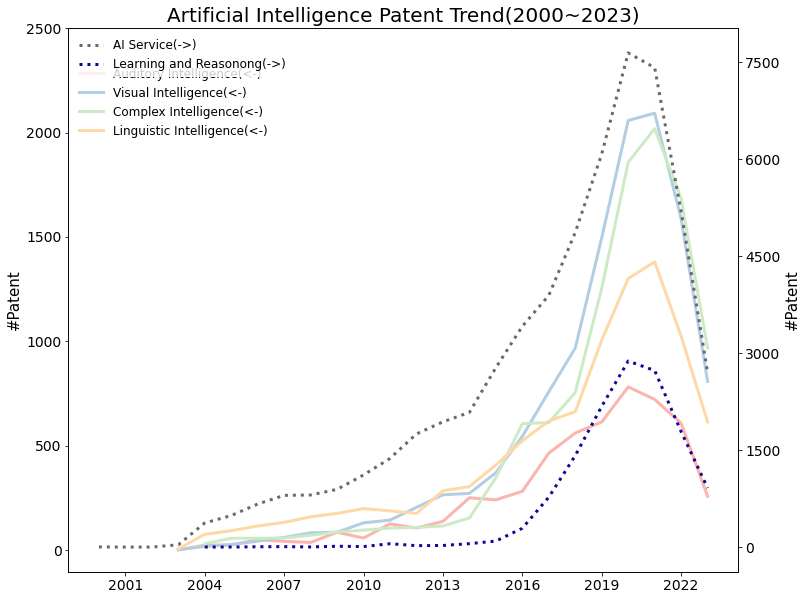

In [606]:
import matplotlib.pyplot as plt

num = 3
num2 = 3

line1 = "-"
line2 = ":"
fig = plt.figure()
fig.set_size_inches(12, 10)
ax1 = fig.add_subplot(111)
ax1.plot(count_table.index, count_table.audiotory, linestyle=line1, c = "#FBB4AE", linewidth=num, label = "Auditory Intelligence(<-)") # dotted
ax1.plot(count_table.index, count_table.visual, linestyle=line1, c = "#B3CDE3",linewidth=num, label = "Visual Intelligence(<-)") # dashdotted
ax1.plot(count_table.index, count_table.complex, linestyle=line1, c = "#CCEBC5",linewidth=num, label = "Complex Intelligence(<-)") # dotted
ax1.plot(count_table.index, count_table.linguistic, linestyle=line1, c = "#FED9A6",linewidth=num, label = "Linguistic Intelligence(<-)") # dashdotted
ax1.set_ylabel("#Patent", fontsize= 15)

"#B3CDE3"
"#CCEBC5"
"#FED9A6"
"#E5D8BD"
"#CCCCCC"

ax2 = ax1.twinx()
ax2.plot(count_table.index, count_table.ai_service,linestyle=line2, c = "#696969",linewidth=num2, label = "AI Service(->)") # 'dashed'
ax2.plot(count_table.index, count_table.reasoning, linestyle=line2, c = "#120496",linewidth=num2, label = "Learning and Reasonong(->)") # solid
ax2.set_ylabel("#Patent", fontsize= 15)

plt.title('Artificial Intelligence Patent Trend(2000~2023)', fontsize=20) 

x_label = []
for x in range(2001, 2024, 3):
    x_label.append(str(x))
    

plt.title('Artificial Intelligence Patent Trend(2000~2023)', fontsize=20) 
ax1.legend(fontsize=12, loc=[0.009,0.79], edgecolor = "white")
ax2.legend(fontsize=12, loc='best', edgecolor = "white")
ax1.set_xticks(x_label)
ax1.set_xticklabels(labels = x_label, fontsize= 14)

ax1.set_yticks([0, 500, 1000, 1500, 2000, 2500])
ax1.set_yticklabels(labels = [0, 500, 1000, 1500, 2000, 2500], fontsize= 14)

ax2.set_yticks(range(0, 8000, 1500))
ax2.set_yticklabels(labels = range(0, 8000, 1500), fontsize= 14)
plt.savefig("AI_patent_trend.pdf")


In [320]:
korea_ai_patent = pd.concat([learning_reasoning_data, 
                             audiotory_intell_data, visual_intell_data, 
                             linguistic_intell_data, complex_intell_data, ai_service_patent]).drop_duplicates(["applicationNumber"])

In [324]:
korea_ai_patent["applicationNumber"].values 1020180080466

array(['1020230118769', '1020220157462', '1020180043342', ...,
       '1020040018153', '1020070071866', '1020070139308'], dtype=object)

In [425]:
applicant_info_list = []

for app_num in korea_ai_patent["applicationNumber"].values:
    applicant_url= f"http://plus.kipris.or.kr/openapi/rest/patUtiModInfoSearchSevice/patentApplicantInfo?applicationNumber={app_num}&accessKey={key}"
    reponse = requests.get(applicant_url)
    content = reponse.content
    applicant_dict = xmltodict.parse(content)
    applicant_info_list.append(applicant_dict["response"]["body"]["items"]["patentApplicantInfo"])

KeyboardInterrupt: 

In [436]:
applicant_info_list[0]

ApplicantName ApplicantEnglishsentenceName ApplicantNumber ApplicantAddress  \
0       주식회사 삼표  SAM PYO INDUSTRIAL CO., LTD    119981000823     서울특별시 종로구...   
1     주식회사 삼표산업    SAMPYO INDUSTRY CO., LTD.    120130572274     서울특별시 종로구...   

  ApplicantCountryName  
0                 대한민국  
1                 대한민국

In [470]:
pd.concat(applicant_info_list2)

ApplicantName                       ApplicantEnglishsentenceName  \
0                      장영용                                   JANG, Young Yong   
0                주식회사 아이티유                                           ITU Inc.   
0                 주식회사 인피닉                                  INFINIQ Co., Ltd.   
0               (주)이코스 코리아                              E.COS KOREA Co., Ltd.   
0            페이스튼국제학원 주식회사                        Fayston Preparatory of Suji   
1              팩시디스, 다니엘 가                                PAXITZIS, Daniel Ka   
0                주식회사 뉴큐어엠                                     Newcure M Inc.   
0                      이혜민                                          LEEHYEMIN   
0                주식회사 아이티유                                           ITU Inc.   
0                  주식회사 엔서                                     N.CER Co., Ltd   
0  마이크로소프트 테크놀로지 라이센싱, 엘엘씨                Microsoft Technology Licensing, LLC   
0            주식회사 데이터사이언스랩                         Data Science Lab Co., Ltd.   
0            연세대학교 원주산학협력단  UNIVERSITY INDUSTRY FOUNDATION, YONSEI UNIVERS...   
0                      윤종식                                      Yoon jong sik   
0                 주식회사 미큐어                                        mecure,INC.   
0                  주식회사 엔서                                     N.CER Co., Ltd   
0             주식회사 헤카톤에이아이                                         HECATON AI   
0              주식회사 마티아솔루션                                  Matthias solusion   
1             에스케이텔레콤 주식회사                               SK TELECOM CO., LTD.   
0               이지디텍터 주식회사                               EZDetector Co., Ltd.   
0               주식회사 로이드케이                                   LLOYD K co., Ltd   
0                  주식회사 엔서                                     N.CER Co., Ltd   
0                농업협동조합중앙회       NATIONAL AGRICULTURAL COOPERATIVE FEDERATION   
0                  한국과학기술원  Korea Advanced Institute of Science and Techno...   
0            주식회사 에스티이노베이션                                       stinnovarion   
0                  쿠팡 주식회사                                      Coupang Corp.   
0          가부시키가이샤 시마쓰세사쿠쇼                               SHIMADZU CORPORATION   
0                코리아테크노(주)                             KOREA TECHNO CO., LTD.   
0                 주식회사 레듀텍                                   redutec Co.,Ltd.   
0                  (주) 임픽스                                  IMPIX CORPORATION   
0                 메이저위드(주)                                 Majorwith Co., Ltd   
1                      신문기                                       SHIN, MUN GI   
0                 (주)오투컴퍼니                                   O2 ICT Co., Ltd.   
0              주식회사 소프트자이온                                       Softzion Inc   
0                주식회사 오피지지                                     OP.GG Co., Ltd   
0                주식회사 오피지지                                     OP.GG Co., Ltd   
0               한전케이디엔주식회사                                KEPCO KDN Co., Ltd.   
0                 (주)시큐레이어                                Seculayer Co., Ltd.   

  ApplicantNumber                          ApplicantAddress  \
0    420170562531                              서울특별시 강남구...   
0    120210824185                              대전광역시 유성구...   
0    120080142918                              서울특별시 금천구...   
0    120230149173                              서울특별시 금천구...   
0    120210702802                            경기도 용인시 수지구...   
1    620230166816          경기도 용인시 수지구 동천로***번가길 **-* (동천동)   
0    120230244272                             서울특별시 서대문구...   
0    420060236011                             전북 전주시 완산구...   
0    120210824185                              대전광역시 유성구...   
0    120190747010                               광주광역시 북구...   
0    520140606680  미국 워싱턴주 (우편번호 : *****) 레드몬드 원 마이크로소프트 웨이   
0    120170167572                            경기도 성남시 수정구...   
0    120120107738                 

In [471]:
n = 1
applicant_info_list1 = []

for app_num in korea_ai_patent["applicationNumber"].values[0:10000]:
    applicant_url= f"http://plus.kipris.or.kr/openapi/rest/patUtiModInfoSearchSevice/patentApplicantInfo?applicationNumber={app_num}&accessKey={key}"
    reponse = requests.get(applicant_url)
    content = reponse.content
    applicant_dict = xmltodict.parse(content)
    if type(applicant_dict["response"]["body"]["items"]["patentApplicantInfo"]) == dict:
        applicant_dict["response"]["body"]["items"]["patentApplicantInfo"]["applicationNumber"] = app_num
        applicant_info_list1.append(pd.DataFrame(applicant_dict["response"]["body"]["items"]["patentApplicantInfo"], index = [0]))
    else:
        index=[i for i in range(0,len(applicant_dict["response"]["body"]["items"]["patentApplicantInfo"]))]
        applicant_df = pd.DataFrame(applicant_dict["response"]["body"]["items"]["patentApplicantInfo"], index = index)
        applicant_df["applicationNumber"] = app_num
        applicant_info_list1.append(applicant_df)
    print(n)
    n += 1

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


1861
1862
1863
1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060


3500
3501
3502
3503
3504
3505
3506
3507
3508
3509
3510
3511
3512
3513
3514
3515
3516
3517
3518
3519
3520
3521
3522
3523
3524
3525
3526
3527
3528
3529
3530
3531
3532
3533
3534
3535
3536
3537
3538
3539
3540
3541
3542
3543
3544
3545
3546
3547
3548
3549
3550
3551
3552
3553
3554
3555
3556
3557
3558
3559
3560
3561
3562
3563
3564
3565
3566
3567
3568
3569
3570
3571
3572
3573
3574
3575
3576
3577
3578
3579
3580
3581
3582
3583
3584
3585
3586
3587
3588
3589
3590
3591
3592
3593
3594
3595
3596
3597
3598
3599
3600
3601
3602
3603
3604
3605
3606
3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699


5141
5142
5143
5144
5145
5146
5147
5148
5149
5150
5151
5152
5153
5154
5155
5156
5157
5158
5159
5160
5161
5162
5163
5164
5165
5166
5167
5168
5169
5170
5171
5172
5173
5174
5175
5176
5177
5178
5179
5180
5181
5182
5183
5184
5185
5186
5187
5188
5189
5190
5191
5192
5193
5194
5195
5196
5197
5198
5199
5200
5201
5202
5203
5204
5205
5206
5207
5208
5209
5210
5211
5212
5213
5214
5215
5216
5217
5218
5219
5220
5221
5222
5223
5224
5225
5226
5227
5228
5229
5230
5231
5232
5233
5234
5235
5236
5237
5238
5239
5240
5241
5242
5243
5244
5245
5246
5247
5248
5249
5250
5251
5252
5253
5254
5255
5256
5257
5258
5259
5260
5261
5262
5263
5264
5265
5266
5267
5268
5269
5270
5271
5272
5273
5274
5275
5276
5277
5278
5279
5280
5281
5282
5283
5284
5285
5286
5287
5288
5289
5290
5291
5292
5293
5294
5295
5296
5297
5298
5299
5300
5301
5302
5303
5304
5305
5306
5307
5308
5309
5310
5311
5312
5313
5314
5315
5316
5317
5318
5319
5320
5321
5322
5323
5324
5325
5326
5327
5328
5329
5330
5331
5332
5333
5334
5335
5336
5337
5338
5339
5340


6782
6783
6784
6785
6786
6787
6788
6789
6790
6791
6792
6793
6794
6795
6796
6797
6798
6799
6800
6801
6802
6803
6804
6805
6806
6807
6808
6809
6810
6811
6812
6813
6814
6815
6816
6817
6818
6819
6820
6821
6822
6823
6824
6825
6826
6827
6828
6829
6830
6831
6832
6833
6834
6835
6836
6837
6838
6839
6840
6841
6842
6843
6844
6845
6846
6847
6848
6849
6850
6851
6852
6853
6854
6855
6856
6857
6858
6859
6860
6861
6862
6863
6864
6865
6866
6867
6868
6869
6870
6871
6872
6873
6874
6875
6876
6877
6878
6879
6880
6881
6882
6883
6884
6885
6886
6887
6888
6889
6890
6891
6892
6893
6894
6895
6896
6897
6898
6899
6900
6901
6902
6903
6904
6905
6906
6907
6908
6909
6910
6911
6912
6913
6914
6915
6916
6917
6918
6919
6920
6921
6922
6923
6924
6925
6926
6927
6928
6929
6930
6931
6932
6933
6934
6935
6936
6937
6938
6939
6940
6941
6942
6943
6944
6945
6946
6947
6948
6949
6950
6951
6952
6953
6954
6955
6956
6957
6958
6959
6960
6961
6962
6963
6964
6965
6966
6967
6968
6969
6970
6971
6972
6973
6974
6975
6976
6977
6978
6979
6980
6981


8421
8422
8423
8424
8425
8426
8427
8428
8429
8430
8431
8432
8433
8434
8435
8436
8437
8438
8439
8440
8441
8442
8443
8444
8445
8446
8447
8448
8449
8450
8451
8452
8453
8454
8455
8456
8457
8458
8459
8460
8461
8462
8463
8464
8465
8466
8467
8468
8469
8470
8471
8472
8473
8474
8475
8476
8477
8478
8479
8480
8481
8482
8483
8484
8485
8486
8487
8488
8489
8490
8491
8492
8493
8494
8495
8496
8497
8498
8499
8500
8501
8502
8503
8504
8505
8506
8507
8508
8509
8510
8511
8512
8513
8514
8515
8516
8517
8518
8519
8520
8521
8522
8523
8524
8525
8526
8527
8528
8529
8530
8531
8532
8533
8534
8535
8536
8537
8538
8539
8540
8541
8542
8543
8544
8545
8546
8547
8548
8549
8550
8551
8552
8553
8554
8555
8556
8557
8558
8559
8560
8561
8562
8563
8564
8565
8566
8567
8568
8569
8570
8571
8572
8573
8574
8575
8576
8577
8578
8579
8580
8581
8582
8583
8584
8585
8586
8587
8588
8589
8590
8591
8592
8593
8594
8595
8596
8597
8598
8599
8600
8601
8602
8603
8604
8605
8606
8607
8608
8609
8610
8611
8612
8613
8614
8615
8616
8617
8618
8619
8620


In [472]:
n = 1
applicant_info_list2 = []

for app_num in korea_ai_patent["applicationNumber"].values[10000:20000]:
    applicant_url= f"http://plus.kipris.or.kr/openapi/rest/patUtiModInfoSearchSevice/patentApplicantInfo?applicationNumber={app_num}&accessKey={key}"
    reponse = requests.get(applicant_url)
    content = reponse.content
    applicant_dict = xmltodict.parse(content)
    if type(applicant_dict["response"]["body"]["items"]["patentApplicantInfo"]) == dict:
        applicant_dict["response"]["body"]["items"]["patentApplicantInfo"]["applicationNumber"] = app_num
        applicant_info_list2.append(pd.DataFrame(applicant_dict["response"]["body"]["items"]["patentApplicantInfo"], index = [0]))
    else:
        index=[i for i in range(0,len(applicant_dict["response"]["body"]["items"]["patentApplicantInfo"]))]
        applicant_df = pd.DataFrame(applicant_dict["response"]["body"]["items"]["patentApplicantInfo"], index = index)
        applicant_df["applicationNumber"] = app_num
        applicant_info_list2.append(applicant_df)
    print(n)
    n += 1

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


1861
1862
1863
1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060


3501
3502
3503
3504
3505
3506
3507
3508
3509
3510
3511
3512
3513
3514
3515
3516
3517
3518
3519
3520
3521
3522
3523
3524
3525
3526
3527
3528
3529
3530
3531
3532
3533
3534
3535
3536
3537
3538
3539
3540
3541
3542
3543
3544
3545
3546
3547
3548
3549
3550
3551
3552
3553
3554
3555
3556
3557
3558
3559
3560
3561
3562
3563
3564
3565
3566
3567
3568
3569
3570
3571
3572
3573
3574
3575
3576
3577
3578
3579
3580
3581
3582
3583
3584
3585
3586
3587
3588
3589
3590
3591
3592
3593
3594
3595
3596
3597
3598
3599
3600
3601
3602
3603
3604
3605
3606
3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699
3700


5142
5143
5144
5145
5146
5147
5148
5149
5150
5151
5152
5153
5154
5155
5156
5157
5158
5159
5160
5161
5162
5163
5164
5165
5166
5167
5168
5169
5170
5171
5172
5173
5174
5175
5176
5177
5178
5179
5180
5181
5182
5183
5184
5185
5186
5187
5188
5189
5190
5191
5192
5193
5194
5195
5196
5197
5198
5199
5200
5201
5202
5203
5204
5205
5206
5207
5208
5209
5210
5211
5212
5213
5214
5215
5216
5217
5218
5219
5220
5221
5222
5223
5224
5225
5226
5227
5228
5229
5230
5231
5232
5233
5234
5235
5236
5237
5238
5239
5240
5241
5242
5243
5244
5245
5246
5247
5248
5249
5250
5251
5252
5253
5254
5255
5256
5257
5258
5259
5260
5261
5262
5263
5264
5265
5266
5267
5268
5269
5270
5271
5272
5273
5274
5275
5276
5277
5278
5279
5280
5281
5282
5283
5284
5285
5286
5287
5288
5289
5290
5291
5292
5293
5294
5295
5296
5297
5298
5299
5300
5301
5302
5303
5304
5305
5306
5307
5308
5309
5310
5311
5312
5313
5314
5315
5316
5317
5318
5319
5320
5321
5322
5323
5324
5325
5326
5327
5328
5329
5330
5331
5332
5333
5334
5335
5336
5337
5338
5339
5340
5341


6783
6784
6785
6786
6787
6788
6789
6790
6791
6792
6793
6794
6795
6796
6797
6798
6799
6800
6801
6802
6803
6804
6805
6806
6807
6808
6809
6810
6811
6812
6813
6814
6815
6816
6817
6818
6819
6820
6821
6822
6823
6824
6825
6826
6827
6828
6829
6830
6831
6832
6833
6834
6835
6836
6837
6838
6839
6840
6841
6842
6843
6844
6845
6846
6847
6848
6849
6850
6851
6852
6853
6854
6855
6856
6857
6858
6859
6860
6861
6862
6863
6864
6865
6866
6867
6868
6869
6870
6871
6872
6873
6874
6875
6876
6877
6878
6879
6880
6881
6882
6883
6884
6885
6886
6887
6888
6889
6890
6891
6892
6893
6894
6895
6896
6897
6898
6899
6900
6901
6902
6903
6904
6905
6906
6907
6908
6909
6910
6911
6912
6913
6914
6915
6916
6917
6918
6919
6920
6921
6922
6923
6924
6925
6926
6927
6928
6929
6930
6931
6932
6933
6934
6935
6936
6937
6938
6939
6940
6941
6942
6943
6944
6945
6946
6947
6948
6949
6950
6951
6952
6953
6954
6955
6956
6957
6958
6959
6960
6961
6962
6963
6964
6965
6966
6967
6968
6969
6970
6971
6972
6973
6974
6975
6976
6977
6978
6979
6980
6981
6982


8423
8424
8425
8426
8427
8428
8429
8430
8431
8432
8433
8434
8435
8436
8437
8438
8439
8440
8441
8442
8443
8444
8445
8446
8447
8448
8449
8450
8451
8452
8453
8454
8455
8456
8457
8458
8459
8460
8461
8462
8463
8464
8465
8466
8467
8468
8469
8470
8471
8472
8473
8474
8475
8476
8477
8478
8479
8480
8481
8482
8483
8484
8485
8486
8487
8488
8489
8490
8491
8492
8493
8494
8495
8496
8497
8498
8499
8500
8501
8502
8503
8504
8505
8506
8507
8508
8509
8510
8511
8512
8513
8514
8515
8516
8517
8518
8519
8520
8521
8522
8523
8524
8525
8526
8527
8528
8529
8530
8531
8532
8533
8534
8535
8536
8537
8538
8539
8540
8541
8542
8543
8544
8545
8546
8547
8548
8549
8550
8551
8552
8553
8554
8555
8556
8557
8558
8559
8560
8561
8562
8563
8564
8565
8566
8567
8568
8569
8570
8571
8572
8573
8574
8575
8576
8577
8578
8579
8580
8581
8582
8583
8584
8585
8586
8587
8588
8589
8590
8591
8592
8593
8594
8595
8596
8597
8598
8599
8600
8601
8602
8603
8604
8605
8606
8607
8608
8609
8610
8611
8612
8613
8614
8615
8616
8617
8618
8619
8620
8621
8622


In [473]:
n = 1
applicant_info_list3 = []

for app_num in korea_ai_patent["applicationNumber"].values[20000:30000]:
    applicant_url= f"http://plus.kipris.or.kr/openapi/rest/patUtiModInfoSearchSevice/patentApplicantInfo?applicationNumber={app_num}&accessKey={key}"
    reponse = requests.get(applicant_url)
    content = reponse.content
    applicant_dict = xmltodict.parse(content)
    if type(applicant_dict["response"]["body"]["items"]["patentApplicantInfo"]) == dict:
        applicant_dict["response"]["body"]["items"]["patentApplicantInfo"]["applicationNumber"] = app_num
        applicant_info_list3.append(pd.DataFrame(applicant_dict["response"]["body"]["items"]["patentApplicantInfo"], index = [0]))
    else:
        index=[i for i in range(0,len(applicant_dict["response"]["body"]["items"]["patentApplicantInfo"]))]
        applicant_df = pd.DataFrame(applicant_dict["response"]["body"]["items"]["patentApplicantInfo"], index = index)
        applicant_df["applicationNumber"] = app_num
        applicant_info_list3.append(applicant_df)
    print(n)
    n += 1

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


1861
1862
1863
1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060


3501
3502
3503
3504
3505
3506
3507
3508
3509
3510
3511
3512
3513
3514
3515
3516
3517
3518
3519
3520
3521
3522
3523
3524
3525
3526
3527
3528
3529
3530
3531
3532
3533
3534
3535
3536
3537
3538
3539
3540
3541
3542
3543
3544
3545
3546
3547
3548
3549
3550
3551
3552
3553
3554
3555
3556
3557
3558
3559
3560
3561
3562
3563
3564
3565
3566
3567
3568
3569
3570
3571
3572
3573
3574
3575
3576
3577
3578
3579
3580
3581
3582
3583
3584
3585
3586
3587
3588
3589
3590
3591
3592
3593
3594
3595
3596
3597
3598
3599
3600
3601
3602
3603
3604
3605
3606
3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699
3700


5140
5141
5142
5143
5144
5145
5146
5147
5148
5149
5150
5151
5152
5153
5154
5155
5156
5157
5158
5159
5160
5161
5162
5163
5164
5165
5166
5167
5168
5169
5170
5171
5172
5173
5174
5175
5176
5177
5178
5179
5180
5181
5182
5183
5184
5185
5186
5187
5188
5189
5190
5191
5192
5193
5194
5195
5196
5197
5198
5199
5200
5201
5202
5203
5204
5205
5206
5207
5208
5209
5210
5211
5212
5213
5214
5215
5216
5217
5218
5219
5220
5221
5222
5223
5224
5225
5226
5227
5228
5229
5230
5231
5232
5233
5234
5235
5236
5237
5238
5239
5240
5241
5242
5243
5244
5245
5246
5247
5248
5249
5250
5251
5252
5253
5254
5255
5256
5257
5258
5259
5260
5261
5262
5263
5264
5265
5266
5267
5268
5269
5270
5271
5272
5273
5274
5275
5276
5277
5278
5279
5280
5281
5282
5283
5284
5285
5286
5287
5288
5289
5290
5291
5292
5293
5294
5295
5296
5297
5298
5299
5300
5301
5302
5303
5304
5305
5306
5307
5308
5309
5310
5311
5312
5313
5314
5315
5316
5317
5318
5319
5320
5321
5322
5323
5324
5325
5326
5327
5328
5329
5330
5331
5332
5333
5334
5335
5336
5337
5338
5339


6780
6781
6782
6783
6784
6785
6786
6787
6788
6789
6790
6791
6792
6793
6794
6795
6796
6797
6798
6799
6800
6801
6802
6803
6804
6805
6806
6807
6808
6809
6810
6811
6812
6813
6814
6815
6816
6817
6818
6819
6820
6821
6822
6823
6824
6825
6826
6827
6828
6829
6830
6831
6832
6833
6834
6835
6836
6837
6838
6839
6840
6841
6842
6843
6844
6845
6846
6847
6848
6849
6850
6851
6852
6853
6854
6855
6856
6857
6858
6859
6860
6861
6862
6863
6864
6865
6866
6867
6868
6869
6870
6871
6872
6873
6874
6875
6876
6877
6878
6879
6880
6881
6882
6883
6884
6885
6886
6887
6888
6889
6890
6891
6892
6893
6894
6895
6896
6897
6898
6899
6900
6901
6902
6903
6904
6905
6906
6907
6908
6909
6910
6911
6912
6913
6914
6915
6916
6917
6918
6919
6920
6921
6922
6923
6924
6925
6926
6927
6928
6929
6930
6931
6932
6933
6934
6935
6936
6937
6938
6939
6940
6941
6942
6943
6944
6945
6946
6947
6948
6949
6950
6951
6952
6953
6954
6955
6956
6957
6958
6959
6960
6961
6962
6963
6964
6965
6966
6967
6968
6969
6970
6971
6972
6973
6974
6975
6976
6977
6978
6979


8419
8420
8421
8422
8423
8424
8425
8426
8427
8428
8429
8430
8431
8432
8433
8434
8435
8436
8437
8438
8439
8440
8441
8442
8443
8444
8445
8446
8447
8448
8449
8450
8451
8452
8453
8454
8455
8456
8457
8458
8459
8460
8461
8462
8463
8464
8465
8466
8467
8468
8469
8470
8471
8472
8473
8474
8475
8476
8477
8478
8479
8480
8481
8482
8483
8484
8485
8486
8487
8488
8489
8490
8491
8492
8493
8494
8495
8496
8497
8498
8499
8500
8501
8502
8503
8504
8505
8506
8507
8508
8509
8510
8511
8512
8513
8514
8515
8516
8517
8518
8519
8520
8521
8522
8523
8524
8525
8526
8527
8528
8529
8530
8531
8532
8533
8534
8535
8536
8537
8538
8539
8540
8541
8542
8543
8544
8545
8546
8547
8548
8549
8550
8551
8552
8553
8554
8555
8556
8557
8558
8559
8560
8561
8562
8563
8564
8565
8566
8567
8568
8569
8570
8571
8572
8573
8574
8575
8576
8577
8578
8579
8580
8581
8582
8583
8584
8585
8586
8587
8588
8589
8590
8591
8592
8593
8594
8595
8596
8597
8598
8599
8600
8601
8602
8603
8604
8605
8606
8607
8608
8609
8610
8611
8612
8613
8614
8615
8616
8617
8618


In [474]:
n = 1
applicant_info_list4 = []

for app_num in korea_ai_patent["applicationNumber"].values[30000:40000]:
    applicant_url= f"http://plus.kipris.or.kr/openapi/rest/patUtiModInfoSearchSevice/patentApplicantInfo?applicationNumber={app_num}&accessKey={key}"
    reponse = requests.get(applicant_url)
    content = reponse.content
    applicant_dict = xmltodict.parse(content)
    if type(applicant_dict["response"]["body"]["items"]["patentApplicantInfo"]) == dict:
        applicant_dict["response"]["body"]["items"]["patentApplicantInfo"]["applicationNumber"] = app_num
        applicant_info_list4.append(pd.DataFrame(applicant_dict["response"]["body"]["items"]["patentApplicantInfo"], index = [0]))
    else:
        index=[i for i in range(0,len(applicant_dict["response"]["body"]["items"]["patentApplicantInfo"]))]
        applicant_df = pd.DataFrame(applicant_dict["response"]["body"]["items"]["patentApplicantInfo"], index = index)
        applicant_df["applicationNumber"] = app_num
        applicant_info_list4.append(applicant_df)
    print(n)
    n += 1

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


1862
1863
1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061


3501
3502
3503
3504
3505
3506
3507
3508
3509
3510
3511
3512
3513
3514
3515
3516
3517
3518
3519
3520
3521
3522
3523
3524
3525
3526
3527
3528
3529
3530
3531
3532
3533
3534
3535
3536
3537
3538
3539
3540
3541
3542
3543
3544
3545
3546
3547
3548
3549
3550
3551
3552
3553
3554
3555
3556
3557
3558
3559
3560
3561
3562
3563
3564
3565
3566
3567
3568
3569
3570
3571
3572
3573
3574
3575
3576
3577
3578
3579
3580
3581
3582
3583
3584
3585
3586
3587
3588
3589
3590
3591
3592
3593
3594
3595
3596
3597
3598
3599
3600
3601
3602
3603
3604
3605
3606
3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699
3700


5140
5141
5142
5143
5144
5145
5146
5147
5148
5149
5150
5151
5152
5153
5154
5155
5156
5157
5158
5159
5160
5161
5162
5163
5164
5165
5166
5167
5168
5169
5170
5171
5172
5173
5174
5175
5176
5177
5178
5179
5180
5181
5182
5183
5184
5185
5186
5187
5188
5189
5190
5191
5192
5193
5194
5195
5196
5197
5198
5199
5200
5201
5202
5203
5204
5205
5206
5207
5208
5209
5210
5211
5212
5213
5214
5215
5216
5217
5218
5219
5220
5221
5222
5223
5224
5225
5226
5227
5228
5229
5230
5231
5232
5233
5234
5235
5236
5237
5238
5239
5240
5241
5242
5243
5244
5245
5246
5247
5248
5249
5250
5251
5252
5253
5254
5255
5256
5257
5258
5259
5260
5261
5262
5263
5264
5265
5266
5267
5268
5269
5270
5271
5272
5273
5274
5275
5276
5277
5278
5279
5280
5281
5282
5283
5284
5285
5286
5287
5288
5289
5290
5291
5292
5293
5294
5295
5296
5297
5298
5299
5300
5301
5302
5303
5304
5305
5306
5307
5308
5309
5310
5311
5312
5313
5314
5315
5316
5317
5318
5319
5320
5321
5322
5323
5324
5325
5326
5327
5328
5329
5330
5331
5332
5333
5334
5335
5336
5337
5338
5339


6780
6781
6782
6783
6784
6785
6786
6787
6788
6789
6790
6791
6792
6793
6794
6795
6796
6797
6798
6799
6800
6801
6802
6803
6804
6805
6806
6807
6808
6809
6810
6811
6812
6813
6814
6815
6816
6817
6818
6819
6820
6821
6822
6823
6824
6825
6826
6827
6828
6829
6830
6831
6832
6833
6834
6835
6836
6837
6838
6839
6840
6841
6842
6843
6844
6845
6846
6847
6848
6849
6850
6851
6852
6853
6854
6855
6856
6857
6858
6859
6860
6861
6862
6863
6864
6865
6866
6867
6868
6869
6870
6871
6872
6873
6874
6875
6876
6877
6878
6879
6880
6881
6882
6883
6884
6885
6886
6887
6888
6889
6890
6891
6892
6893
6894
6895
6896
6897
6898
6899
6900
6901
6902
6903
6904
6905
6906
6907
6908
6909
6910
6911
6912
6913
6914
6915
6916
6917
6918
6919
6920
6921
6922
6923
6924
6925
6926
6927
6928
6929
6930
6931
6932
6933
6934
6935
6936
6937
6938
6939
6940
6941
6942
6943
6944
6945
6946
6947
6948
6949
6950
6951
6952
6953
6954
6955
6956
6957
6958
6959
6960
6961
6962
6963
6964
6965
6966
6967
6968
6969
6970
6971
6972
6973
6974
6975
6976
6977
6978
6979


8419
8420
8421
8422
8423
8424
8425
8426
8427
8428
8429
8430
8431
8432
8433
8434
8435
8436
8437
8438
8439
8440
8441
8442
8443
8444
8445
8446
8447
8448
8449
8450
8451
8452
8453
8454
8455
8456
8457
8458
8459
8460
8461
8462
8463
8464
8465
8466
8467
8468
8469
8470
8471
8472
8473
8474
8475
8476
8477
8478
8479
8480
8481
8482
8483
8484
8485
8486
8487
8488
8489
8490
8491
8492
8493
8494
8495
8496
8497
8498
8499
8500
8501
8502
8503
8504
8505
8506
8507
8508
8509
8510
8511
8512
8513
8514
8515
8516
8517
8518
8519
8520
8521
8522
8523
8524
8525
8526
8527
8528
8529
8530
8531
8532
8533
8534
8535
8536
8537
8538
8539
8540
8541
8542
8543
8544
8545
8546
8547
8548
8549
8550
8551
8552
8553
8554
8555
8556
8557
8558
8559
8560
8561
8562
8563
8564
8565
8566
8567
8568
8569
8570
8571
8572
8573
8574
8575
8576
8577
8578
8579
8580
8581
8582
8583
8584
8585
8586
8587
8588
8589
8590
8591
8592
8593
8594
8595
8596
8597
8598
8599
8600
8601
8602
8603
8604
8605
8606
8607
8608
8609
8610
8611
8612
8613
8614
8615
8616
8617
8618


In [475]:
n = 1
applicant_info_list5 = []

for app_num in korea_ai_patent["applicationNumber"].values[40000:50000]:
    applicant_url= f"http://plus.kipris.or.kr/openapi/rest/patUtiModInfoSearchSevice/patentApplicantInfo?applicationNumber={app_num}&accessKey={key}"
    reponse = requests.get(applicant_url)
    content = reponse.content
    applicant_dict = xmltodict.parse(content)
    if type(applicant_dict["response"]["body"]["items"]["patentApplicantInfo"]) == dict:
        applicant_dict["response"]["body"]["items"]["patentApplicantInfo"]["applicationNumber"] = app_num
        applicant_info_list5.append(pd.DataFrame(applicant_dict["response"]["body"]["items"]["patentApplicantInfo"], index = [0]))
    else:
        index=[i for i in range(0,len(applicant_dict["response"]["body"]["items"]["patentApplicantInfo"]))]
        applicant_df = pd.DataFrame(applicant_dict["response"]["body"]["items"]["patentApplicantInfo"], index = index)
        applicant_df["applicationNumber"] = app_num
        applicant_info_list5.append(applicant_df)
    print(n)
    n += 1

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


1862
1863
1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061


3501
3502
3503
3504
3505
3506
3507
3508
3509
3510
3511
3512
3513
3514
3515
3516
3517
3518
3519
3520
3521
3522
3523
3524
3525
3526
3527
3528
3529
3530
3531
3532
3533
3534
3535
3536
3537
3538
3539
3540
3541
3542
3543
3544
3545
3546
3547
3548
3549
3550
3551
3552
3553
3554
3555
3556
3557
3558
3559
3560
3561
3562
3563
3564
3565
3566
3567
3568
3569
3570
3571
3572
3573
3574
3575
3576
3577
3578
3579
3580
3581
3582
3583
3584
3585
3586
3587
3588
3589
3590
3591
3592
3593
3594
3595
3596
3597
3598
3599
3600
3601
3602
3603
3604
3605
3606
3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699
3700


5141
5142
5143
5144
5145
5146
5147
5148
5149
5150
5151
5152
5153
5154
5155
5156
5157
5158
5159
5160
5161
5162
5163
5164
5165
5166
5167
5168
5169
5170
5171
5172
5173
5174
5175
5176
5177
5178
5179
5180
5181
5182
5183
5184
5185
5186
5187
5188
5189
5190
5191
5192
5193
5194
5195
5196
5197
5198
5199
5200
5201
5202
5203
5204
5205
5206
5207
5208
5209
5210
5211
5212
5213
5214
5215
5216
5217
5218
5219
5220
5221
5222
5223
5224
5225
5226
5227
5228
5229
5230
5231
5232
5233
5234
5235
5236
5237
5238
5239
5240
5241
5242
5243
5244
5245
5246
5247
5248
5249
5250
5251
5252
5253
5254
5255
5256
5257
5258
5259
5260
5261
5262
5263
5264
5265
5266
5267
5268
5269
5270
5271
5272
5273
5274
5275
5276
5277
5278
5279
5280
5281
5282
5283
5284
5285
5286
5287
5288
5289
5290
5291
5292
5293
5294
5295
5296
5297
5298
5299
5300
5301
5302
5303
5304
5305
5306
5307
5308
5309
5310
5311
5312
5313
5314
5315
5316
5317
5318
5319
5320
5321
5322
5323
5324
5325
5326
5327
5328
5329
5330
5331
5332
5333
5334
5335
5336
5337
5338
5339
5340


6782
6783
6784
6785
6786
6787
6788
6789
6790
6791
6792
6793
6794
6795
6796
6797
6798
6799
6800
6801
6802
6803
6804
6805
6806
6807
6808
6809
6810
6811
6812
6813
6814
6815
6816
6817
6818
6819
6820
6821
6822
6823
6824
6825
6826
6827
6828
6829
6830
6831
6832
6833
6834
6835
6836
6837
6838
6839
6840
6841
6842
6843
6844
6845
6846
6847
6848
6849
6850
6851
6852
6853
6854
6855
6856
6857
6858
6859
6860
6861
6862
6863
6864
6865
6866
6867
6868
6869
6870
6871
6872
6873
6874
6875
6876
6877
6878
6879
6880
6881
6882
6883
6884
6885
6886
6887
6888
6889
6890
6891
6892
6893
6894
6895
6896
6897
6898
6899
6900
6901
6902
6903
6904
6905
6906
6907
6908
6909
6910
6911
6912
6913
6914
6915
6916
6917
6918
6919
6920
6921
6922
6923
6924
6925
6926
6927
6928
6929
6930
6931
6932
6933
6934
6935
6936
6937
6938
6939
6940
6941
6942
6943
6944
6945
6946
6947
6948
6949
6950
6951
6952
6953
6954
6955
6956
6957
6958
6959
6960
6961
6962
6963
6964
6965
6966
6967
6968
6969
6970
6971
6972
6973
6974
6975
6976
6977
6978
6979
6980
6981


8424
8425
8426
8427
8428
8429
8430
8431
8432
8433
8434
8435
8436
8437
8438
8439
8440
8441
8442
8443
8444
8445
8446
8447
8448
8449
8450
8451
8452
8453
8454
8455
8456
8457
8458
8459
8460
8461
8462
8463
8464
8465
8466
8467
8468
8469
8470
8471
8472
8473
8474
8475
8476
8477
8478
8479
8480
8481
8482
8483
8484
8485
8486
8487
8488
8489
8490
8491
8492
8493
8494
8495
8496
8497
8498
8499
8500
8501
8502
8503
8504
8505
8506
8507
8508
8509
8510
8511
8512
8513
8514
8515
8516
8517
8518
8519
8520
8521
8522
8523
8524
8525
8526
8527
8528
8529
8530
8531
8532
8533
8534
8535
8536
8537
8538
8539
8540
8541
8542
8543
8544
8545
8546
8547
8548
8549
8550
8551
8552
8553
8554
8555
8556
8557
8558
8559
8560
8561
8562
8563
8564
8565
8566
8567
8568
8569
8570
8571
8572
8573
8574
8575
8576
8577
8578
8579
8580
8581
8582
8583
8584
8585
8586
8587
8588
8589
8590
8591
8592
8593
8594
8595
8596
8597
8598
8599
8600
8601
8602
8603
8604
8605
8606
8607
8608
8609
8610
8611
8612
8613
8614
8615
8616
8617
8618
8619
8620
8621
8622
8623


In [476]:
n = 1
applicant_info_list6 = []

for app_num in korea_ai_patent["applicationNumber"].values[50000:60000]:
    applicant_url= f"http://plus.kipris.or.kr/openapi/rest/patUtiModInfoSearchSevice/patentApplicantInfo?applicationNumber={app_num}&accessKey={key}"
    reponse = requests.get(applicant_url)
    content = reponse.content
    applicant_dict = xmltodict.parse(content)
    if type(applicant_dict["response"]["body"]["items"]["patentApplicantInfo"]) == dict:
        applicant_dict["response"]["body"]["items"]["patentApplicantInfo"]["applicationNumber"] = app_num
        applicant_info_list6.append(pd.DataFrame(applicant_dict["response"]["body"]["items"]["patentApplicantInfo"], index = [0]))
    else:
        index=[i for i in range(0,len(applicant_dict["response"]["body"]["items"]["patentApplicantInfo"]))]
        applicant_df = pd.DataFrame(applicant_dict["response"]["body"]["items"]["patentApplicantInfo"], index = index)
        applicant_df["applicationNumber"] = app_num
        applicant_info_list6.append(applicant_df)
    print(n)
    n += 1

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


1862
1863
1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061


3501
3502
3503
3504
3505
3506
3507
3508
3509
3510
3511
3512
3513
3514
3515
3516
3517
3518
3519
3520
3521
3522
3523
3524
3525
3526
3527
3528
3529
3530
3531
3532
3533
3534
3535
3536
3537
3538
3539
3540
3541
3542
3543
3544
3545
3546
3547
3548
3549
3550
3551
3552
3553
3554
3555
3556
3557
3558
3559
3560
3561
3562
3563
3564
3565
3566
3567
3568
3569
3570
3571
3572
3573
3574
3575
3576
3577
3578
3579
3580
3581
3582
3583
3584
3585
3586
3587
3588
3589
3590
3591
3592
3593
3594
3595
3596
3597
3598
3599
3600
3601
3602
3603
3604
3605
3606
3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699
3700


5140
5141
5142
5143
5144
5145
5146
5147
5148
5149
5150
5151
5152
5153
5154
5155
5156
5157
5158
5159
5160
5161
5162
5163
5164
5165
5166
5167
5168
5169
5170
5171
5172
5173
5174
5175
5176
5177
5178
5179
5180
5181
5182
5183
5184
5185
5186
5187
5188
5189
5190
5191
5192
5193
5194
5195
5196
5197
5198
5199
5200
5201
5202
5203
5204
5205
5206
5207
5208
5209
5210
5211
5212
5213
5214
5215
5216
5217
5218
5219
5220
5221
5222
5223
5224
5225
5226
5227
5228
5229
5230
5231
5232
5233
5234
5235
5236
5237
5238
5239
5240
5241
5242
5243
5244
5245
5246
5247
5248
5249
5250
5251
5252
5253
5254
5255
5256
5257
5258
5259
5260
5261
5262
5263
5264
5265
5266
5267
5268
5269
5270
5271
5272
5273
5274
5275
5276
5277
5278
5279
5280
5281
5282
5283
5284
5285
5286
5287
5288
5289
5290
5291
5292
5293
5294
5295
5296
5297
5298
5299
5300
5301
5302
5303
5304
5305
5306
5307
5308
5309
5310
5311
5312
5313
5314
5315
5316
5317
5318
5319
5320
5321
5322
5323
5324
5325
5326
5327
5328
5329
5330
5331
5332
5333
5334
5335
5336
5337
5338
5339


6780
6781
6782
6783
6784
6785
6786
6787
6788
6789
6790
6791
6792
6793
6794
6795
6796
6797
6798
6799
6800
6801
6802
6803
6804
6805
6806
6807
6808
6809
6810
6811
6812
6813
6814
6815
6816
6817
6818
6819
6820
6821
6822
6823
6824
6825
6826
6827
6828
6829
6830
6831
6832
6833
6834
6835
6836
6837
6838
6839
6840
6841
6842
6843
6844
6845
6846
6847
6848
6849
6850
6851
6852
6853
6854
6855
6856
6857
6858
6859
6860
6861
6862
6863
6864
6865
6866
6867
6868
6869
6870
6871
6872
6873
6874
6875
6876
6877
6878
6879
6880
6881
6882
6883
6884
6885
6886
6887
6888
6889
6890
6891
6892
6893
6894
6895
6896
6897
6898
6899
6900
6901
6902
6903
6904
6905
6906
6907
6908
6909
6910
6911
6912
6913
6914
6915
6916
6917
6918
6919
6920
6921
6922
6923
6924
6925
6926
6927
6928
6929
6930
6931
6932
6933
6934
6935
6936
6937
6938
6939
6940
6941
6942
6943
6944
6945
6946
6947
6948
6949
6950
6951
6952
6953
6954
6955
6956
6957
6958
6959
6960
6961
6962
6963
6964
6965
6966
6967
6968
6969
6970
6971
6972
6973
6974
6975
6976
6977
6978
6979


8419
8420
8421
8422
8423
8424
8425
8426
8427
8428
8429
8430
8431
8432
8433
8434
8435
8436
8437
8438
8439
8440
8441
8442
8443
8444
8445
8446
8447
8448
8449
8450
8451
8452
8453
8454
8455
8456
8457
8458
8459
8460
8461
8462
8463
8464
8465
8466
8467
8468
8469
8470
8471
8472
8473
8474
8475
8476
8477
8478
8479
8480
8481
8482
8483
8484
8485
8486
8487
8488
8489
8490
8491
8492
8493
8494
8495
8496
8497
8498
8499
8500
8501
8502
8503
8504
8505
8506
8507
8508
8509
8510
8511
8512
8513
8514
8515
8516
8517
8518
8519
8520
8521
8522
8523
8524
8525
8526
8527
8528
8529
8530
8531
8532
8533
8534
8535
8536
8537
8538
8539
8540
8541
8542
8543
8544
8545
8546
8547
8548
8549
8550
8551
8552
8553
8554
8555
8556
8557
8558
8559
8560
8561
8562
8563
8564
8565
8566
8567
8568
8569
8570
8571
8572
8573
8574
8575
8576
8577
8578
8579
8580
8581
8582
8583
8584
8585
8586
8587
8588
8589
8590
8591
8592
8593
8594
8595
8596
8597
8598
8599
8600
8601
8602
8603
8604
8605
8606
8607
8608
8609
8610
8611
8612
8613
8614
8615
8616
8617
8618


In [478]:
n = 1
applicant_info_list7 = []

for app_num in korea_ai_patent["applicationNumber"].values[60000:]:
    applicant_url= f"http://plus.kipris.or.kr/openapi/rest/patUtiModInfoSearchSevice/patentApplicantInfo?applicationNumber={app_num}&accessKey={key}"
    reponse = requests.get(applicant_url)
    content = reponse.content
    applicant_dict = xmltodict.parse(content)
    if type(applicant_dict["response"]["body"]["items"]["patentApplicantInfo"]) == dict:
        applicant_dict["response"]["body"]["items"]["patentApplicantInfo"]["applicationNumber"] = app_num
        applicant_info_list7.append(pd.DataFrame(applicant_dict["response"]["body"]["items"]["patentApplicantInfo"], index = [0]))
    else:
        index=[i for i in range(0,len(applicant_dict["response"]["body"]["items"]["patentApplicantInfo"]))]
        applicant_df = pd.DataFrame(applicant_dict["response"]["body"]["items"]["patentApplicantInfo"], index = index)
        applicant_df["applicationNumber"] = app_num
        applicant_info_list7.append(applicant_df)
    print(n)
    n += 1

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063


3504
3505
3506
3507
3508
3509
3510
3511
3512
3513
3514
3515
3516
3517
3518
3519
3520
3521
3522
3523
3524
3525
3526
3527
3528
3529
3530
3531
3532
3533
3534
3535
3536
3537
3538
3539
3540
3541
3542
3543
3544
3545
3546
3547
3548
3549
3550
3551
3552
3553
3554
3555
3556
3557
3558
3559
3560
3561
3562
3563
3564
3565
3566
3567
3568
3569
3570
3571
3572
3573
3574
3575
3576
3577
3578
3579
3580
3581
3582
3583
3584
3585
3586
3587
3588
3589
3590
3591
3592
3593
3594
3595
3596
3597
3598
3599
3600
3601
3602
3603
3604
3605
3606
3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699
3700
3701
3702
3703


5146
5147
5148
5149
5150
5151
5152
5153
5154
5155
5156
5157
5158
5159
5160
5161
5162
5163
5164
5165
5166
5167
5168
5169
5170
5171
5172
5173
5174
5175
5176
5177
5178
5179
5180
5181
5182
5183
5184
5185
5186
5187
5188
5189
5190
5191
5192
5193
5194
5195
5196
5197
5198
5199
5200
5201
5202
5203
5204
5205
5206
5207
5208
5209
5210
5211
5212
5213
5214
5215
5216
5217
5218
5219
5220
5221
5222
5223
5224
5225
5226
5227
5228
5229
5230
5231
5232
5233
5234
5235
5236
5237
5238
5239
5240
5241
5242
5243
5244
5245
5246
5247
5248
5249
5250
5251
5252
5253
5254
5255
5256
5257
5258
5259
5260
5261
5262
5263
5264
5265
5266
5267
5268
5269
5270
5271
5272
5273
5274
5275
5276
5277
5278
5279
5280
5281
5282
5283
5284
5285
5286
5287
5288
5289
5290
5291
5292
5293
5294
5295
5296
5297
5298
5299
5300
5301
5302
5303
5304
5305
5306
5307
5308
5309
5310
5311
5312
5313
5314
5315
5316
5317
5318
5319
5320
5321
5322
5323
5324
5325
5326
5327
5328
5329
5330
5331
5332
5333
5334
5335
5336
5337
5338
5339
5340
5341
5342
5343
5344
5345


6785
6786
6787
6788
6789
6790
6791
6792
6793
6794
6795
6796
6797
6798
6799
6800
6801
6802
6803
6804
6805
6806
6807
6808
6809
6810
6811
6812
6813
6814
6815
6816
6817
6818
6819
6820
6821
6822
6823
6824
6825
6826
6827
6828
6829
6830
6831
6832
6833
6834
6835
6836
6837
6838
6839
6840
6841
6842
6843
6844
6845
6846
6847
6848
6849
6850
6851
6852
6853
6854
6855
6856
6857
6858
6859
6860
6861
6862
6863
6864
6865
6866
6867
6868
6869
6870
6871
6872
6873
6874
6875
6876
6877
6878
6879
6880
6881
6882
6883
6884
6885
6886
6887
6888
6889
6890
6891
6892
6893
6894
6895
6896
6897
6898
6899
6900
6901
6902
6903
6904
6905
6906
6907
6908
6909
6910
6911
6912
6913
6914
6915
6916
6917
6918
6919
6920
6921
6922
6923
6924
6925
6926
6927
6928
6929
6930
6931
6932
6933
6934
6935
6936
6937
6938
6939
6940
6941
6942
6943
6944
6945
6946
6947
6948
6949
6950
6951
6952
6953
6954
6955
6956
6957
6958
6959
6960
6961
6962
6963
6964
6965
6966
6967
6968
6969
6970
6971
6972
6973
6974
6975
6976
6977
6978
6979
6980
6981
6982
6983
6984


8425
8426
8427
8428
8429
8430
8431
8432
8433
8434
8435
8436
8437
8438
8439
8440
8441
8442
8443
8444
8445
8446
8447
8448
8449
8450
8451
8452
8453
8454
8455
8456
8457
8458
8459
8460
8461
8462
8463
8464
8465
8466
8467
8468
8469
8470
8471
8472
8473
8474
8475
8476
8477
8478
8479
8480
8481
8482
8483
8484
8485
8486
8487
8488
8489
8490
8491
8492
8493
8494
8495
8496
8497
8498
8499
8500
8501
8502
8503
8504
8505
8506
8507
8508
8509
8510
8511
8512
8513
8514
8515
8516
8517
8518
8519
8520
8521
8522
8523
8524
8525
8526
8527
8528
8529
8530
8531
8532
8533
8534
8535
8536
8537
8538
8539
8540
8541
8542
8543
8544
8545
8546
8547
8548
8549
8550
8551
8552
8553
8554
8555
8556
8557
8558
8559
8560
8561
8562
8563
8564
8565
8566
8567
8568
8569
8570
8571
8572
8573
8574
8575
8576
8577
8578
8579
8580
8581
8582
8583
8584
8585
8586
8587
8588
8589
8590
8591
8592
8593
8594
8595
8596
8597
8598
8599
8600
8601
8602
8603
8604
8605
8606
8607
8608
8609
8610
8611
8612
8613
8614
8615
8616
8617
8618
8619
8620
8621
8622
8623
8624


10055
10056
10057
10058
10059
10060
10061
10062
10063
10064
10065
10066
10067
10068
10069
10070
10071
10072
10073
10074
10075
10076
10077
10078
10079
10080
10081
10082
10083
10084
10085
10086
10087
10088
10089
10090
10091
10092
10093
10094
10095
10096
10097
10098
10099
10100
10101
10102
10103
10104
10105
10106
10107
10108
10109
10110
10111
10112
10113
10114
10115
10116
10117
10118
10119
10120
10121
10122
10123
10124
10125
10126
10127
10128
10129
10130
10131
10132
10133
10134
10135
10136
10137
10138
10139
10140
10141
10142
10143
10144
10145
10146
10147
10148
10149
10150
10151
10152
10153
10154
10155
10156
10157
10158
10159
10160
10161
10162
10163
10164
10165
10166
10167
10168
10169
10170
10171
10172
10173
10174
10175
10176
10177
10178
10179
10180
10181
10182
10183
10184
10185
10186
10187
10188
10189
10190
10191
10192
10193
10194
10195
10196
10197
10198
10199
10200
10201
10202
10203
10204
10205
10206
10207
10208
10209
10210
10211
10212
10213
10214
10215
10216
10217
10218
10219
10220
1022

11424
11425
11426
11427
11428
11429
11430
11431
11432
11433
11434
11435
11436
11437
11438
11439
11440
11441
11442
11443
11444
11445
11446
11447
11448
11449
11450
11451
11452
11453
11454
11455
11456
11457
11458
11459
11460
11461
11462
11463
11464
11465
11466
11467
11468
11469
11470
11471
11472
11473
11474
11475
11476
11477
11478
11479
11480
11481
11482
11483
11484
11485
11486
11487
11488
11489
11490
11491
11492
11493
11494
11495
11496
11497
11498
11499
11500
11501
11502
11503
11504
11505
11506
11507
11508
11509
11510
11511
11512
11513
11514
11515
11516
11517
11518
11519
11520
11521
11522
11523
11524
11525
11526
11527
11528
11529
11530
11531
11532
11533
11534
11535
11536
11537
11538
11539
11540
11541
11542
11543
11544
11545
11546
11547
11548
11549
11550
11551
11552
11553
11554
11555
11556
11557
11558
11559
11560
11561
11562
11563
11564
11565
11566
11567
11568
11569
11570
11571
11572
11573
11574
11575
11576
11577
11578
11579
11580
11581
11582
11583
11584
11585
11586
11587
11588
11589
1159

12790
12791
12792
12793
12794
12795
12796
12797
12798
12799
12800
12801
12802
12803
12804
12805
12806
12807
12808
12809
12810
12811
12812
12813
12814
12815
12816
12817
12818
12819
12820
12821
12822
12823
12824
12825
12826
12827
12828
12829
12830
12831
12832
12833
12834
12835
12836
12837
12838
12839
12840
12841
12842
12843
12844
12845
12846
12847
12848
12849
12850
12851
12852
12853
12854
12855
12856
12857
12858
12859
12860
12861
12862
12863
12864
12865
12866
12867
12868
12869
12870
12871
12872
12873
12874
12875
12876
12877
12878
12879
12880
12881
12882
12883
12884
12885
12886
12887
12888
12889
12890
12891
12892
12893
12894
12895
12896
12897
12898
12899
12900
12901
12902
12903
12904
12905
12906
12907
12908
12909
12910
12911
12912
12913
12914
12915
12916
12917
12918
12919
12920
12921
12922
12923
12924
12925
12926
12927
12928
12929
12930
12931
12932
12933
12934
12935
12936
12937
12938
12939
12940
12941
12942
12943
12944
12945
12946
12947
12948
12949
12950
12951
12952
12953
12954
12955
1295

14156
14157
14158
14159
14160
14161
14162
14163
14164
14165
14166
14167
14168
14169
14170
14171
14172
14173
14174
14175
14176
14177
14178
14179
14180
14181
14182
14183
14184
14185
14186
14187
14188
14189
14190
14191
14192
14193
14194
14195
14196
14197
14198
14199
14200
14201
14202
14203
14204
14205
14206
14207
14208
14209
14210
14211
14212
14213
14214
14215
14216
14217
14218
14219
14220
14221
14222
14223
14224
14225
14226
14227
14228
14229
14230
14231
14232
14233
14234
14235
14236
14237
14238
14239
14240
14241
14242
14243
14244
14245
14246
14247
14248
14249
14250
14251
14252
14253
14254
14255
14256
14257
14258
14259
14260
14261
14262
14263
14264
14265
14266
14267
14268
14269
14270
14271
14272
14273
14274
14275
14276
14277
14278
14279
14280
14281
14282
14283
14284
14285
14286
14287
14288
14289
14290
14291
14292
14293
14294
14295
14296
14297
14298
14299
14300
14301
14302
14303
14304
14305
14306
14307
14308
14309
14310
14311
14312
14313
14314
14315
14316
14317
14318
14319
14320
14321
1432

15522
15523
15524
15525
15526
15527
15528
15529
15530
15531
15532
15533
15534
15535
15536
15537
15538
15539
15540
15541
15542
15543
15544
15545
15546
15547
15548
15549
15550
15551
15552
15553
15554
15555
15556
15557
15558
15559
15560
15561
15562
15563
15564
15565
15566
15567
15568
15569
15570
15571
15572
15573
15574
15575
15576
15577
15578
15579
15580
15581
15582
15583
15584
15585
15586
15587
15588
15589
15590
15591
15592
15593
15594
15595
15596
15597
15598
15599
15600
15601
15602
15603
15604
15605
15606
15607
15608
15609
15610
15611
15612
15613
15614
15615
15616
15617
15618
15619
15620
15621
15622
15623
15624
15625
15626
15627
15628
15629
15630
15631
15632
15633
15634
15635
15636
15637
15638
15639
15640
15641
15642
15643
15644
15645
15646
15647
15648
15649
15650
15651
15652
15653
15654
15655
15656
15657
15658
15659
15660
15661
15662
15663
15664
15665
15666
15667
15668
15669
15670
15671
15672
15673
15674
15675
15676
15677
15678
15679
15680
15681
15682
15683
15684
15685
15686
15687
1568

In [479]:
len(applicant_info_list1)

10000

In [483]:
applicant_info1 = pd.concat(applicant_info_list1)
applicant_info2 = pd.concat(applicant_info_list2)
applicant_info3 = pd.concat(applicant_info_list3)
applicant_info4 = pd.concat(applicant_info_list4)
applicant_info5 = pd.concat(applicant_info_list5)
applicant_info6 = pd.concat(applicant_info_list6)
applicant_info7 = pd.concat(applicant_info_list7)

In [486]:
applicant_info = pd.concat([applicant_info1, applicant_info2, applicant_info3, applicant_info4,applicant_info5, applicant_info6,applicant_info7])

In [489]:
applicant_info = applicant_info.merge(korea_ai_patent[["applicationNumber", "applicationDate"]], how = 'left', on= "applicationNumber")

In [490]:
applicant_info["year"] = applicant_info["applicationDate"].map(lambda x : x[0:4])

In [496]:
applicant_info["year"] = applicant_info["year"].astype(int)

In [519]:
year_period = []
for i in range(len(applicant_info["year"])):
    if (applicant_info["year"].iloc[i] >= 2018 and applicant_info["year"].iloc[i] <= 2023):
        year_period.append("3")
    elif (applicant_info["year"].iloc[i] >= 2012 and applicant_info["year"].iloc[i] <= 2017):
        year_period.append("2")
    elif (applicant_info["year"].iloc[i] >= 2006 and applicant_info["year"].iloc[i] <= 2011):
        year_period.append("1")
    else:
        year_period.append("0")

In [520]:
len(applicant_info["year"])
len(year_period)

85051

In [1092]:
len(learning_reasoning_data.drop_duplicates("applicationNumber"))

13292

In [1093]:
len(audiotory_intell_data.drop_duplicates("applicationNumber"))

5486

In [1094]:
len(complex_intell_data.drop_duplicates("applicationNumber"))

11074

In [1095]:
len(linguistic_intell_data.drop_duplicates("applicationNumber"))

9474

In [1096]:
len(visual_intell_data.drop_duplicates("applicationNumber"))

12052

In [1107]:
len(ai_service_patent.drop_duplicates("applicationNumber"))

56411

In [1101]:
ai_service_data= pd.read_csv("ai_service_data.csv")

In [1108]:
len(korea_ai_patent)

76406

In [614]:
applicant_info

ApplicantName  \
0                   (주)바이브컴퍼니   
1                   주식회사 아무랩스   
2                 인하대학교 산학협력단   
3      캠브리콘 테크놀로지스 코퍼레이션 리미티드   
4                 연세대학교 산학협력단   
...                       ...   
85046              대한민국(관세청장)   
85047              대한민국(관세청장)   
85048              대한민국(조달청장)   
85049               한국전자통신연구원   
85050              대한민국(관세청장)   

                            ApplicantEnglishsentenceName ApplicantNumber  \
0                                      VAIV company Inc.    120000469291   
1                                      amoolabs Co.,Ltd.    120220062896   
2       Inha University Research and Business Foundation    220040085404   
3             CAMBRICON TECHNOLOGIES CORPORATION LIMITED    520160718771   
4      UIF (University Industry Foundation), Yonsei U...    220050095099   
...                                                  ...             ...   
85046                              KOREA CUSTOMS SERVICE    220020260127   
85047                              KOREA CUSTOMS SERVICE    220020260127   
85048                         Public Procurment Serviced    219981005271   
85049  Electronics and Telecommunications Research In...    319980077638   
85050                              KOREA CUSTOMS SERVICE    220020260127   

                                        ApplicantAddress ApplicantCountryName  \
0                                           서울특별시 용산구...                 대한민국   
1                                           서울특별시 강북구...                 대한민국   
2                                          인천광역시 미추홀구...                 대한민국   
3      중국 베이징 ******, 하이뎬 디스트릭트, 지춘 로드, 넘버 *, 즈쩐 빌딩, ...                   중국   
4                                          서울특별시 서대문구...                 대한민국   
...                                                  ...                  ...   
85046                                        대전광역시 서구...                 대한민국   
85047                                        대전광역시 서구...                 대한민국   
85048                                        대전광역시 서구...                 대한민국   
85049                                       대전광역시 유성구...                 대한민국   
85050                                        대전광역시 서구...                 대한민국   

      applicationNumber applicationDate  year year_period  
0         1020230118769        20230907  2023           3  
1         1020220157462        20221122  2022           3  
2         1020180043342        20180413  2018           3  
3         1020197037891        20190719  2019           3  
4         1020180068801        20180615  2018           3  
...                 ...             ...   ...         ...  
85046     1020060079557        20060822  2006           1  
85047     1020060047968        20060529  2006           1  
85048     1020040018153        20040317  2004           0  
85049     1020070071866        20070718  2007           1  
85050     1020070139308        20071227  2007           1  

[85051 rows x 9 columns]

In [521]:
applicant_info["year_period"] = year_period

In [530]:
for (k1, k2), group in applicant_info.groupby(["year_period", "ApplicantCountryName"]):
    print((k1, k2))
    display(group.count())

('0', '네덜란드')


ApplicantName                   2
ApplicantEnglishsentenceName    2
ApplicantNumber                 2
ApplicantAddress                2
ApplicantCountryName            2
applicationNumber               2
applicationDate                 2
year                            2
year_period                     2
dtype: int64

('0', '대한민국')


ApplicantName                   1153
ApplicantEnglishsentenceName    1151
ApplicantNumber                 1153
ApplicantAddress                1153
ApplicantCountryName            1153
applicationNumber               1153
applicationDate                 1153
year                            1153
year_period                     1153
dtype: int64

('0', '독일')


ApplicantName                   7
ApplicantEnglishsentenceName    7
ApplicantNumber                 7
ApplicantAddress                7
ApplicantCountryName            7
applicationNumber               7
applicationDate                 7
year                            7
year_period                     7
dtype: int64

('0', '러시아')


ApplicantName                   2
ApplicantEnglishsentenceName    2
ApplicantNumber                 2
ApplicantAddress                2
ApplicantCountryName            2
applicationNumber               2
applicationDate                 2
year                            2
year_period                     2
dtype: int64

('0', '미국')


ApplicantName                   96
ApplicantEnglishsentenceName    96
ApplicantNumber                 96
ApplicantAddress                96
ApplicantCountryName            96
applicationNumber               96
applicationDate                 96
year                            96
year_period                     96
dtype: int64

('0', '아랍에미리트')


ApplicantName                   1
ApplicantEnglishsentenceName    1
ApplicantNumber                 1
ApplicantAddress                1
ApplicantCountryName            1
applicationNumber               1
applicationDate                 1
year                            1
year_period                     1
dtype: int64

('0', '영국')


ApplicantName                   1
ApplicantEnglishsentenceName    1
ApplicantNumber                 1
ApplicantAddress                1
ApplicantCountryName            1
applicationNumber               1
applicationDate                 1
year                            1
year_period                     1
dtype: int64

('0', '오스트레일리아')


ApplicantName                   3
ApplicantEnglishsentenceName    3
ApplicantNumber                 3
ApplicantAddress                3
ApplicantCountryName            3
applicationNumber               3
applicationDate                 3
year                            3
year_period                     3
dtype: int64

('0', '일본')


ApplicantName                   39
ApplicantEnglishsentenceName    39
ApplicantNumber                 39
ApplicantAddress                39
ApplicantCountryName            39
applicationNumber               39
applicationDate                 39
year                            39
year_period                     39
dtype: int64

('0', '중국')


ApplicantName                   2
ApplicantEnglishsentenceName    2
ApplicantNumber                 2
ApplicantAddress                2
ApplicantCountryName            2
applicationNumber               2
applicationDate                 2
year                            2
year_period                     2
dtype: int64

('0', '캐나다')


ApplicantName                   5
ApplicantEnglishsentenceName    5
ApplicantNumber                 5
ApplicantAddress                5
ApplicantCountryName            5
applicationNumber               5
applicationDate                 5
year                            5
year_period                     5
dtype: int64

('0', '프랑스')


ApplicantName                   5
ApplicantEnglishsentenceName    4
ApplicantNumber                 5
ApplicantAddress                5
ApplicantCountryName            5
applicationNumber               5
applicationDate                 5
year                            5
year_period                     5
dtype: int64

('0', '핀란드')


ApplicantName                   3
ApplicantEnglishsentenceName    3
ApplicantNumber                 3
ApplicantAddress                3
ApplicantCountryName            3
applicationNumber               3
applicationDate                 3
year                            3
year_period                     3
dtype: int64

('1', '그리스')


ApplicantName                   2
ApplicantEnglishsentenceName    2
ApplicantNumber                 2
ApplicantAddress                2
ApplicantCountryName            2
applicationNumber               2
applicationDate                 2
year                            2
year_period                     2
dtype: int64

('1', '네덜란드')


ApplicantName                   16
ApplicantEnglishsentenceName    16
ApplicantNumber                 16
ApplicantAddress                16
ApplicantCountryName            16
applicationNumber               16
applicationDate                 16
year                            16
year_period                     16
dtype: int64

('1', '대한민국')


ApplicantName                   6962
ApplicantEnglishsentenceName    6956
ApplicantNumber                 6962
ApplicantAddress                6962
ApplicantCountryName            6962
applicationNumber               6962
applicationDate                 6962
year                            6962
year_period                     6962
dtype: int64

('1', '덴마크')


ApplicantName                   1
ApplicantEnglishsentenceName    1
ApplicantNumber                 1
ApplicantAddress                1
ApplicantCountryName            1
applicationNumber               1
applicationDate                 1
year                            1
year_period                     1
dtype: int64

('1', '독일')


ApplicantName                   37
ApplicantEnglishsentenceName    37
ApplicantNumber                 37
ApplicantAddress                37
ApplicantCountryName            37
applicationNumber               37
applicationDate                 37
year                            37
year_period                     37
dtype: int64

('1', '미국')


ApplicantName                   622
ApplicantEnglishsentenceName    622
ApplicantNumber                 622
ApplicantAddress                622
ApplicantCountryName            622
applicationNumber               622
applicationDate                 622
year                            622
year_period                     622
dtype: int64

('1', '버뮤다')


ApplicantName                   1
ApplicantEnglishsentenceName    1
ApplicantNumber                 1
ApplicantAddress                1
ApplicantCountryName            1
applicationNumber               1
applicationDate                 1
year                            1
year_period                     1
dtype: int64

('1', '벨기에')


ApplicantName                   3
ApplicantEnglishsentenceName    3
ApplicantNumber                 3
ApplicantAddress                3
ApplicantCountryName            3
applicationNumber               3
applicationDate                 3
year                            3
year_period                     3
dtype: int64

('1', '스웨덴')


ApplicantName                   33
ApplicantEnglishsentenceName    33
ApplicantNumber                 33
ApplicantAddress                33
ApplicantCountryName            33
applicationNumber               33
applicationDate                 33
year                            33
year_period                     33
dtype: int64

('1', '스위스')


ApplicantName                   9
ApplicantEnglishsentenceName    9
ApplicantNumber                 9
ApplicantAddress                9
ApplicantCountryName            9
applicationNumber               9
applicationDate                 9
year                            9
year_period                     9
dtype: int64

('1', '싱가포르')


ApplicantName                   4
ApplicantEnglishsentenceName    4
ApplicantNumber                 4
ApplicantAddress                4
ApplicantCountryName            4
applicationNumber               4
applicationDate                 4
year                            4
year_period                     4
dtype: int64

('1', '아일랜드')


ApplicantName                   12
ApplicantEnglishsentenceName    12
ApplicantNumber                 12
ApplicantAddress                12
ApplicantCountryName            12
applicationNumber               12
applicationDate                 12
year                            12
year_period                     12
dtype: int64

('1', '영국')


ApplicantName                   9
ApplicantEnglishsentenceName    9
ApplicantNumber                 9
ApplicantAddress                9
ApplicantCountryName            9
applicationNumber               9
applicationDate                 9
year                            9
year_period                     9
dtype: int64

('1', '오스트레일리아')


ApplicantName                   6
ApplicantEnglishsentenceName    6
ApplicantNumber                 6
ApplicantAddress                6
ApplicantCountryName            6
applicationNumber               6
applicationDate                 6
year                            6
year_period                     6
dtype: int64

('1', '이스라엘')


ApplicantName                   1
ApplicantEnglishsentenceName    1
ApplicantNumber                 1
ApplicantAddress                1
ApplicantCountryName            1
applicationNumber               1
applicationDate                 1
year                            1
year_period                     1
dtype: int64

('1', '이탈리아')


ApplicantName                   5
ApplicantEnglishsentenceName    5
ApplicantNumber                 5
ApplicantAddress                5
ApplicantCountryName            5
applicationNumber               5
applicationDate                 5
year                            5
year_period                     5
dtype: int64

('1', '일본')


ApplicantName                   171
ApplicantEnglishsentenceName    171
ApplicantNumber                 171
ApplicantAddress                171
ApplicantCountryName            171
applicationNumber               171
applicationDate                 171
year                            171
year_period                     171
dtype: int64

('1', '중국')


ApplicantName                   24
ApplicantEnglishsentenceName    24
ApplicantNumber                 24
ApplicantAddress                24
ApplicantCountryName            24
applicationNumber               24
applicationDate                 24
year                            24
year_period                     24
dtype: int64

('1', '캐나다')


ApplicantName                   14
ApplicantEnglishsentenceName    14
ApplicantNumber                 14
ApplicantAddress                14
ApplicantCountryName            14
applicationNumber               14
applicationDate                 14
year                            14
year_period                     14
dtype: int64

('1', '프랑스')


ApplicantName                   25
ApplicantEnglishsentenceName    25
ApplicantNumber                 25
ApplicantAddress                25
ApplicantCountryName            25
applicationNumber               25
applicationDate                 25
year                            25
year_period                     25
dtype: int64

('1', '핀란드')


ApplicantName                   8
ApplicantEnglishsentenceName    8
ApplicantNumber                 8
ApplicantAddress                8
ApplicantCountryName            8
applicationNumber               8
applicationDate                 8
year                            8
year_period                     8
dtype: int64

('2', '그리스')


ApplicantName                   1
ApplicantEnglishsentenceName    1
ApplicantNumber                 1
ApplicantAddress                1
ApplicantCountryName            1
applicationNumber               1
applicationDate                 1
year                            1
year_period                     1
dtype: int64

('2', '네덜란드')


ApplicantName                   55
ApplicantEnglishsentenceName    55
ApplicantNumber                 55
ApplicantAddress                55
ApplicantCountryName            55
applicationNumber               55
applicationDate                 55
year                            55
year_period                     55
dtype: int64

('2', '노르웨이')


ApplicantName                   4
ApplicantEnglishsentenceName    4
ApplicantNumber                 4
ApplicantAddress                4
ApplicantCountryName            4
applicationNumber               4
applicationDate                 4
year                            4
year_period                     4
dtype: int64

('2', '뉴질랜드')


ApplicantName                   1
ApplicantEnglishsentenceName    1
ApplicantNumber                 1
ApplicantAddress                1
ApplicantCountryName            1
applicationNumber               1
applicationDate                 1
year                            1
year_period                     1
dtype: int64

('2', '대만')


ApplicantName                   19
ApplicantEnglishsentenceName    19
ApplicantNumber                 19
ApplicantAddress                19
ApplicantCountryName            19
applicationNumber               19
applicationDate                 19
year                            19
year_period                     19
dtype: int64

('2', '대한민국')


ApplicantName                   19896
ApplicantEnglishsentenceName    19850
ApplicantNumber                 19896
ApplicantAddress                19896
ApplicantCountryName            19896
applicationNumber               19896
applicationDate                 19896
year                            19896
year_period                     19896
dtype: int64

('2', '덴마크')


ApplicantName                   2
ApplicantEnglishsentenceName    2
ApplicantNumber                 2
ApplicantAddress                2
ApplicantCountryName            2
applicationNumber               2
applicationDate                 2
year                            2
year_period                     2
dtype: int64

('2', '독일')


ApplicantName                   122
ApplicantEnglishsentenceName    122
ApplicantNumber                 122
ApplicantAddress                122
ApplicantCountryName            122
applicationNumber               122
applicationDate                 122
year                            122
year_period                     122
dtype: int64

('2', '러시아')


ApplicantName                   4
ApplicantEnglishsentenceName    4
ApplicantNumber                 4
ApplicantAddress                4
ApplicantCountryName            4
applicationNumber               4
applicationDate                 4
year                            4
year_period                     4
dtype: int64

('2', '멕시코')


ApplicantName                   1
ApplicantEnglishsentenceName    1
ApplicantNumber                 1
ApplicantAddress                1
ApplicantCountryName            1
applicationNumber               1
applicationDate                 1
year                            1
year_period                     1
dtype: int64

('2', '모리셔스')


ApplicantName                   1
ApplicantEnglishsentenceName    1
ApplicantNumber                 1
ApplicantAddress                1
ApplicantCountryName            1
applicationNumber               1
applicationDate                 1
year                            1
year_period                     1
dtype: int64

('2', '몰타')


ApplicantName                   2
ApplicantEnglishsentenceName    2
ApplicantNumber                 2
ApplicantAddress                2
ApplicantCountryName            2
applicationNumber               2
applicationDate                 2
year                            2
year_period                     2
dtype: int64

('2', '미국')


ApplicantName                   1798
ApplicantEnglishsentenceName    1797
ApplicantNumber                 1798
ApplicantAddress                1798
ApplicantCountryName            1798
applicationNumber               1798
applicationDate                 1798
year                            1798
year_period                     1798
dtype: int64

('2', '바베이도스')


ApplicantName                   1
ApplicantEnglishsentenceName    1
ApplicantNumber                 1
ApplicantAddress                1
ApplicantCountryName            1
applicationNumber               1
applicationDate                 1
year                            1
year_period                     1
dtype: int64

('2', '벨기에')


ApplicantName                   6
ApplicantEnglishsentenceName    6
ApplicantNumber                 6
ApplicantAddress                6
ApplicantCountryName            6
applicationNumber               6
applicationDate                 6
year                            6
year_period                     6
dtype: int64

('2', '사이프러스')


ApplicantName                   3
ApplicantEnglishsentenceName    3
ApplicantNumber                 3
ApplicantAddress                3
ApplicantCountryName            3
applicationNumber               3
applicationDate                 3
year                            3
year_period                     3
dtype: int64

('2', '스웨덴')


ApplicantName                   64
ApplicantEnglishsentenceName    64
ApplicantNumber                 64
ApplicantAddress                64
ApplicantCountryName            64
applicationNumber               64
applicationDate                 64
year                            64
year_period                     64
dtype: int64

('2', '스위스')


ApplicantName                   53
ApplicantEnglishsentenceName    53
ApplicantNumber                 53
ApplicantAddress                53
ApplicantCountryName            53
applicationNumber               53
applicationDate                 53
year                            53
year_period                     53
dtype: int64

('2', '스페인')


ApplicantName                   8
ApplicantEnglishsentenceName    8
ApplicantNumber                 8
ApplicantAddress                8
ApplicantCountryName            8
applicationNumber               8
applicationDate                 8
year                            8
year_period                     8
dtype: int64

('2', '싱가포르')


ApplicantName                   8
ApplicantEnglishsentenceName    8
ApplicantNumber                 8
ApplicantAddress                8
ApplicantCountryName            8
applicationNumber               8
applicationDate                 8
year                            8
year_period                     8
dtype: int64

('2', '아일랜드')


ApplicantName                   9
ApplicantEnglishsentenceName    9
ApplicantNumber                 9
ApplicantAddress                9
ApplicantCountryName            9
applicationNumber               9
applicationDate                 9
year                            9
year_period                     9
dtype: int64

('2', '안티구와바부다')


ApplicantName                   8
ApplicantEnglishsentenceName    8
ApplicantNumber                 8
ApplicantAddress                8
ApplicantCountryName            8
applicationNumber               8
applicationDate                 8
year                            8
year_period                     8
dtype: int64

('2', '영국')


ApplicantName                   85
ApplicantEnglishsentenceName    85
ApplicantNumber                 85
ApplicantAddress                85
ApplicantCountryName            85
applicationNumber               85
applicationDate                 85
year                            85
year_period                     85
dtype: int64

('2', '오스트레일리아')


ApplicantName                   20
ApplicantEnglishsentenceName    20
ApplicantNumber                 20
ApplicantAddress                20
ApplicantCountryName            20
applicationNumber               20
applicationDate                 20
year                            20
year_period                     20
dtype: int64

('2', '오스트리아')


ApplicantName                   4
ApplicantEnglishsentenceName    4
ApplicantNumber                 4
ApplicantAddress                4
ApplicantCountryName            4
applicationNumber               4
applicationDate                 4
year                            4
year_period                     4
dtype: int64

('2', '이스라엘')


ApplicantName                   27
ApplicantEnglishsentenceName    27
ApplicantNumber                 27
ApplicantAddress                27
ApplicantCountryName            27
applicationNumber               27
applicationDate                 27
year                            27
year_period                     27
dtype: int64

('2', '이탈리아')


ApplicantName                   7
ApplicantEnglishsentenceName    7
ApplicantNumber                 7
ApplicantAddress                7
ApplicantCountryName            7
applicationNumber               7
applicationDate                 7
year                            7
year_period                     7
dtype: int64

('2', '인도')


ApplicantName                   5
ApplicantEnglishsentenceName    5
ApplicantNumber                 5
ApplicantAddress                5
ApplicantCountryName            5
applicationNumber               5
applicationDate                 5
year                            5
year_period                     5
dtype: int64

('2', '일본')


ApplicantName                   466
ApplicantEnglishsentenceName    466
ApplicantNumber                 466
ApplicantAddress                466
ApplicantCountryName            466
applicationNumber               466
applicationDate                 466
year                            466
year_period                     466
dtype: int64

('2', '중국')


ApplicantName                   334
ApplicantEnglishsentenceName    334
ApplicantNumber                 334
ApplicantAddress                334
ApplicantCountryName            334
applicationNumber               334
applicationDate                 334
year                            334
year_period                     334
dtype: int64

('2', '체코')


ApplicantName                   1
ApplicantEnglishsentenceName    1
ApplicantNumber                 1
ApplicantAddress                1
ApplicantCountryName            1
applicationNumber               1
applicationDate                 1
year                            1
year_period                     1
dtype: int64

('2', '캐나다')


ApplicantName                   31
ApplicantEnglishsentenceName    31
ApplicantNumber                 31
ApplicantAddress                31
ApplicantCountryName            31
applicationNumber               31
applicationDate                 31
year                            31
year_period                     31
dtype: int64

('2', '케이만군도')


ApplicantName                   75
ApplicantEnglishsentenceName    75
ApplicantNumber                 75
ApplicantAddress                75
ApplicantCountryName            75
applicationNumber               75
applicationDate                 75
year                            75
year_period                     75
dtype: int64

('2', '크로아티아')


ApplicantName                   1
ApplicantEnglishsentenceName    1
ApplicantNumber                 1
ApplicantAddress                1
ApplicantCountryName            1
applicationNumber               1
applicationDate                 1
year                            1
year_period                     1
dtype: int64

('2', '포르투칼')


ApplicantName                   1
ApplicantEnglishsentenceName    1
ApplicantNumber                 1
ApplicantAddress                1
ApplicantCountryName            1
applicationNumber               1
applicationDate                 1
year                            1
year_period                     1
dtype: int64

('2', '프랑스')


ApplicantName                   58
ApplicantEnglishsentenceName    58
ApplicantNumber                 58
ApplicantAddress                58
ApplicantCountryName            58
applicationNumber               58
applicationDate                 58
year                            58
year_period                     58
dtype: int64

('2', '핀란드')


ApplicantName                   10
ApplicantEnglishsentenceName    10
ApplicantNumber                 10
ApplicantAddress                10
ApplicantCountryName            10
applicationNumber               10
applicationDate                 10
year                            10
year_period                     10
dtype: int64

('2', '헝가리')


ApplicantName                   1
ApplicantEnglishsentenceName    1
ApplicantNumber                 1
ApplicantAddress                1
ApplicantCountryName            1
applicationNumber               1
applicationDate                 1
year                            1
year_period                     1
dtype: int64

('3', '네덜란드')


ApplicantName                   35
ApplicantEnglishsentenceName    35
ApplicantNumber                 35
ApplicantAddress                35
ApplicantCountryName            35
applicationNumber               35
applicationDate                 35
year                            35
year_period                     35
dtype: int64

('3', '노르웨이')


ApplicantName                   1
ApplicantEnglishsentenceName    1
ApplicantNumber                 1
ApplicantAddress                1
ApplicantCountryName            1
applicationNumber               1
applicationDate                 1
year                            1
year_period                     1
dtype: int64

('3', '뉴질랜드')


ApplicantName                   2
ApplicantEnglishsentenceName    2
ApplicantNumber                 2
ApplicantAddress                2
ApplicantCountryName            2
applicationNumber               2
applicationDate                 2
year                            2
year_period                     2
dtype: int64

('3', '대만')


ApplicantName                   24
ApplicantEnglishsentenceName    24
ApplicantNumber                 24
ApplicantAddress                24
ApplicantCountryName            24
applicationNumber               24
applicationDate                 24
year                            24
year_period                     24
dtype: int64

('3', '대한민국')


ApplicantName                   50170
ApplicantEnglishsentenceName    50103
ApplicantNumber                 50170
ApplicantAddress                50170
ApplicantCountryName            50170
applicationNumber               50170
applicationDate                 50170
year                            50170
year_period                     50170
dtype: int64

('3', '덴마크')


ApplicantName                   3
ApplicantEnglishsentenceName    3
ApplicantNumber                 3
ApplicantAddress                3
ApplicantCountryName            3
applicationNumber               3
applicationDate                 3
year                            3
year_period                     3
dtype: int64

('3', '독일')


ApplicantName                   84
ApplicantEnglishsentenceName    84
ApplicantNumber                 84
ApplicantAddress                84
ApplicantCountryName            84
applicationNumber               84
applicationDate                 84
year                            84
year_period                     84
dtype: int64

('3', '러시아')


ApplicantName                   3
ApplicantEnglishsentenceName    3
ApplicantNumber                 3
ApplicantAddress                3
ApplicantCountryName            3
applicationNumber               3
applicationDate                 3
year                            3
year_period                     3
dtype: int64

('3', '룩셈부르크')


ApplicantName                   3
ApplicantEnglishsentenceName    3
ApplicantNumber                 3
ApplicantAddress                3
ApplicantCountryName            3
applicationNumber               3
applicationDate                 3
year                            3
year_period                     3
dtype: int64

('3', '몽고')


ApplicantName                   1
ApplicantEnglishsentenceName    1
ApplicantNumber                 1
ApplicantAddress                1
ApplicantCountryName            1
applicationNumber               1
applicationDate                 1
year                            1
year_period                     1
dtype: int64

('3', '미국')


ApplicantName                   945
ApplicantEnglishsentenceName    945
ApplicantNumber                 945
ApplicantAddress                945
ApplicantCountryName            945
applicationNumber               945
applicationDate                 945
year                            945
year_period                     945
dtype: int64

('3', '미얀마')


ApplicantName                   1
ApplicantEnglishsentenceName    1
ApplicantNumber                 1
ApplicantAddress                1
ApplicantCountryName            1
applicationNumber               1
applicationDate                 1
year                            1
year_period                     1
dtype: int64

('3', '베트남')


ApplicantName                   1
ApplicantEnglishsentenceName    1
ApplicantNumber                 1
ApplicantAddress                1
ApplicantCountryName            1
applicationNumber               1
applicationDate                 1
year                            1
year_period                     1
dtype: int64

('3', '벨기에')


ApplicantName                   1
ApplicantEnglishsentenceName    1
ApplicantNumber                 1
ApplicantAddress                1
ApplicantCountryName            1
applicationNumber               1
applicationDate                 1
year                            1
year_period                     1
dtype: int64

('3', '브라질')


ApplicantName                   1
ApplicantEnglishsentenceName    1
ApplicantNumber                 1
ApplicantAddress                1
ApplicantCountryName            1
applicationNumber               1
applicationDate                 1
year                            1
year_period                     1
dtype: int64

('3', '사우디아라비아')


ApplicantName                   3
ApplicantEnglishsentenceName    3
ApplicantNumber                 3
ApplicantAddress                3
ApplicantCountryName            3
applicationNumber               3
applicationDate                 3
year                            3
year_period                     3
dtype: int64

('3', '사이프러스')


ApplicantName                   5
ApplicantEnglishsentenceName    5
ApplicantNumber                 5
ApplicantAddress                5
ApplicantCountryName            5
applicationNumber               5
applicationDate                 5
year                            5
year_period                     5
dtype: int64

('3', '스웨덴')


ApplicantName                   21
ApplicantEnglishsentenceName    21
ApplicantNumber                 21
ApplicantAddress                21
ApplicantCountryName            21
applicationNumber               21
applicationDate                 21
year                            21
year_period                     21
dtype: int64

('3', '스위스')


ApplicantName                   11
ApplicantEnglishsentenceName    11
ApplicantNumber                 11
ApplicantAddress                11
ApplicantCountryName            11
applicationNumber               11
applicationDate                 11
year                            11
year_period                     11
dtype: int64

('3', '스페인')


ApplicantName                   3
ApplicantEnglishsentenceName    3
ApplicantNumber                 3
ApplicantAddress                3
ApplicantCountryName            3
applicationNumber               3
applicationDate                 3
year                            3
year_period                     3
dtype: int64

('3', '싱가포르')


ApplicantName                   21
ApplicantEnglishsentenceName    21
ApplicantNumber                 21
ApplicantAddress                21
ApplicantCountryName            21
applicationNumber               21
applicationDate                 21
year                            21
year_period                     21
dtype: int64

('3', '아일랜드')


ApplicantName                   4
ApplicantEnglishsentenceName    4
ApplicantNumber                 4
ApplicantAddress                4
ApplicantCountryName            4
applicationNumber               4
applicationDate                 4
year                            4
year_period                     4
dtype: int64

('3', '안티구와바부다')


ApplicantName                   6
ApplicantEnglishsentenceName    6
ApplicantNumber                 6
ApplicantAddress                6
ApplicantCountryName            6
applicationNumber               6
applicationDate                 6
year                            6
year_period                     6
dtype: int64

('3', '에스토니아')


ApplicantName                   1
ApplicantEnglishsentenceName    1
ApplicantNumber                 1
ApplicantAddress                1
ApplicantCountryName            1
applicationNumber               1
applicationDate                 1
year                            1
year_period                     1
dtype: int64

('3', '영국')


ApplicantName                   41
ApplicantEnglishsentenceName    41
ApplicantNumber                 41
ApplicantAddress                41
ApplicantCountryName            41
applicationNumber               41
applicationDate                 41
year                            41
year_period                     41
dtype: int64

('3', '오스트레일리아')


ApplicantName                   12
ApplicantEnglishsentenceName    12
ApplicantNumber                 12
ApplicantAddress                12
ApplicantCountryName            12
applicationNumber               12
applicationDate                 12
year                            12
year_period                     12
dtype: int64

('3', '오스트리아')


ApplicantName                   2
ApplicantEnglishsentenceName    2
ApplicantNumber                 2
ApplicantAddress                2
ApplicantCountryName            2
applicationNumber               2
applicationDate                 2
year                            2
year_period                     2
dtype: int64

('3', '우즈베키스탄')


ApplicantName                   7
ApplicantEnglishsentenceName    7
ApplicantNumber                 7
ApplicantAddress                7
ApplicantCountryName            7
applicationNumber               7
applicationDate                 7
year                            7
year_period                     7
dtype: int64

('3', '이스라엘')


ApplicantName                   22
ApplicantEnglishsentenceName    22
ApplicantNumber                 22
ApplicantAddress                22
ApplicantCountryName            22
applicationNumber               22
applicationDate                 22
year                            22
year_period                     22
dtype: int64

('3', '이탈리아')


ApplicantName                   2
ApplicantEnglishsentenceName    2
ApplicantNumber                 2
ApplicantAddress                2
ApplicantCountryName            2
applicationNumber               2
applicationDate                 2
year                            2
year_period                     2
dtype: int64

('3', '인도')


ApplicantName                   12
ApplicantEnglishsentenceName    12
ApplicantNumber                 12
ApplicantAddress                12
ApplicantCountryName            12
applicationNumber               12
applicationDate                 12
year                            12
year_period                     12
dtype: int64

('3', '인도네시아')


ApplicantName                   1
ApplicantEnglishsentenceName    1
ApplicantNumber                 1
ApplicantAddress                1
ApplicantCountryName            1
applicationNumber               1
applicationDate                 1
year                            1
year_period                     1
dtype: int64

('3', '일본')


ApplicantName                   432
ApplicantEnglishsentenceName    432
ApplicantNumber                 432
ApplicantAddress                432
ApplicantCountryName            432
applicationNumber               432
applicationDate                 432
year                            432
year_period                     432
dtype: int64

('3', '중국')


ApplicantName                   564
ApplicantEnglishsentenceName    564
ApplicantNumber                 564
ApplicantAddress                564
ApplicantCountryName            564
applicationNumber               564
applicationDate                 564
year                            564
year_period                     564
dtype: int64

('3', '캐나다')


ApplicantName                   32
ApplicantEnglishsentenceName    32
ApplicantNumber                 32
ApplicantAddress                32
ApplicantCountryName            32
applicationNumber               32
applicationDate                 32
year                            32
year_period                     32
dtype: int64

('3', '케이만군도')


ApplicantName                   64
ApplicantEnglishsentenceName    64
ApplicantNumber                 64
ApplicantAddress                64
ApplicantCountryName            64
applicationNumber               64
applicationDate                 64
year                            64
year_period                     64
dtype: int64

('3', '파키스탄')


ApplicantName                   2
ApplicantEnglishsentenceName    2
ApplicantNumber                 2
ApplicantAddress                2
ApplicantCountryName            2
applicationNumber               2
applicationDate                 2
year                            2
year_period                     2
dtype: int64

('3', '폴란드')


ApplicantName                   1
ApplicantEnglishsentenceName    1
ApplicantNumber                 1
ApplicantAddress                1
ApplicantCountryName            1
applicationNumber               1
applicationDate                 1
year                            1
year_period                     1
dtype: int64

('3', '프랑스')


ApplicantName                   26
ApplicantEnglishsentenceName    26
ApplicantNumber                 26
ApplicantAddress                26
ApplicantCountryName            26
applicationNumber               26
applicationDate                 26
year                            26
year_period                     26
dtype: int64

('3', '핀란드')


ApplicantName                   5
ApplicantEnglishsentenceName    5
ApplicantNumber                 5
ApplicantAddress                5
ApplicantCountryName            5
applicationNumber               5
applicationDate                 5
year                            5
year_period                     5
dtype: int64

In [531]:
applicant_table = pd.DataFrame(applicant_info.groupby(["year_period", "ApplicantCountryName"])["ApplicantCountryName"].count())
applicant_table = applicant_table.T.unstack().reset_index()

In [547]:
applicant_table.columns = ['year_period', 'ApplicantCountryName', 'level_2', "count"]

In [613]:
applicant_table = applicant_table.sort_values(by = ["year_period", "count"], ascending=False)
applicant_table_top5 = applicant_table.sort_values(by="count", ascending=False).groupby("year_period").head(5)
applicant_table_top5.sort_values(by=["year_period", "count"], ascending=[True, False], inplace=True)
applicant_table_top5.drop(["level_2"], axis = 1)

year_period ApplicantCountryName  count
1             0                 대한민국   1153
4             0                   미국     96
8             0                   일본     39
2             0                   독일      7
11            0                  프랑스      5
15            1                 대한민국   6962
18            1                   미국    622
29            1                   일본    171
17            1                   독일     37
21            1                  스웨덴     33
39            2                 대한민국  19896
46            2                   미국   1798
62            2                   일본    466
63            2                   중국    334
41            2                   독일    122
76            3                 대한민국  50170
82            3                   미국    945
105           3                   중국    564
104           3                   일본    432
78            3                   독일     84

year_period ApplicantCountryName               level_2  count
1             0                 대한민국  ApplicantCountryName   1153
4             0                   미국  ApplicantCountryName     96
8             0                   일본  ApplicantCountryName     39
2             0                   독일  ApplicantCountryName      7
11            0                  프랑스  ApplicantCountryName      5
10            0                  캐나다  ApplicantCountryName      5
12            0                  핀란드  ApplicantCountryName      3
7             0              오스트레일리아  ApplicantCountryName      3
3             0                  러시아  ApplicantCountryName      2
9             0                   중국  ApplicantCountryName      2
15            1                 대한민국  ApplicantCountryName   6962
18            1                   미국  ApplicantCountryName    622
29            1                   일본  ApplicantCountryName    171
17            1                   독일  ApplicantCountryName     37
21            1                  스웨덴  ApplicantCountryName     33
32            1                  프랑스  ApplicantCountryName     25
30            1                   중국  ApplicantCountryName     24
14            1                 네덜란드  ApplicantCountryName     16
31            1                  캐나다  ApplicantCountryName     14
24            1                 아일랜드  ApplicantCountryName     12
39            2                 대한민국  ApplicantCountryName  19896
46            2                   미국  ApplicantCountryName   1798
62            2                   일본  ApplicantCountryName    466
63            2                   중국  ApplicantCountryName    334
41            2                   독일  ApplicantCountryName    122
56            2                   영국  ApplicantCountryName     85
66            2                케이만군도  ApplicantCountryName     75
50            2                  스웨덴  ApplicantCountryName     64
69            2                  프랑스  ApplicantCountryName     58
35            2                 네덜란드  ApplicantCountryName     55
76            3                 대한민국  ApplicantCountryName  50170
82            3                   미국  ApplicantCountryName    945
105           3                   중국  ApplicantCountryName    564
104           3                   일본  ApplicantCountryName    432
78            3                   독일  ApplicantCountryName     84
107           3                케이만군도  ApplicantCountryName     64
96            3                   영국  ApplicantCountryName     41
72            3                 네덜란드  ApplicantCountryName     35
106           3                  캐나다  ApplicantCountryName     32
110           3                  프랑스  ApplicantCountryName     26

In [565]:
applicant_info_korea = applicant_info.loc[applicant_info["ApplicantCountryName"] == "대한민국"]
applicant_info_korea["location"] = applicant_info_korea["ApplicantAddress"].map(lambda x : x.split(" ")[0])

/tmp/ipykernel_11082/1728808509.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  applicant_info_korea["location"] = applicant_info_korea["ApplicantAddress"].map(lambda x : x.split(" ")[0])


In [590]:
#df['%'] = 100 * df['sales'] / df.groupby('state')['sales'].transform('sum')

location_table= pd.DataFrame(applicant_info_korea.groupby(["year_period", "location"])["location"].count())

In [592]:
location_table = location_table.T.unstack().reset_index().dropna(axis=1)

In [594]:
location_table.columns =['year_period', 'location', 'level_2', "count"]

In [598]:

location_table['prop'] = 100 * location_table['count'] / location_table.groupby('year_period')['count'].transform('sum')

In [599]:
location_table

year_period location   level_2  count       prop
0             0      강원도  location      7   0.607112
1             0       경기  location      5   0.433651
2             0      경기도  location    404  35.039029
3             0       경남  location      1   0.086730
4             0       경북  location      3   0.260191
..          ...      ...       ...    ...        ...
170           3       충남  location     29   0.057803
171           3       충북  location     14   0.027905
172           3      충청남  location      1   0.001993
173           3     충청남도  location   1043   2.078932
174           3     충청북도  location    713   1.421168

[175 rows x 5 columns]

In [634]:
location_table = location_table.sort_values(by = ["year_period", "prop"], ascending=False)
location_table_top5 = location_table.sort_values(by="prop", ascending=False).groupby("year_period").head(5)
location_table_top5.sort_values(by=["year_period", "prop"], ascending=[True, False], inplace=True)
location_table_top5.drop(["level_2", "count", "year_period"], axis = 1)

location       prop
13     서울특별시  47.354727
2        경기도  35.039029
9      대전광역시   4.509974
10     부산광역시   1.821336
16     인천광역시   1.300954
44     서울특별시  46.509624
27       경기도  29.000287
38     대전광역시   7.138753
41     부산광역시   1.896007
30      경상남도   1.852916
90     서울특별시  40.666466
69       경기도  26.804383
82     대전광역시   7.086852
87     부산광역시   3.558504
75      경상북도   2.317049
147    서울특별시  42.132749
118      경기도  23.667530
136    대전광역시   6.208890
141    부산광역시   3.663544
158    인천광역시   3.099462

# Apllicant name distribution

In [642]:
korea_ai_patent.applicationDate = korea_ai_patent.applicationDate.map(lambda x : x[:4])

In [650]:
applicantName_count = pd.DataFrame(korea_ai_patent.groupby(["applicantName", "applicationDate"])["applicationNumber"].count())

In [658]:
applicantName_count = applicantName_count.T.unstack().reset_index().drop(["level_2"], axis = 1).rename(columns = {0 : "count"})

In [661]:
applicantName_count = applicantName_count.sort_values(["applicationDate", "count"], ascending = False)

In [1006]:
applicantName_count

applicantName applicationDate  count
31993     주식회사 커넥트코리아            2024      7
904          (주)누리미디어            2024      4
39482             황태욱            2024      3
4480          (주)테라모션            2024      2
18147             윤은혜            2024      2
...               ...             ...    ...
14182        소니드 주식회사            2000      1
17987       유한회사 유니북스            2000      1
23134      주식회사 더존홀딩스            2000      1
38062       한국전자통신연구원            1999      1
5456   가시오게산키 가부시키가이샤            1998      1

[39618 rows x 3 columns]

In [1046]:
applicantName_count.applicationDate = applicantName_count.applicationDate.astype(int)

year_period = []
for i in range(len(applicantName_count["applicationDate"])):
    if (applicantName_count["applicationDate"].iloc[i] >= 2018 and applicantName_count["applicationDate"].iloc[i] <= 2024):
        year_period.append("2018~2023")
    elif (applicantName_count["applicationDate"].iloc[i] >= 2012 and applicantName_count["applicationDate"].iloc[i] <= 2017):
        year_period.append("2012~2017")
    elif (applicantName_count["applicationDate"].iloc[i] >= 2006 and applicantName_count["applicationDate"].iloc[i] <= 2011):
        year_period.append("2006~2011")
    else:
        year_period.append("2000~2005")

In [1047]:
applicantName_count["period"] = year_period

In [1048]:
applicantName_count

applicantName  applicationDate  count     period
31993     주식회사 커넥트코리아             2024      7  2018~2023
904          (주)누리미디어             2024      4  2018~2023
39482             황태욱             2024      3  2018~2023
4480          (주)테라모션             2024      2  2018~2023
18147             윤은혜             2024      2  2018~2023
...               ...              ...    ...        ...
14182        소니드 주식회사             2000      1  2000~2005
17987       유한회사 유니북스             2000      1  2000~2005
23134      주식회사 더존홀딩스             2000      1  2000~2005
38062       한국전자통신연구원             1999      1  2000~2005
5456   가시오게산키 가부시키가이샤             1998      1  2000~2005

[39618 rows x 4 columns]

In [1066]:
def reorderLegend(ax=None,order=None,unique=False):
    if ax is None: ax=plt.gca()
    handles, labels = ax.get_legend_handles_labels()
    labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0])) # sort both labels and handles by labels
    if order is not None: # Sort according to a given list (not necessarily complete)
        keys=dict(zip(order,range(len(order))))
        labels, handles = zip(*sorted(zip(labels, handles), key=lambda t,keys=keys: keys.get(t[0],np.inf)))
    if unique:  labels, handles= zip(*unique_everseen(zip(labels,handles), key = labels)) # Keep only the first of each handle
    ax.legend(handles, labels, fontsize=12)
    return(handles, labels)


def unique_everseen(seq, key=None):
    seen = set()
    seen_add = seen.add
    return [x for x,k in zip(seq,key) if not (k in seen or seen_add(k))]

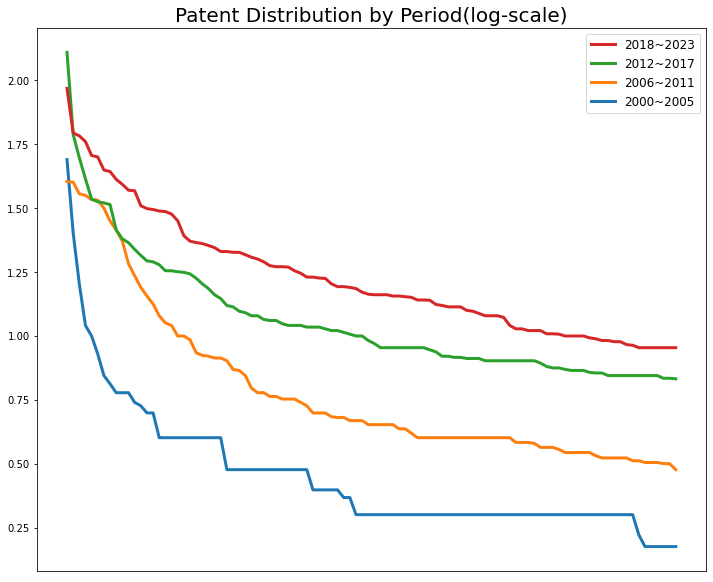

In [1072]:

fig = plt.figure()
fig.set_size_inches(12, 10)
ax1 = fig.add_subplot(111)
applicantName_count.applicationDate = applicantName_count.applicationDate.astype(str)

for k1, group in applicantName_count.groupby("period"):
    #display(k1, group)
    if k1 == "3":
        group = group[group.applicationDate != '2024']
        mean_count_by_period = group.groupby("applicantName").mean("count").sort_values("count", ascending=False).head(100)
        mean_count_by_period.reset_index(inplace=True)
        ax1.plot(mean_count_by_period.index, mean_count_by_period["count"].map(lambda x: np.log10(x)), linestyle=line1, linewidth=num, label = k1) # dotted
    mean_count_by_period = group.groupby("applicantName").mean("count").sort_values("count", ascending=False).head(100)
    mean_count_by_period.reset_index(inplace=True)
    ax1.plot(mean_count_by_period.index, mean_count_by_period["count"].map(lambda x: np.log10(x)), linestyle=line1, linewidth=num, label = k1) # dotted
    
plt.title('Patent Distribution by Period(log-scale)', fontsize=20)
ax1.legend(fontsize=12, loc=[0.8,0.5])
reorderLegend(ax1,['2018~2023', '2012~2017', '2006~2011', "2000~2005"])


plt.gca().axes.xaxis.set_visible(False)

plt.savefig("Patent Distribution by Period_log.pdf")

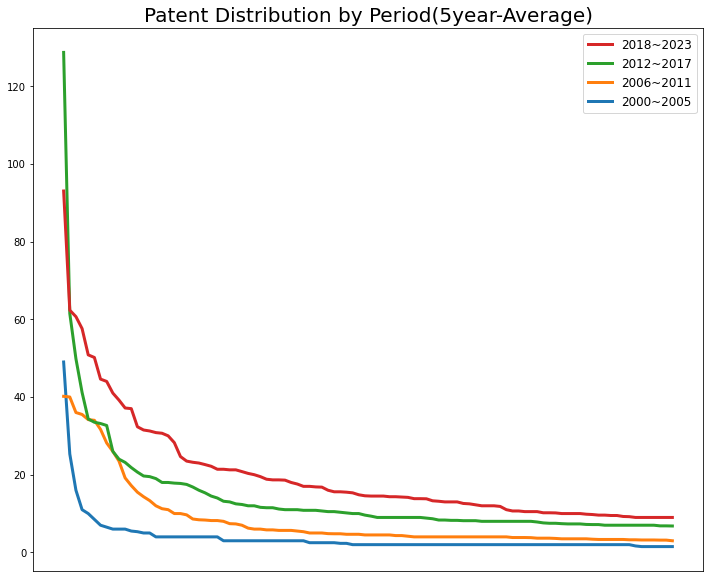

In [1076]:

fig = plt.figure()
fig.set_size_inches(12, 10)
ax1 = fig.add_subplot(111)
applicantName_count.applicationDate = applicantName_count.applicationDate.astype(str)

for k1, group in applicantName_count.groupby("period"):
    #display(k1, group)
    if k1 == "3":
        group = group[group.applicationDate != '2024']
        mean_count_by_period = group.groupby("applicantName").mean("count").sort_values("count", ascending=False).head(100)
        mean_count_by_period.reset_index(inplace=True)
        ax1.plot(mean_count_by_period.index, mean_count_by_period["count"], linestyle=line1, linewidth=num, label = k1) # dotted
    mean_count_by_period = group.groupby("applicantName").mean("count").sort_values("count", ascending=False).head(100)
    mean_count_by_period.reset_index(inplace=True)
    ax1.plot(mean_count_by_period.index, mean_count_by_period["count"], linestyle=line1, linewidth=num, label = k1) # dotted
    
plt.title('Patent Distribution by Period(5year-Average)', fontsize=20)
ax1.legend(fontsize=12, loc=[0.8,0.5])
reorderLegend(ax1,['2018~2023', '2012~2017', '2006~2011', "2000~2005"])


plt.gca().axes.xaxis.set_visible(False)

plt.savefig("Patent Distribution by Period.pdf")

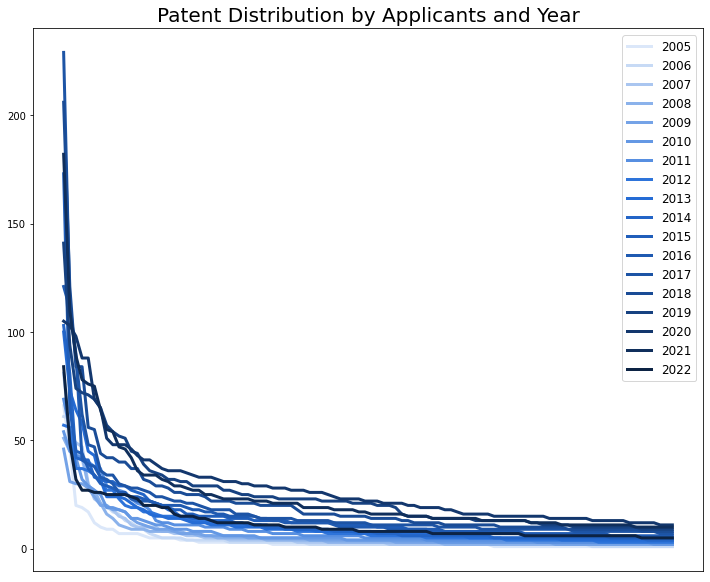

In [1074]:
col =["#DBE7F9", '#C7DAF5', '#AAC6F0', '#8BB2EB', '#75A3E7', '#6498E4', '#578FE1', '#2E74DA', '#256CD5', '#2365C7', '#205EBA', '#1F5AB1', '#1D54A5', '#1A4C96', '#174281', '#13376D', '#102F5C', '#0C2344']
fig = plt.figure()
fig.set_size_inches(12, 10)
ax1 = fig.add_subplot(111)
n = 0
for k1, group in applicantName_count.groupby("applicationDate"):
    
    if int(k1) > 2004 and int(k1) < 2023:
        group.reset_index(inplace=True)
        group = group.head(100)
        #display(group.head(10)["applicantName"])
        #display(group.head(10))
        ax1.plot(group.index, group["count"], linestyle=line1, c=col[n],linewidth=num, label = k1) # dotted
        n += 1
        
plt.title('Patent Distribution by Applicants and Year', fontsize=20) 
ax1.legend(fontsize=12, loc=[0.88,0.35])
plt.gca().axes.xaxis.set_visible(False)

plt.savefig("Patent Distribution by Applicants and Year.pdf")

index     applicantName applicationDate  count     period
0   9270          네이버 주식회사            2005     66  2000~2005
1  16165      에스케이텔레콤 주식회사            2005     47  2000~2005
2  11099     마이크로소프트 코포레이션            2005     20  2000~2005
3  29039       주식회사 엘지유플러스            2005     19  2000~2005
4   6426            구글 엘엘씨            2005     17  2000~2005
5  38065         한국전자통신연구원            2005     12  2000~2005
6  16149  에스케이커뮤니케이션즈 주식회사            2005     10  2000~2005
7  13262          삼성전자주식회사            2005      9  2000~2005
8  32288       주식회사 케이티프리텔            2005      9  2000~2005
9   4134             (주)첫눈            2005      7  2000~2005

index  applicantName applicationDate  count     period
0   9271       네이버 주식회사            2006     61  2006~2011
1  26821      주식회사 신한은행            2006     60  2006~2011
2  38066      한국전자통신연구원            2006     46  2006~2011
3  16166   에스케이텔레콤 주식회사            2006     41  2006~2011
4  29040    주식회사 엘지유플러스            2006     30  2006~2011
5  32289    주식회사 케이티프리텔            2006     25  2006~2011
6  11100  마이크로소프트 코포레이션            2006     21  2006~2011
7  32229       주식회사 케이티            2006     20  2006~2011
8  13263       삼성전자주식회사            2006     17  2006~2011
9   6427         구글 엘엘씨            2006     16  2006~2011

index  applicantName applicationDate  count     period
0  26822      주식회사 신한은행            2007     81  2006~2011
1  38067      한국전자통신연구원            2007     53  2006~2011
2   9272       네이버 주식회사            2007     49  2006~2011
3  16167   에스케이텔레콤 주식회사            2007     47  2006~2011
4  29041    주식회사 엘지유플러스            2007     30  2006~2011
5  13264       삼성전자주식회사            2007     23  2006~2011
6  32230       주식회사 케이티            2007     21  2006~2011
7  16211   에스케이플래닛 주식회사            2007     19  2006~2011
8  28831     주식회사 엔씨소프트            2007     18  2006~2011
9  11101  마이크로소프트 코포레이션            2007     15  2006~2011

index applicantName applicationDate  count     period
0  26823     주식회사 신한은행            2008     51  2006~2011
1   9273      네이버 주식회사            2008     45  2006~2011
2  16212  에스케이플래닛 주식회사            2008     43  2006~2011
3  32231      주식회사 케이티            2008     43  2006~2011
4  38068     한국전자통신연구원            2008     29  2006~2011
5  29042   주식회사 엘지유플러스            2008     27  2006~2011
6   9350  네이버클라우드 주식회사            2008     21  2006~2011
7  28832    주식회사 엔씨소프트            2008     16  2006~2011
8  13265      삼성전자주식회사            2008     14  2006~2011
9  16168  에스케이텔레콤 주식회사            2008     11  2006~2011

index                          applicantName applicationDate  count  \
0  16213                           에스케이플래닛 주식회사            2009     46   
1  38069                              한국전자통신연구원            2009     31   
2  13266                               삼성전자주식회사            2009     30   
3  29043                            주식회사 엘지유플러스            2009     30   
4  11107                마이크로소프트 테크놀로지 라이센싱, 엘엘씨            2009     28   
5   6430                                 구글 엘엘씨            2009     24   
6  32232                               주식회사 케이티            2009     20   
7  34103                              주식회사 하나은행            2009     20   
8  16754                              엘지전자 주식회사            2009     18   
9  36958  프라운호퍼 게젤샤프트 쭈르 푀르데룽 데어 안겐반텐 포르슝 에. 베.            2009     18   

      period  
0  2006~2011  
1  2006~2011  
2  2006~2011  
3  2006~2011  
4  2006~2011  
5  2006~2011  
6  2006~2011  
7  2006~2011  
8  2006~2011  
9  2006~2011

index            applicantName applicationDate  count     period
0  16214             에스케이플래닛 주식회사            2010     54  2006~2011
1  32233                 주식회사 케이티            2010     45  2006~2011
2  13267                 삼성전자주식회사            2010     42  2006~2011
3   9275                 네이버 주식회사            2010     32  2006~2011
4  11108  마이크로소프트 테크놀로지 라이센싱, 엘엘씨            2010     29  2006~2011
5  29044              주식회사 엘지유플러스            2010     27  2006~2011
6  22494                주식회사 네오위즈            2010     25  2006~2011
7  16755                엘지전자 주식회사            2010     19  2006~2011
8  38070                한국전자통신연구원            2010     19  2006~2011
9  35082                   중소기업은행            2010     18  2006~2011

index applicantName applicationDate  count     period
0  22495     주식회사 네오위즈            2011     69  2006~2011
1  32234      주식회사 케이티            2011     55  2006~2011
2  13268      삼성전자주식회사            2011     43  2006~2011
3   6432        구글 엘엘씨            2011     42  2006~2011
4  32306      주식회사 켐에쎈            2011     40  2006~2011
5  16215  에스케이플래닛 주식회사            2011     38  2006~2011
6   9276      네이버 주식회사            2011     37  2006~2011
7  16756     엘지전자 주식회사            2011     29  2006~2011
8   5974   경북대학교 산학협력단            2011     27  2006~2011
9  38071     한국전자통신연구원            2011     27  2006~2011

index            applicantName applicationDate  count     period
0  16216             에스케이플래닛 주식회사            2012     57  2012~2017
1  13269                 삼성전자주식회사            2012     56  2012~2017
2   6433                   구글 엘엘씨            2012     37  2012~2017
3  11218             메타 플랫폼스, 인크.            2012     37  2012~2017
4  22496                주식회사 네오위즈            2012     36  2012~2017
5  11110  마이크로소프트 테크놀로지 라이센싱, 엘엘씨            2012     34  2012~2017
6  16757                엘지전자 주식회사            2012     31  2012~2017
7  16172             에스케이텔레콤 주식회사            2012     27  2012~2017
8  32235                 주식회사 케이티            2012     27  2012~2017
9   9277                 네이버 주식회사            2012     23  2012~2017

index applicantName applicationDate  count     period
0  13270      삼성전자주식회사            2013    100  2012~2017
1  16217  에스케이플래닛 주식회사            2013     73  2012~2017
2  11219  메타 플랫폼스, 인크.            2013     64  2012~2017
3  32236      주식회사 케이티            2013     58  2012~2017
4   6434        구글 엘엘씨            2013     45  2012~2017
5  16173  에스케이텔레콤 주식회사            2013     43  2012~2017
6  29047   주식회사 엘지유플러스            2013     32  2012~2017
7  15715        애플 인크.            2013     24  2012~2017
8  16758     엘지전자 주식회사            2013     24  2012~2017
9  38073     한국전자통신연구원            2013     24  2012~2017

index                          applicantName applicationDate  count  \
0  13271                               삼성전자주식회사            2014    103   
1  11220                           메타 플랫폼스, 인크.            2014     81   
2  16218                           에스케이플래닛 주식회사            2014     42   
3  16174                           에스케이텔레콤 주식회사            2014     41   
4  39106                              현대자동차주식회사            2014     41   
5  38074                              한국전자통신연구원            2014     33   
6  32237                               주식회사 케이티            2014     32   
7  16759                              엘지전자 주식회사            2014     31   
8  36963  프라운호퍼 게젤샤프트 쭈르 푀르데룽 데어 안겐반텐 포르슝 에. 베.            2014     31   
9   9279                               네이버 주식회사            2014     29   

      period  
0  2012~2017  
1  2012~2017  
2  2012~2017  
3  2012~2017  
4  2012~2017  
5  2012~2017  
6  2012~2017  
7  2012~2017  
8  2012~2017  
9  2012~2017

index            applicantName applicationDate  count     period
0  13272                 삼성전자주식회사            2015    173  2012~2017
1   9280                 네이버 주식회사            2015     65  2012~2017
2  38075                한국전자통신연구원            2015     45  2012~2017
3  11113  마이크로소프트 테크놀로지 라이센싱, 엘엘씨            2015     44  2012~2017
4  36380                  쿠팡 주식회사            2015     37  2012~2017
5  29049              주식회사 엘지유플러스            2015     34  2012~2017
6  14674               시아오미 아이엔씨.            2015     30  2012~2017
7  16219             에스케이플래닛 주식회사            2015     29  2012~2017
8  32238                 주식회사 케이티            2015     28  2012~2017
9   6436                   구글 엘엘씨            2015     26  2012~2017

index applicantName applicationDate  count     period
0   6437        구글 엘엘씨            2016    121  2012~2017
1  13273      삼성전자주식회사            2016    111  2012~2017
2  38076     한국전자통신연구원            2016     90  2012~2017
3   9281      네이버 주식회사            2016     41  2012~2017
4  16761     엘지전자 주식회사            2016     39  2012~2017
5  39108     현대자동차주식회사            2016     38  2012~2017
6  16220  에스케이플래닛 주식회사            2016     33  2012~2017
7   6153   고려대학교 산학협력단            2016     32  2012~2017
8  32239      주식회사 케이티            2016     30  2012~2017
9  10556  두산에너빌리티 주식회사            2016     26  2012~2017

index      applicantName applicationDate  count     period
0  13274           삼성전자주식회사            2017    229  2012~2017
1   6438             구글 엘엘씨            2017    114  2012~2017
2  38077          한국전자통신연구원            2017     88  2012~2017
3  39116  현대자동차주식회사|기아 주식회사            2017     62  2012~2017
4  37374            한국과학기술원            2017     48  2012~2017
5  16762          엘지전자 주식회사            2017     47  2012~2017
6   6154        고려대학교 산학협력단            2017     36  2012~2017
7   9282           네이버 주식회사            2017     34  2012~2017
8  38043          한국전자기술연구원            2017     34  2012~2017
9   6723            국방과학연구소            2017     30  2012~2017

index applicantName applicationDate  count     period
0  13275      삼성전자주식회사            2018    206  2018~2023
1   6439        구글 엘엘씨            2018    121  2018~2023
2  37375       한국과학기술원            2018     84  2018~2023
3  38078     한국전자통신연구원            2018     84  2018~2023
4  16763     엘지전자 주식회사            2018     56  2018~2023
5  13675    서울대학교산학협력단            2018     55  2018~2023
6  38044     한국전자기술연구원            2018     44  2018~2023
7  16870   연세대학교 산학협력단            2018     42  2018~2023
8  20151   인하대학교 산학협력단            2018     42  2018~2023
9  32241      주식회사 케이티            2018     40  2018~2023

index applicantName applicationDate  count     period
0  16764     엘지전자 주식회사            2019    141  2018~2023
1  37376       한국과학기술원            2019     94  2018~2023
2  26590   주식회사 스트라드비젼            2019     74  2018~2023
3  13276      삼성전자주식회사            2019     72  2018~2023
4  38079     한국전자통신연구원            2019     71  2018~2023
5   6440        구글 엘엘씨            2019     69  2018~2023
6  16871   연세대학교 산학협력단            2019     65  2018~2023
7   6156   고려대학교 산학협력단            2019     57  2018~2023
8  38045     한국전자기술연구원            2019     54  2018~2023
9  36383       쿠팡 주식회사            2019     52  2018~2023

index applicantName applicationDate  count     period
0  16872   연세대학교 산학협력단            2020    105  2018~2023
1  36384       쿠팡 주식회사            2020    103  2018~2023
2  37377       한국과학기술원            2020     98  2018~2023
3   6157   고려대학교 산학협력단            2020     88  2018~2023
4  38080     한국전자통신연구원            2020     88  2018~2023
5  32607   주식회사 크라우드웍스            2020     69  2018~2023
6  13677    서울대학교산학협력단            2020     65  2018~2023
7  20153   인하대학교 산학협력단            2020     51  2018~2023
8   6073   경희대학교 산학협력단            2020     48  2018~2023
9  37282     한국건설기술연구원            2020     48  2018~2023

index                     applicantName applicationDate  count     period
0  36385                           쿠팡 주식회사            2021    182  2018~2023
1  12658  베이징 바이두 넷컴 사이언스 앤 테크놀로지 코., 엘티디.            2021    110  2018~2023
2   6158                       고려대학교 산학협력단            2021     89  2018~2023
3  16873                       연세대학교 산학협력단            2021     78  2018~2023
4  37378                           한국과학기술원            2021     76  2018~2023
5  30977                          주식회사 인피닉            2021     75  2018~2023
6  13678                        서울대학교산학협력단            2021     64  2018~2023
7  20154                       인하대학교 산학협력단            2021     55  2018~2023
8  37992                            한국전력공사            2021     54  2018~2023
9  38047                         한국전자기술연구원            2021     47  2018~2023

index  applicantName applicationDate  count     period
0  36386        쿠팡 주식회사            2022     84  2018~2023
1  27344  주식회사 아이스크림미디어            2022     49  2018~2023
2   5494    가천대학교 산학협력단            2022     32  2018~2023
3  13279       삼성전자주식회사            2022     27  2018~2023
4  37993         한국전력공사            2022     27  2018~2023
5  34154        주식회사 하이            2022     26  2018~2023
6  38048      한국전자기술연구원            2022     26  2018~2023
7   6728        국방과학연구소            2022     25  2018~2023
8  27350   주식회사 아이스크림아트            2022     25  2018~2023
9  27845      주식회사 액션파워            2022     25  2018~2023

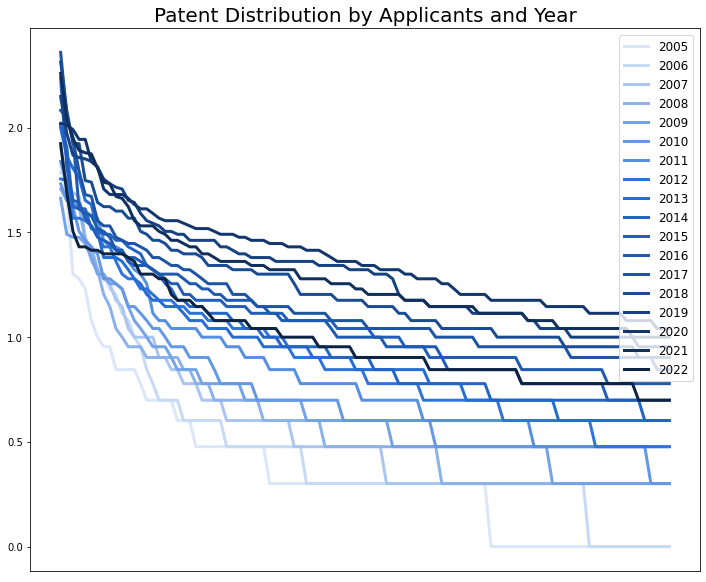

In [1088]:
col =["#DBE7F9", '#C7DAF5', '#AAC6F0', '#8BB2EB', '#75A3E7', '#6498E4', '#578FE1', '#2E74DA', '#256CD5', '#2365C7', '#205EBA', '#1F5AB1', '#1D54A5', '#1A4C96', '#174281', '#13376D', '#102F5C', '#0C2344']
fig = plt.figure()
fig.set_size_inches(12, 10)
ax1 = fig.add_subplot(111)
n = 0
for k1, group in applicantName_count.groupby("applicationDate"):
    
    if int(k1) > 2004 and int(k1) < 2023:
        group.reset_index(inplace=True)
        group = group.head(100)
        #display(group.head(10)["applicantName"])
        display(group.head(10))
        ax1.plot(group.index, group["count"].map(lambda x:np.log10(x)), linestyle=line1, c=col[n],linewidth=num, label = k1) # dotted
        n += 1
        
plt.title('Patent Distribution by Applicants and Year', fontsize=20) 
ax1.legend(fontsize=12, loc=[0.88,0.35])
plt.gca().axes.xaxis.set_visible(False)

plt.savefig("Patent Distribution by Applicants and Year_log.pdf")

In [842]:
applicant_info.to_csv("applicants_info.csv", encoding = "utf-8-sig")

## IPC to KSIC

In [781]:
ipc_to_ksic = korea_ai_patent[["applicationDate", "applicationNumber", "ipcNumber"]]

In [782]:
ipc_to_ksic = ipc_to_ksic.assign(ipc = ipc_to_ksic.ipcNumber.map(lambda x : x.split("|")))
ipc_to_ksic = ipc_to_ksic.explode("ipc")

In [858]:
ipc_to_ksic["ipc_4digit"]=ipc_to_ksic["ipc"].map(lambda x:x[:4])
ipc_to_ksic["ipc_5digit"]=ipc_to_ksic["ipc"].map(lambda x:x[:6])
ipc_to_ksic.ipc = ipc_to_ksic.ipc.map(lambda x: x.replace(' ', ''))
ipc_to_ksic.ipc_5digit = ipc_to_ksic.ipc.map(lambda x: x.split("/")[0])

In [859]:
ipc_to_ksic

applicationDate applicationNumber  \
0              2023     1020230118769   
0              2023     1020230118769   
0              2023     1020230118769   
0              2023     1020230118769   
0              2023     1020230118769   
..              ...               ...   
470            2004     1020040018153   
471            2007     1020070071866   
471            2007     1020070071866   
473            2007     1020070139308   
473            2007     1020070139308   

                                             ipcNumber         ipc ipc_4digit  \
0    G06N 3/045|G06N 3/0464|G06N 3/0475|G06N 3/08|G...   G06N3/045       G06N   
0    G06N 3/045|G06N 3/0464|G06N 3/0475|G06N 3/08|G...  G06N3/0464       G06N   
0    G06N 3/045|G06N 3/0464|G06N 3/0475|G06N 3/08|G...  G06N3/0475       G06N   
0    G06N 3/045|G06N 3/0464|G06N 3/0475|G06N 3/08|G...    G06N3/08       G06N   
0    G06N 3/045|G06N 3/0464|G06N 3/0475|G06N 3/08|G...   G06N3/094       G06N   
..                                                 ...         ...        ...   
470                   G06Q 10/08|H04M 17/00|G06F 15/02   G06F15/02       G06F   
471                              G06F 17/30|G06Q 10/10   G06F17/30       G06F   
471                              G06F 17/30|G06Q 10/10   G06Q10/10       G06Q   
473                              G06Q 10/06|G06Q 10/04   G06Q10/06       G06Q   
473                              G06Q 10/06|G06Q 10/04   G06Q10/04       G06Q   

    ipc_5digit  
0        G06N3  
0        G06N3  
0        G06N3  
0        G06N3  
0        G06N3  
..         ...  
470     G06F15  
471     G06F17  
471     G06Q10  
473     G06Q10  
473     G06Q10  

[320054 rows x 6 columns]

In [1089]:
#ipc_to_ksic_mapping = pd.read_csv("ipc_to_ksic.csv").drop(61)
#ipc_to_ksic_mapping.industry = ipc_to_ksic_mapping.industry.map(lambda x : x.replace("\n", ""))
#ipc_to_ksic_mapping.ipc = ipc_to_ksic_mapping.ipc.map(lambda x : x.replace("\n", ""))

#ipc_to_ksic_mapping= ipc_to_ksic_mapping.assign(ipc2 =ipc_to_ksic_mapping.ipc.map(lambda x : x.split(",")))
#ipc_to_ksic_mapping= ipc_to_ksic_mapping.explode("ipc2")
#ipc_to_ksic_mapping
#ipc_to_ksic_mapping= ipc_to_ksic_mapping.assign(ipc_except2 =ipc_to_ksic_mapping.ipc_except.map(lambda x : x.split(",")))
#ipc_to_ksic_mapping= ipc_to_ksic_mapping.explode("ipc_except2")

In [970]:
#ipc_to_ksic_mapping

In [969]:
ipc_except_table = ipc_to_ksic_mapping.dropna(subset = ["ipc_except"])
ipc_except_table=ipc_except_table.assign(ipc_except2 =ipc_except_table.ipc_except.map(lambda x : x.split(",")))
ipc_except_table = ipc_except_table.explode("ipc_except2")
#ipc_except_table[["industry", "ipc2", "ipc_except2"]].head(50)

In [972]:
ai_ipc_table = ipc_to_ksic[["applicationDate", "applicationNumber", "ipc", "ipc_4digit", "ipc_5digit"]].drop_duplicates(["applicationNumber", "ipc_5digit"])
ai_ipc_table

applicationDate applicationNumber         ipc ipc_4digit ipc_5digit
0              2023     1020230118769   G06N3/045       G06N      G06N3
1              2022     1020220157462  G06F16/538       G06F     G06F16
1              2022     1020220157462    G06F3/16       G06F      G06F3
1              2022     1020220157462   G10L13/08       G10L     G10L13
1              2022     1020220157462  G06N3/0455       G06N      G06N3
..              ...               ...         ...        ...        ...
470            2004     1020040018153   H04M17/00       H04M     H04M17
470            2004     1020040018153   G06F15/02       G06F     G06F15
471            2007     1020070071866   G06F17/30       G06F     G06F17
471            2007     1020070071866   G06Q10/10       G06Q     G06Q10
473            2007     1020070139308   G06Q10/06       G06Q     G06Q10

[246916 rows x 5 columns]

In [968]:
ipc_to_ksic_mapping.ipc2 = ipc_to_ksic_mapping.ipc2.map(lambda x: x.replace(" ", ""))
#ipc_to_ksic_mapping.head(50)

AttributeError: 'DataFrame' object has no attribute 'ipc2'

In [887]:
industry_table = ai_ipc_table.merge(ipc_to_ksic_mapping[["industry", "ipc2"]], how = "left", left_on = "ipc_4digit", right_on = "ipc2")
industry_table.head(50)#.dropna(subset=["industry"])
ai_ipc_table

applicationDate applicationNumber         ipc ipc_4digit ipc_5digit
0              2023     1020230118769   G06N3/045       G06N      G06N3
1              2022     1020220157462  G06F16/538       G06F     G06F16
1              2022     1020220157462   G10L13/08       G10L     G10L13
1              2022     1020220157462  G06N3/0455       G06N      G06N3
1              2022     1020220157462   G06V30/41       G06V     G06V30
..              ...               ...         ...        ...        ...
470            2004     1020040018153   H04M17/00       H04M     H04M17
470            2004     1020040018153   G06F15/02       G06F     G06F15
471            2007     1020070071866   G06F17/30       G06F     G06F17
471            2007     1020070071866   G06Q10/10       G06Q     G06Q10
473            2007     1020070139308   G06Q10/06       G06Q     G06Q10

[181843 rows x 5 columns]

In [967]:
ipc_to_ksic

applicationDate applicationNumber  \
0              2023     1020230118769   
0              2023     1020230118769   
0              2023     1020230118769   
0              2023     1020230118769   
0              2023     1020230118769   
..              ...               ...   
470            2004     1020040018153   
471            2007     1020070071866   
471            2007     1020070071866   
473            2007     1020070139308   
473            2007     1020070139308   

                                             ipcNumber         ipc ipc_4digit  \
0    G06N 3/045|G06N 3/0464|G06N 3/0475|G06N 3/08|G...   G06N3/045       G06N   
0    G06N 3/045|G06N 3/0464|G06N 3/0475|G06N 3/08|G...  G06N3/0464       G06N   
0    G06N 3/045|G06N 3/0464|G06N 3/0475|G06N 3/08|G...  G06N3/0475       G06N   
0    G06N 3/045|G06N 3/0464|G06N 3/0475|G06N 3/08|G...    G06N3/08       G06N   
0    G06N 3/045|G06N 3/0464|G06N 3/0475|G06N 3/08|G...   G06N3/094       G06N   
..                                                 ...         ...        ...   
470                   G06Q 10/08|H04M 17/00|G06F 15/02   G06F15/02       G06F   
471                              G06F 17/30|G06Q 10/10   G06F17/30       G06F   
471                              G06F 17/30|G06Q 10/10   G06Q10/10       G06Q   
473                              G06Q 10/06|G06Q 10/04   G06Q10/06       G06Q   
473                              G06Q 10/06|G06Q 10/04   G06Q10/04       G06Q   

    ipc_5digit  
0        G06N3  
0        G06N3  
0        G06N3  
0        G06N3  
0        G06N3  
..         ...  
470     G06F15  
471     G06F17  
471     G06Q10  
473     G06Q10  
473     G06Q10  

[320054 rows x 6 columns]

In [ ]:
ipc_to_ksic_mapping = pd.read_csv("ipc_to_ksic.csv").drop(61)
ipc_to_ksic_mapping.industry = ipc_to_ksic_mapping.industry.map(lambda x : x.replace("\n", ""))
ipc_to_ksic_mapping.ipc = ipc_to_ksic_mapping.ipc.map(lambda x : x.replace("\n", ""))
ipc_to_ksic_mapping

In [993]:
def sorting_machine(x):
    i=0
    while i<61:
        #print(i)
        if (x[:4] in ipc_to_ksic_mapping.ipc.values[i]) and (type(ipc_to_ksic_mapping.ipc_except[i]) == type(0.0001)):
            return ipc_to_ksic_mapping.industry.values[i]
            break
        elif(x[:4] in ipc_to_ksic_mapping.ipc.values[i]) and (type(ipc_to_ksic_mapping.ipc_except[i]) != type(0.0001)):
            if x.split("/")[0] not in ipc_to_ksic_mapping.ipc_except[i]:
                return ipc_to_ksic_mapping.industry.values[i]
                break
            else:
                i+=1
        else:
            i+=1

            
sorting_machine("H04N5/77")

1


'영상 및 음향기기제조업'

In [977]:
ai_ipc_table.reset_index(inplace=True)

In [990]:
ai_ipc_table

index applicationDate applicationNumber         ipc ipc_4digit  \
0           0            2023     1020230118769   G06N3/045       G06N   
1           1            2022     1020220157462  G06F16/538       G06F   
2           1            2022     1020220157462    G06F3/16       G06F   
3           1            2022     1020220157462   G10L13/08       G10L   
4           1            2022     1020220157462  G06N3/0455       G06N   
...       ...             ...               ...         ...        ...   
246911    470            2004     1020040018153   H04M17/00       H04M   
246912    470            2004     1020040018153   G06F15/02       G06F   
246913    471            2007     1020070071866   G06F17/30       G06F   
246914    471            2007     1020070071866   G06Q10/10       G06Q   
246915    473            2007     1020070139308   G06Q10/06       G06Q   

       ipc_5digit  
0           G06N3  
1          G06F16  
2           G06F3  
3          G10L13  
4           G06N3  
...           ...  
246911     H04M17  
246912     G06F15  
246913     G06F17  
246914     G06Q10  
246915     G06Q10  

[246916 rows x 6 columns]

In [998]:
ai_ipc_table["industry"] = ai_ipc_table.ipc.map(sorting_machine)

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


In [1077]:
industry_table = pd.DataFrame(ai_ipc_table.groupby(["applicationDate", "industry"])["industry"].count())
industry_table = industry_table.T.unstack().reset_index()

In [1083]:
industry_table.rename(columns={0:"count"}, inplace= True)

In [1113]:
for key, group in industry_table.groupby("applicationDate"):
    if int(key) > 2002:
        print(key)
        display(group.sort_values("count",ascending=False)[["industry", "count"]].head(10))

2003


industry  count
17  컴퓨터 프로그래밍,정보서비스업     64
16     컴퓨터 및 주변장치제조업     48
18     통신 및 방송 장비제조업     24
15      영상 및 음향기기제조업      3
13           기타제품제조업      1
14    사무용 기계 및장비 제조업      1

2004


industry  count
35             컴퓨터 프로그래밍,정보서비스업    528
34                컴퓨터 및 주변장치제조업    213
36                통신 및 방송 장비제조업    162
28                 영상 및 음향기기제조업     64
21                      기타제품제조업     44
33  측정, 시험, 향해,제어, 및 기타정밀기기 제조업     36
27              사무용 이외의일반기계 제조업     18
20                   기타 전기장비제조업     17
29                   의료용 기기 제조업     12
26               사무용 기계 및장비 제조업      7

2005


industry  count
54             컴퓨터 프로그래밍,정보서비스업    685
53                컴퓨터 및 주변장치제조업    268
55                통신 및 방송 장비제조업    258
47                 영상 및 음향기기제조업     68
41                      기타제품제조업     63
52  측정, 시험, 향해,제어, 및 기타정밀기기 제조업     58
40                   기타 전기장비제조업     34
45              사무용 이외의일반기계 제조업      8
56                     특수 기계제조업      5
48                   의료용 기기 제조업      5

2006


industry  count
77             컴퓨터 프로그래밍,정보서비스업    956
76                컴퓨터 및 주변장치제조업    366
78                통신 및 방송 장비제조업    312
68                 영상 및 음향기기제조업    128
62                      기타제품제조업     60
75  측정, 시험, 향해,제어, 및 기타정밀기기 제조업     42
61                   기타 전기장비제조업     39
67              사무용 이외의일반기계 제조업     17
79                     특수 기계제조업     12
74                     철도장비 제조업     12

2007


industry  count
108             컴퓨터 프로그래밍,정보서비스업   1231
107                컴퓨터 및 주변장치제조업    502
109                통신 및 방송 장비제조업    361
97                  영상 및 음향기기제조업    185
106  측정, 시험, 향해,제어, 및 기타정밀기기 제조업     81
88                       기타제품제조업     68
87                    기타 전기장비제조업     50
98                    의료용 기기 제조업     41
93               사무용 이외의일반기계 제조업     22
92                사무용 기계 및장비 제조업     12

2008


industry  count
139             컴퓨터 프로그래밍,정보서비스업   1145
138                컴퓨터 및 주변장치제조업    623
140                통신 및 방송 장비제조업    440
131                 영상 및 음향기기제조업    143
137  측정, 시험, 향해,제어, 및 기타정밀기기 제조업     77
121                      기타제품제조업     61
120                   기타 전기장비제조업     39
132                   의료용 기기 제조업     30
126               사무용 기계 및장비 제조업     25
127              사무용 이외의일반기계 제조업     21

2009


industry  count
171             컴퓨터 프로그래밍,정보서비스업   1251
170                컴퓨터 및 주변장치제조업    638
173                통신 및 방송 장비제조업    425
162                 영상 및 음향기기제조업    239
169  측정, 시험, 향해,제어, 및 기타정밀기기 제조업    110
150                   기타 전기장비제조업     72
151                      기타제품제조업     71
157              사무용 이외의일반기계 제조업     52
163                   의료용 기기 제조업     48
167  전동기, 발전기 및전기변환, 공급,제어장치 제조업     24

2010


industry  count
207             컴퓨터 프로그래밍,정보서비스업   1660
206                컴퓨터 및 주변장치제조업    813
208                통신 및 방송 장비제조업    515
196                 영상 및 음향기기제조업    213
205  측정, 시험, 향해,제어, 및 기타정밀기기 제조업    199
186                      기타제품제조업    127
185                   기타 전기장비제조업     84
202  전동기, 발전기 및전기변환, 공급,제어장치 제조업     61
199                      자동차 제조업     46
197                   의료용 기기 제조업     43

2011


industry  count
247             컴퓨터 프로그래밍,정보서비스업   1990
246                컴퓨터 및 주변장치제조업    864
248                통신 및 방송 장비제조업    528
234                 영상 및 음향기기제조업    347
245  측정, 시험, 향해,제어, 및 기타정밀기기 제조업    211
221                      기타제품제조업    173
220                   기타 전기장비제조업    119
238                      자동차 제조업     63
235                   의료용 기기 제조업     58
230              사무용 이외의일반기계 제조업     54

2012


industry  count
287             컴퓨터 프로그래밍,정보서비스업   2653
286                컴퓨터 및 주변장치제조업    944
288                통신 및 방송 장비제조업    607
273                 영상 및 음향기기제조업    303
285  측정, 시험, 향해,제어, 및 기타정밀기기 제조업    240
260                      기타제품제조업    177
259                   기타 전기장비제조업    108
274                   의료용 기기 제조업    103
268              사무용 이외의일반기계 제조업     56
278                      자동차 제조업     48

2013


industry  count
325             컴퓨터 프로그래밍,정보서비스업   2735
324                컴퓨터 및 주변장치제조업   1229
327                통신 및 방송 장비제조업    488
310                 영상 및 음향기기제조업    356
323  측정, 시험, 향해,제어, 및 기타정밀기기 제조업    199
299                      기타제품제조업    166
298                   기타 전기장비제조업    120
311                   의료용 기기 제조업    118
306              사무용 이외의일반기계 제조업     85
316                      자동차 제조업     63

2014


industry  count
374             컴퓨터 프로그래밍,정보서비스업   2786
373                컴퓨터 및 주변장치제조업   1085
358                 영상 및 음향기기제조업    582
375                통신 및 방송 장비제조업    566
372  측정, 시험, 향해,제어, 및 기타정밀기기 제조업    292
343                      기타제품제조업    168
359                   의료용 기기 제조업    158
342                   기타 전기장비제조업    156
364                      자동차 제조업     78
352              사무용 이외의일반기계 제조업     45

2015


industry  count
421             컴퓨터 프로그래밍,정보서비스업   4139
420                컴퓨터 및 주변장치제조업   1727
422                통신 및 방송 장비제조업    831
406                 영상 및 음향기기제조업    707
419  측정, 시험, 향해,제어, 및 기타정밀기기 제조업    480
389                   기타 전기장비제조업    355
407                   의료용 기기 제조업    220
390                      기타제품제조업    173
399              사무용 이외의일반기계 제조업    119
412                      자동차 제조업     72

2016


industry  count
473             컴퓨터 프로그래밍,정보서비스업   5983
472                컴퓨터 및 주변장치제조업   2429
474                통신 및 방송 장비제조업   1518
456                 영상 및 음향기기제조업   1094
471  측정, 시험, 향해,제어, 및 기타정밀기기 제조업    880
439                   기타 전기장비제조업    439
440                      기타제품제조업    412
458                   의료용 기기 제조업    267
449              사무용 이외의일반기계 제조업    163
464                      자동차 제조업    159

2017


industry  count
526             컴퓨터 프로그래밍,정보서비스업   6863
525                컴퓨터 및 주변장치제조업   2561
527                통신 및 방송 장비제조업   1286
510                 영상 및 음향기기제조업   1206
524  측정, 시험, 향해,제어, 및 기타정밀기기 제조업    860
491                   기타 전기장비제조업    443
511                   의료용 기기 제조업    422
492                      기타제품제조업    380
516                      자동차 제조업    203
503              사무용 이외의일반기계 제조업    192

2018


industry  count
582             컴퓨터 프로그래밍,정보서비스업   8913
581                컴퓨터 및 주변장치제조업   2434
565                 영상 및 음향기기제조업   1420
584                통신 및 방송 장비제조업   1122
580  측정, 시험, 향해,제어, 및 기타정밀기기 제조업    915
567                   의료용 기기 제조업    619
546                   기타 전기장비제조업    482
547                      기타제품제조업    446
557              사무용 이외의일반기계 제조업    311
573                      자동차 제조업    256

2019


industry  count
636             컴퓨터 프로그래밍,정보서비스업  11657
635                컴퓨터 및 주변장치제조업   3103
634  측정, 시험, 향해,제어, 및 기타정밀기기 제조업   1662
619                 영상 및 음향기기제조업   1550
638                통신 및 방송 장비제조업   1297
621                   의료용 기기 제조업    909
601                   기타 전기장비제조업    801
602                      기타제품제조업    704
612              사무용 이외의일반기계 제조업    476
627                      자동차 제조업    381

2020


industry  count
693             컴퓨터 프로그래밍,정보서비스업  15302
692                컴퓨터 및 주변장치제조업   4058
691  측정, 시험, 향해,제어, 및 기타정밀기기 제조업   2012
676                 영상 및 음향기기제조업   1786
694                통신 및 방송 장비제조업   1638
678                   의료용 기기 제조업   1460
656                   기타 전기장비제조업   1075
657                      기타제품제조업    883
668              사무용 이외의일반기계 제조업    563
658                         농림어업    462

2021


industry  count
751             컴퓨터 프로그래밍,정보서비스업  15317
750                컴퓨터 및 주변장치제조업   4243
749  측정, 시험, 향해,제어, 및 기타정밀기기 제조업   2419
734                 영상 및 음향기기제조업   1924
736                   의료용 기기 제조업   1528
753                통신 및 방송 장비제조업   1366
714                   기타 전기장비제조업   1114
715                      기타제품제조업    882
726              사무용 이외의일반기계 제조업    587
754                     특수 기계제조업    533

2022


industry  count
807             컴퓨터 프로그래밍,정보서비스업  11917
806                컴퓨터 및 주변장치제조업   3005
805  측정, 시험, 향해,제어, 및 기타정밀기기 제조업   1919
790                 영상 및 음향기기제조업   1366
771                   기타 전기장비제조업   1096
808                통신 및 방송 장비제조업   1043
791                   의료용 기기 제조업    929
772                      기타제품제조업    689
782              사무용 이외의일반기계 제조업    597
809                     특수 기계제조업    573

2023


industry  count
857             컴퓨터 프로그래밍,정보서비스업   5943
856                컴퓨터 및 주변장치제조업   1928
855  측정, 시험, 향해,제어, 및 기타정밀기기 제조업   1073
841                 영상 및 음향기기제조업    737
825                   기타 전기장비제조업    734
859                통신 및 방송 장비제조업    574
842                   의료용 기기 제조업    433
836              사무용 이외의일반기계 제조업    408
826                      기타제품제조업    335
860                     특수 기계제조업    296

2024


industry  count
881             컴퓨터 프로그래밍,정보서비스업    184
880                컴퓨터 및 주변장치제조업     66
879  측정, 시험, 향해,제어, 및 기타정밀기기 제조업     23
872                 영상 및 음향기기제조업     19
882                통신 및 방송 장비제조업     15
883                     특수 기계제조업     10
873                   의료용 기기 제조업     10
871              사무용 이외의일반기계 제조업      8
875                      자동차 제조업      8
867                   기타 전기장비제조업      7

In [1116]:
!jupyter nbconvert --to script python_test.ipynb

Traceback (most recent call last):
  File "/opt/jupyterhub/bin/jupyter-nbconvert", line 8, in <module>
    sys.exit(main())
  File "/opt/jupyterhub/lib/python3.6/site-packages/jupyter_core/application.py", line 264, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "/opt/jupyterhub/lib/python3.6/site-packages/traitlets/config/application.py", line 664, in launch_instance
    app.start()
  File "/opt/jupyterhub/lib/python3.6/site-packages/nbconvert/nbconvertapp.py", line 350, in start
    self.convert_notebooks()
  File "/opt/jupyterhub/lib/python3.6/site-packages/nbconvert/nbconvertapp.py", line 519, in convert_notebooks
    self.exporter = cls(config=self.config)
  File "/opt/jupyterhub/lib/python3.6/site-packages/nbconvert/exporters/templateexporter.py", line 325, in __init__
    super().__init__(config=config, **kw)
  File "/opt/jupyterhub/lib/python3.6/site-packages/nbconvert/exporters/exporter.py", line 114, in __init__
    self._init

In [637]:
!git add python_test.py

In [638]:
!git commit -m "2024/05/25"

[main e5310e3] 2024/05/25
 1 file changed, 1067 insertions(+), 53 deletions(-)


In [639]:
!git push origin main

Counting objects: 3, done.
Delta compression using up to 20 threads.
Compressing objects: 100% (3/3), done.
Writing objects: 100% (3/3), 8.21 KiB | 2.74 MiB/s, done.
Total 3 (delta 1), reused 0 (delta 0)
remote: Resolving deltas: 100% (1/1), completed with 1 local object.
To https://github.com/Xeong-uoon/labor_institute.git
   5cc6d3c..e5310e3  main -> main


In [104]:
!pwd

/mnt/user2/git/labor_institute
